# Анализ стоимости услуг и оптимизация тарифов в телеком

**Введение**

В условиях растущей конкуренции на рынке телекоммуникационных услуг компании сталкиваются с необходимостью более глубокой аналитики пользовательского поведения и оптимизации тарифных планов. Компания "Ну позвони" предоставляет различные тарифы для своих клиентов, что создает необходимость в понимании того, как пользователи взаимодействуют с этими тарифами, а также в выявлении возможностей для повышения их удовлетворенности и удержания.

Данный проект направлен на анализ данных клиентов компании, включая информацию о зарегистрированных пользователях и их звонках. В рамках проекта будут применены методы предобработки данных, исследовательского и статистического анализа. Цель заключается в выявлении закономерностей в использовании тарифных планов и формировании рекомендаций для улучшения клиентского сервиса и оптимизации тарифной сетки.

**Цель проекта:**

Провести анализ данных клиентов телекомпании "Ну позвони" с целью выявления закономерностей в использовании тарифных планов, определения оптимальности тарифов для различных сегментов клиентов и формирования рекомендаций для повышения уровня обслуживания и удержания клиентов.

**Задачи проекта:**
    
1. Сбор и предобработка данных:
2. Анализ пользовательского поведения:
3. Оценка оптимальности тарифов:
4. Сегментация клиентов:
5. Статистический анализ:
6. Формулирование рекомендаций:


## Загрузка и исследование данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# Загрузка датасетов
url_clients = 'https://code.s3.yandex.net/datasets/telecom_clients.csv'
url_dataset = 'https://code.s3.yandex.net/datasets/telecom_dataset.csv'

clients = pd.read_csv(url_clients)
dataset = pd.read_csv(url_dataset)

In [3]:
# Вывод заголовков
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [4]:
# Инфо
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


Датафрейм 'clients' содержит 732 строки и 3 столбца. Пропуски в данных отсутствуют. Названия столбцов соответствуют типу написания snake_case. Тип данных столбца 'date_start' необходимо привести к типу datetime.

In [5]:
# Вывод заголовков
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [6]:
# Инфо
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Датафрейм 'dataset' содержит 53902 строки и 9 столбцов. Пропуски в данных в столбцах 'internal' и 'operator_id' необходимо обработать. Тип данных этих же столбцов требует коррекции. Названия столбцов соответствуют типу написания snake_case. 

## Предобработка данных

### Обработка пропусков

Столбец 'internal' указывает тип звонка (внутренний или внешний), что важно для расчета стоимости услуг, поскольку стоимость этих звонков отличается. Пропуски в этом столбце могут возникать из-за сбоев в записи данных о типе звонка или их утраты. Строки с отсутствующими значениями в столбце 'internal' будем удалять.

In [7]:
# Удаление строк с пустыми ячейками в 'internal'
dataset = dataset.dropna(subset=['internal'])

Пропуски в столбце 'operator_id' будут заменены на значение 0. Это значение выступит в качестве заглушки, обозначая отсутствие данных о конкретном операторе в случаях, когда идентификатор не указан. 

In [8]:
# Заполняем пропуски в 'operator_id' значением 0
dataset['operator_id'] = dataset['operator_id'].fillna(0)

### Преобразование типов данных

In [9]:
# Преобразование типа данных колонки date_start в clients
clients['date_start'] = pd.to_datetime(clients['date_start'])

# Преобразование столбца в формат datetime
dataset['date'] = pd.to_datetime(dataset['date'])

# Преобразование значений в столбце 'operator_id' в целочисленный формат
dataset['operator_id'] = dataset['operator_id'].astype('int')

# Изменение типа данных столбца 'internal' на bool
dataset['internal'] = dataset['internal'].astype(bool)

### Поиск дубликатов

In [10]:
clients.duplicated().sum()

0

Явные дубли отсутствуют

In [11]:
dataset.duplicated().sum()

4893

In [12]:
round(dataset.duplicated().mean(), 2)

0.09

In [13]:
dataset = dataset.drop_duplicates().reset_index(drop=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48892 entries, 0 to 48891
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              48892 non-null  int64                    
 1   date                 48892 non-null  datetime64[ns, UTC+03:00]
 2   direction            48892 non-null  object                   
 3   internal             48892 non-null  bool                     
 4   operator_id          48892 non-null  int32                    
 5   is_missed_call       48892 non-null  bool                     
 6   calls_count          48892 non-null  int64                    
 7   call_duration        48892 non-null  int64                    
 8   total_call_duration  48892 non-null  int64                    
dtypes: bool(2), datetime64[ns, UTC+03:00](1), int32(1), int64(4), object(1)
memory usage: 2.5+ MB


### Добавление дополнительных столбцов 

In [14]:
# Создание столбца с датой без времени и часового пояса
dataset['date_only'] = dataset['date'].dt.date
dataset['date_only'] = pd.to_datetime(dataset['date_only'])

# Создание столбца с месяцем
dataset['month'] = dataset['date'].dt.month

In [15]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_only,month
0,166377,2019-08-04 00:00:00+03:00,in,False,0,True,2,0,4,2019-08-04,8
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,2019-08-05,8
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,2019-08-05,8
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,2019-08-05,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,2019-08-05,8


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48892 entries, 0 to 48891
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              48892 non-null  int64                    
 1   date                 48892 non-null  datetime64[ns, UTC+03:00]
 2   direction            48892 non-null  object                   
 3   internal             48892 non-null  bool                     
 4   operator_id          48892 non-null  int32                    
 5   is_missed_call       48892 non-null  bool                     
 6   calls_count          48892 non-null  int64                    
 7   call_duration        48892 non-null  int64                    
 8   total_call_duration  48892 non-null  int64                    
 9   date_only            48892 non-null  datetime64[ns]           
 10  month                48892 non-null  int32                    
dtypes:

Данные подготовлены: пропуски обработаны, типы данных приведены в соответствие, дубли удалены, необходимые столбцы добавлены. Переходим к этапу исследовательского анализа.

## Исследовательский анализ данных

Сначала изучим общую статистику по данным

### Общая статистика по данным

In [17]:
# Количество зарегистрированых пользователей
print(f"Общее число пользователей в базе: {clients['user_id'].nunique()}")

Общее число пользователей в базе: 732


In [18]:
# Определение периода регистрации пользователей
min_date = clients['date_start'].min()
max_date = clients['date_start'].max()
print(f"Период регистрации пользователей: от {min_date} до {max_date}")

Период регистрации пользователей: от 2019-08-01 00:00:00 до 2019-10-31 00:00:00


In [19]:
# Количество пользователей для которых собраны данные
print(f"Общее число пользователей за исследуемый период: {dataset['user_id'].nunique()}")

Общее число пользователей за исследуемый период: 307


In [20]:
# Определение периода сбора данных
min_date = dataset['date_only'].min()
max_date = dataset['date_only'].max()
print(f"Период сбора данных: от {min_date} до {max_date}")

Период сбора данных: от 2019-08-02 00:00:00 до 2019-11-28 00:00:00


Общее число клиентов в базе 732. За исследуемый период с 2 августа 2019 по 28 ноября 2019 года данные имеются по 307 клиентам. Можно обьединить датасеты, чтобы было удобнее работать дальше. 

In [21]:
# Объединение таблиц по полю user_id
data = pd.merge(dataset, clients, on='user_id', how='inner')

data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_only,month,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,0,True,2,0,4,2019-08-04,8,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,2019-08-05,8,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,2019-08-05,8,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,2019-08-05,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,2019-08-05,8,B,2019-08-01


In [22]:
# Проверяем на количество пропусков в итоговой таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48892 entries, 0 to 48891
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              48892 non-null  int64                    
 1   date                 48892 non-null  datetime64[ns, UTC+03:00]
 2   direction            48892 non-null  object                   
 3   internal             48892 non-null  bool                     
 4   operator_id          48892 non-null  int32                    
 5   is_missed_call       48892 non-null  bool                     
 6   calls_count          48892 non-null  int64                    
 7   call_duration        48892 non-null  int64                    
 8   total_call_duration  48892 non-null  int64                    
 9   date_only            48892 non-null  datetime64[ns]           
 10  month                48892 non-null  int32                    
 11  ta

Проверим, чтобы у всех пользователей первая дата звонка была после даты их регистрации.

In [23]:
# Найдём первую дату звонка для каждого пользователя
first_call_date = data.groupby('user_id')['date_only'].min().reset_index()
first_call_date.columns = ['user_id', 'first_call_date']

# Объединим с данными пользователей
merged_df = pd.merge(data, first_call_date, on='user_id')

# Проверим, у каких пользователей звонки начались до даты регистрации
anomalous_users = merged_df[merged_df['first_call_date'] < merged_df['date_start']]
print("Пользователи с аномалиями в датах:", anomalous_users)

Пользователи с аномалиями в датах: Empty DataFrame
Columns: [user_id, date, direction, internal, operator_id, is_missed_call, calls_count, call_duration, total_call_duration, date_only, month, tariff_plan, date_start, first_call_date]
Index: []


Ни у одного пользователя нет звонков, дата которых предшествует дате регистрации, то есть аномалий не обнаружено.

In [24]:
# Найдём первую дату звонка для каждого пользователя
tariff_changes = data.groupby('user_id')['tariff_plan'].nunique().reset_index()
tariff_changes.columns = ['user_id', 'tariff_count']
tariff_changes

# Найдём тех, у кого больше одного тарифа
users_with_changes = tariff_changes[tariff_changes['tariff_count'] > 1]
print("Пользователи, которые меняли тариф:", users_with_changes)

Пользователи, которые меняли тариф: Empty DataFrame
Columns: [user_id, tariff_count]
Index: []


Пользователи с переходами между тарифами не обнаружены.

Для каждого пользователя посчитаем, через сколько дней после регистрации начались звонки, и построим график для наглядного анализа.

In [25]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_only,month,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,0,True,2,0,4,2019-08-04,8,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,2019-08-05,8,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,2019-08-05,8,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,2019-08-05,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,2019-08-05,8,B,2019-08-01


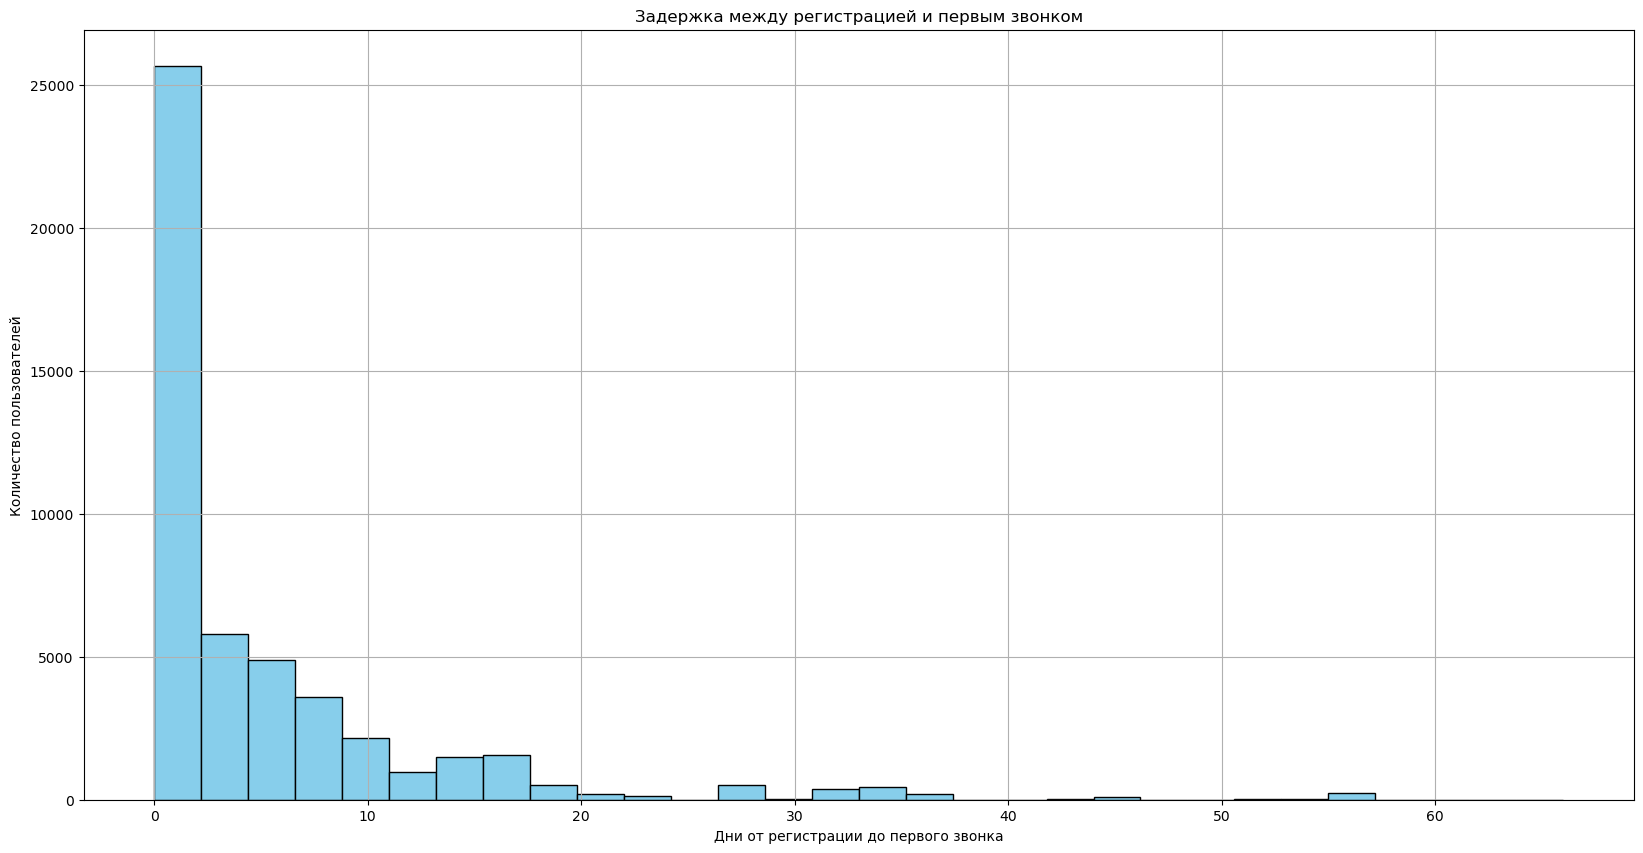

In [26]:
# Добавим колонку с разницей в днях между регистрацией и первым звонком
merged_df['days_to_first_call'] = (merged_df['first_call_date'] - merged_df['date_start']).dt.days

# Построим гистограмму
merged_df['days_to_first_call'].hist(bins=30, color='skyblue', edgecolor='black', figsize=(20, 10)) 
plt.title('Задержка между регистрацией и первым звонком')
plt.xlabel('Дни от регистрации до первого звонка')
plt.ylabel('Количество пользователей')
plt.show()

График покажзывает распределение задержек: большинство пользователей начинают звонить в первые несколько дней после регистрации, но есть пользователи, которые совершают первый звонок спустя месяц или два, это может указывать на возможные проблемы или трудности с использованием сервиса.

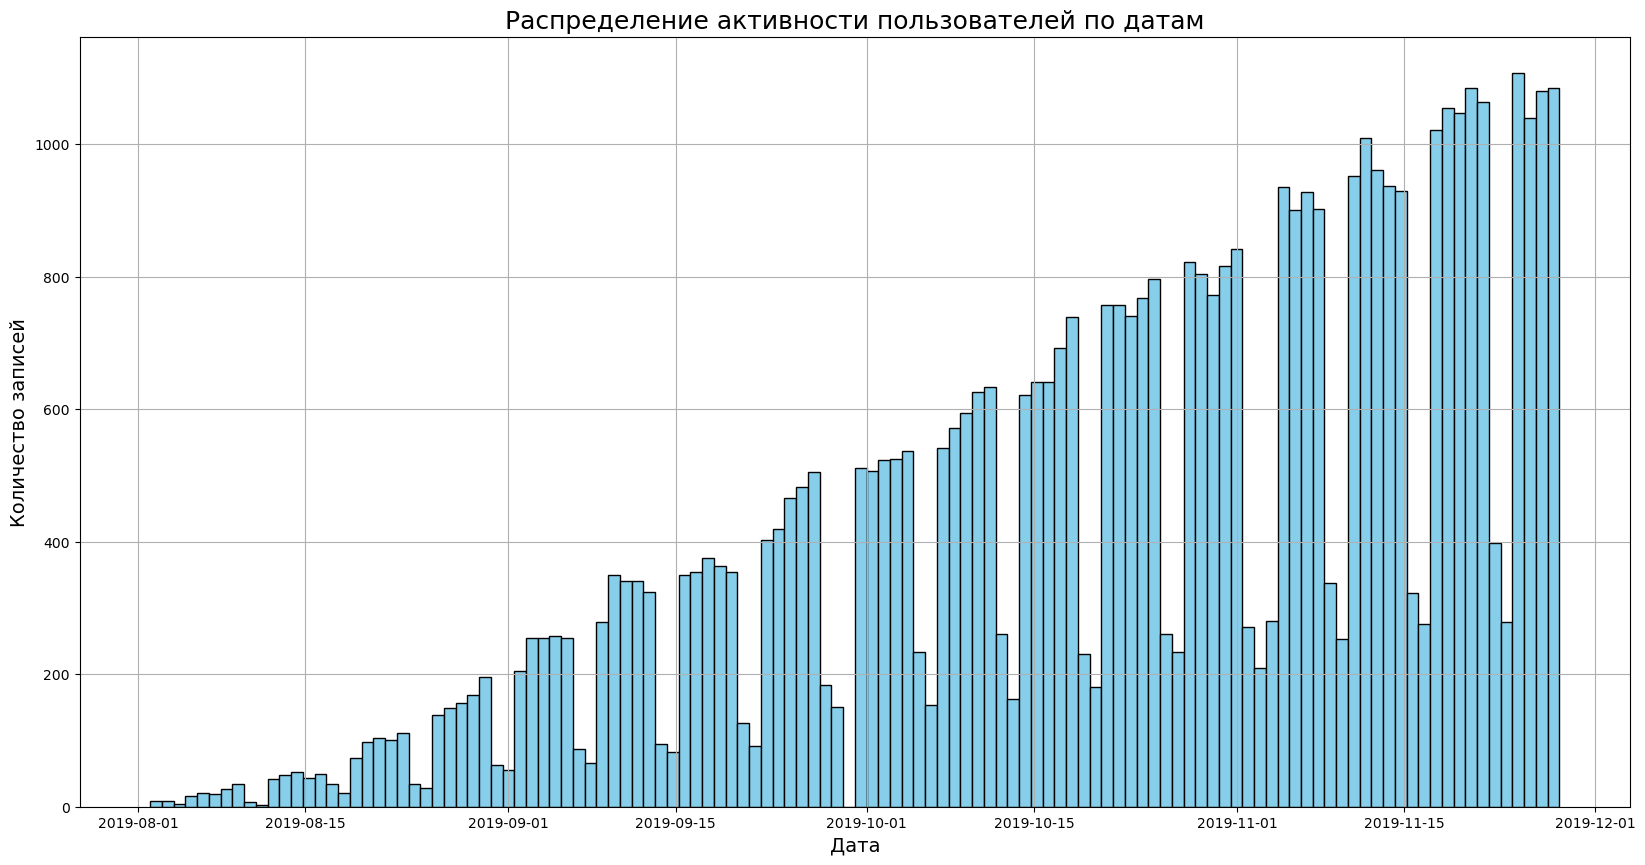

In [27]:
# Смотрим на распределение числа записей за исследуемый период
data['date_only'].hist(bins=120, color='skyblue', edgecolor='black', figsize=(20, 10))

plt.title('Распределение активности пользователей по датам', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество записей', fontsize=14)
plt.show()

Количество записей за исследуемый период практически ежедневно увеличивается. Разница в количестве записей между началом и концом периода достигает почти трех порядков. На графике заметно, что число звонков в будние дни значительно выше, чем в выходные.

Далее будем рассматривать распределение данных по количеству и продолжительности звонков

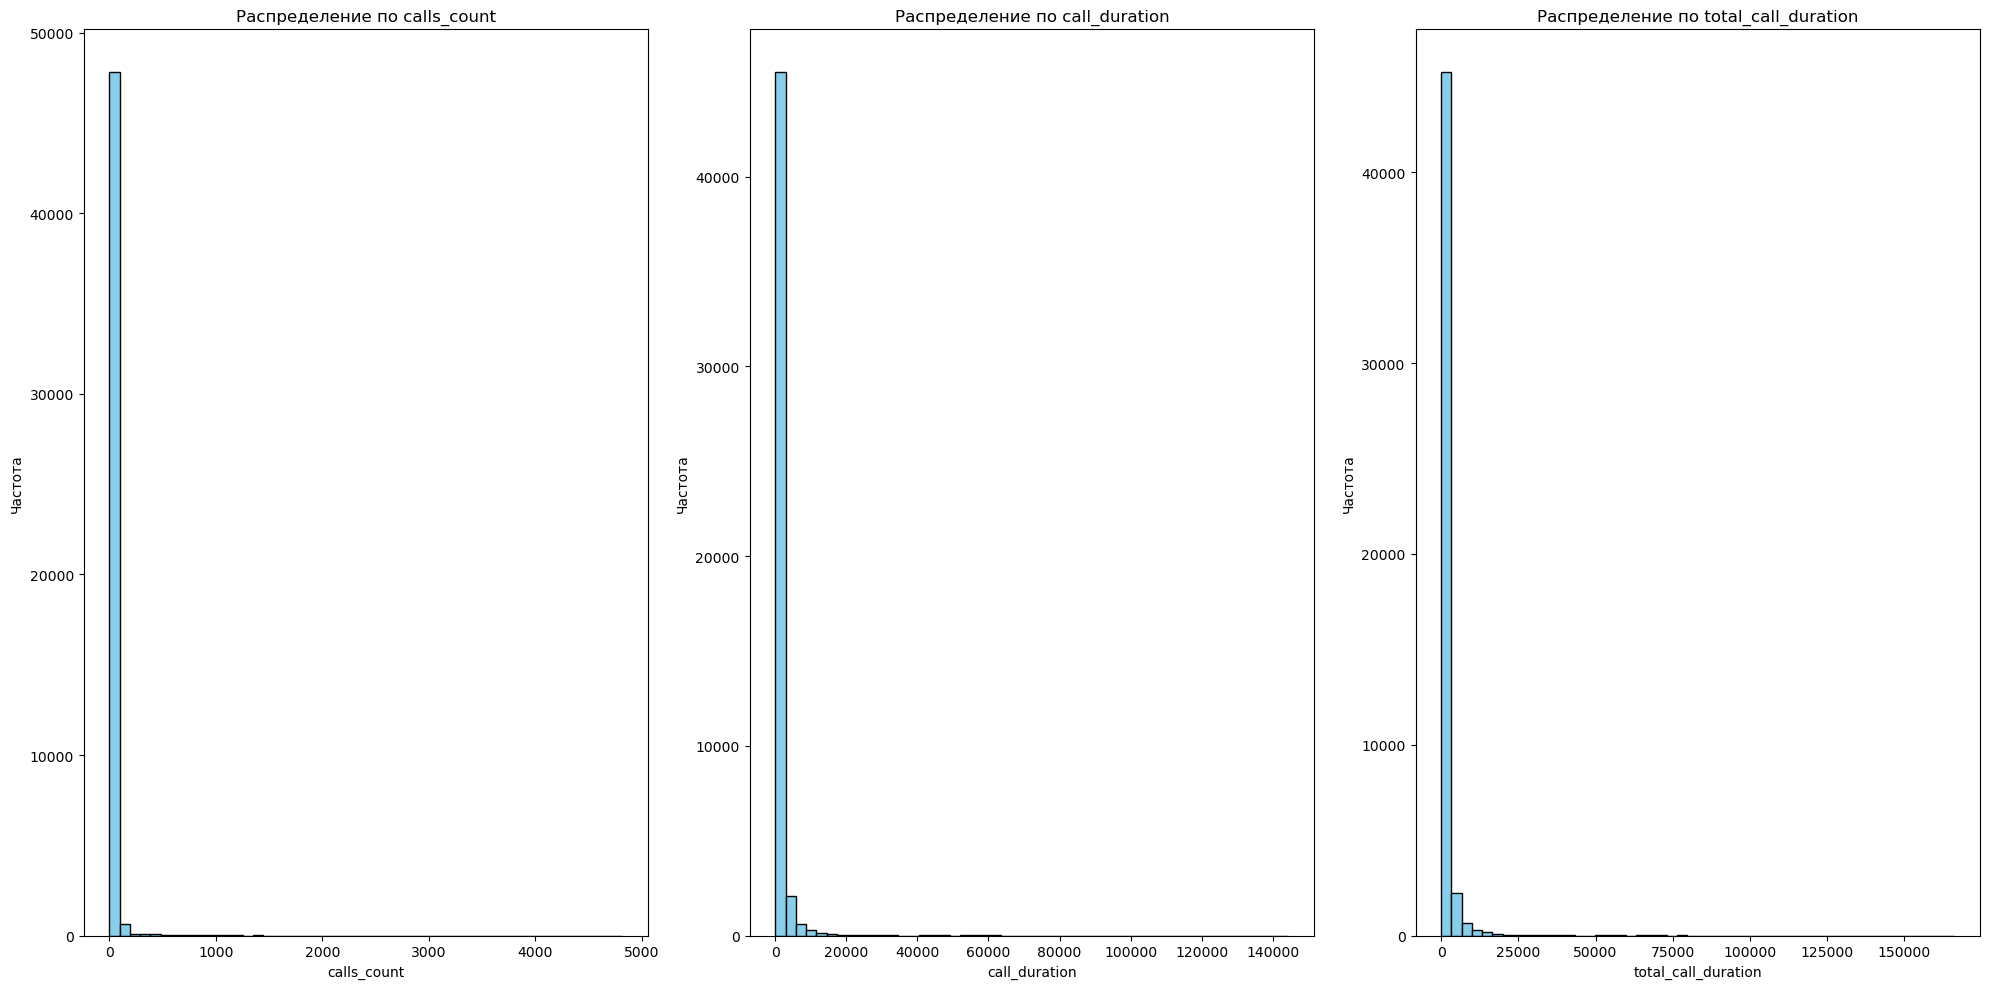

In [28]:
# Функция для построения гистограмм
def plot_histograms(df, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 10))
    for i, col in enumerate(columns):
        axes[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Распределение по {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')
    plt.tight_layout()
    plt.show()

# Столбцы для анализа
columns_to_check = ['calls_count', 'call_duration', 'total_call_duration']

# Гистограммы по сырым данным
plot_histograms(data, columns_to_check)

In [29]:
# Проверяем описательную статистику по агрегированным полям
data[columns_to_check].describe()

,calls_count,call_duration,total_call_duration
count,48892.000000,48892.000000,48892.000000
mean,16.495214,868.088788,1158.976458
std,63.671633,3779.549967,4456.180933
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,46.000000
50%,4.000000,37.000000,210.000000
75%,12.000000,573.000000,902.000000
max,4817.000000,144395.000000,166155.000000


По агрегированным полям можно сделать следующие выводы:

1. Количество звонков (calls_count): Среднее количество звонков составляет около 17, однако стандартное отклонение велико (63.67), что указывает на значительную вариативность в активности пользователей. Половина пользователей совершает менее 4 звонков, а четверть пользователей — более 12 звонков.

2. Длительность звонков (call_duration): Средняя продолжительность звонков составляет 868 минут, однако медиана значительно ниже — 37 минут. Это говорит о том, что есть значительное количество коротких звонков, но несколько очень длинных звонков сильно увеличивают среднее значение.

3. Общая длительность звонков (total_call_duration): Ситуация аналогична — средняя общая продолжительность звонков на пользователя составляет 1159 минут, но медиана — всего 210 минут, что также свидетельствует о наличии аномально долгих звонков у части пользователей.


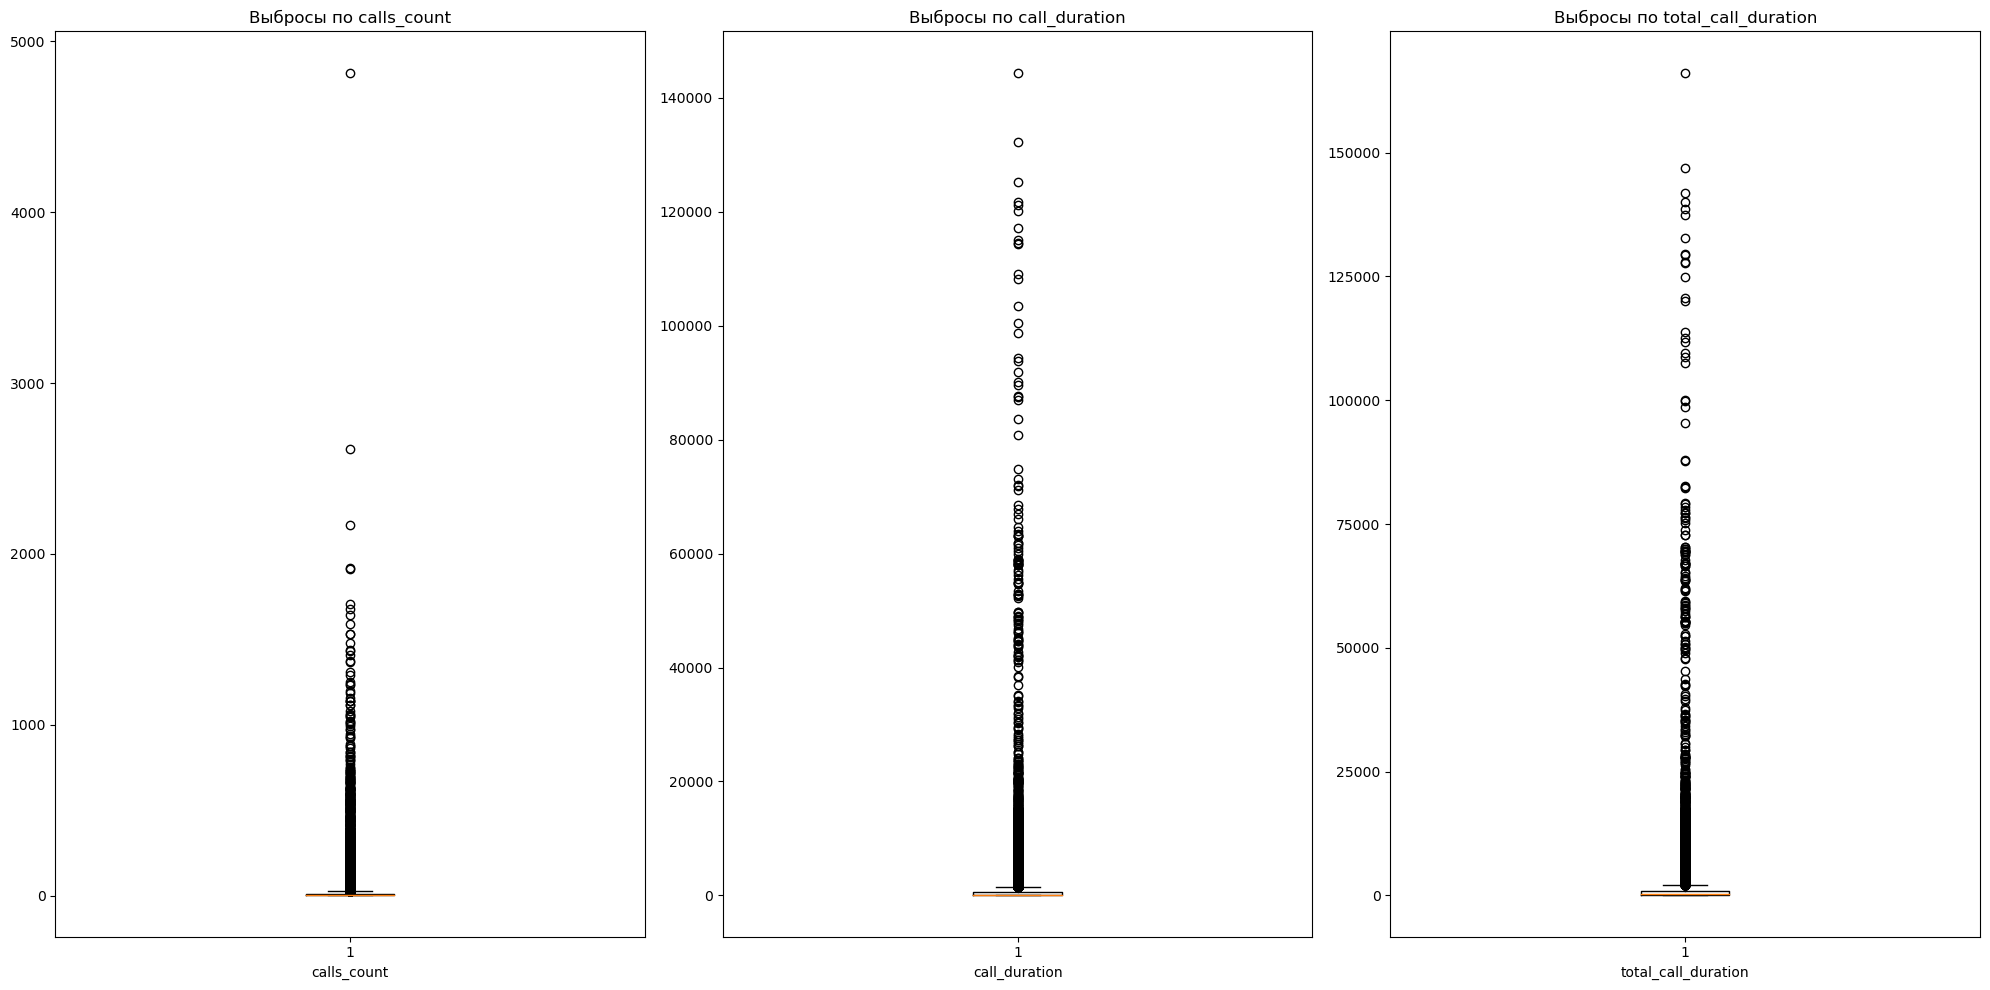

In [30]:
# Диаграммы "ящик с усами" для поиска выбросов
def plot_boxplots(df, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 10))
    for i, col in enumerate(columns):
        axes[i].boxplot(df[col])
        axes[i].set_title(f'Выбросы по {col}')
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()


# Диаграммы по сырым данным
plot_boxplots(data, columns_to_check)

Исходя из полученных данных, можно сделать вывод, что агрегированные показатели содержат значительное количество аномальных значений. Например, если представить, что сотрудник колл-центра работает 24 часа в сутки, то максимальная общая длительность звонков, даже с учетом времени ожидания, не должна превышать 1440 минут в день. Однако в данных встречаются значения, существенно превышающие этот порог.

В то же время, выбросы по количеству звонков могут быть менее показательны. Пользователи могут совершать большое количество коротких звонков или меньшее количество длинных звонков, что является нормальным и не обязательно указывает на аномалию. Тем не менее, длительность звонков значительно выше 1440 минут выглядит маловероятной, поскольку ситуация, когда оператор находится на телефоне круглосуточно, малореалистична.

Для обработки аномальных значений логично использовать метод межквартильного размаха (IQR), применив его к показателю общей длительности звонков. Это позволит исключить экстремальные значения и сфокусироваться на нормальных, реалистичных данных.

In [31]:
# Удаление выбросов с использованием IQR (межквартильный диапазон)
Q1 = data['total_call_duration'].quantile(0.25)
Q3 = data['total_call_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_no_outliers = data[(data['total_call_duration'] >= lower_bound) & (data['total_call_duration'] <= upper_bound)]

# Проверка количества удаленных строк и расчет процента
removed_rows = len(data) - len(data_no_outliers)
removed_percentage = (removed_rows / len(data)) * 100

print(f'Количество удаленных строк: {removed_rows} ({removed_percentage:.2f}%)')

Количество удаленных строк: 5926 (12.12%)


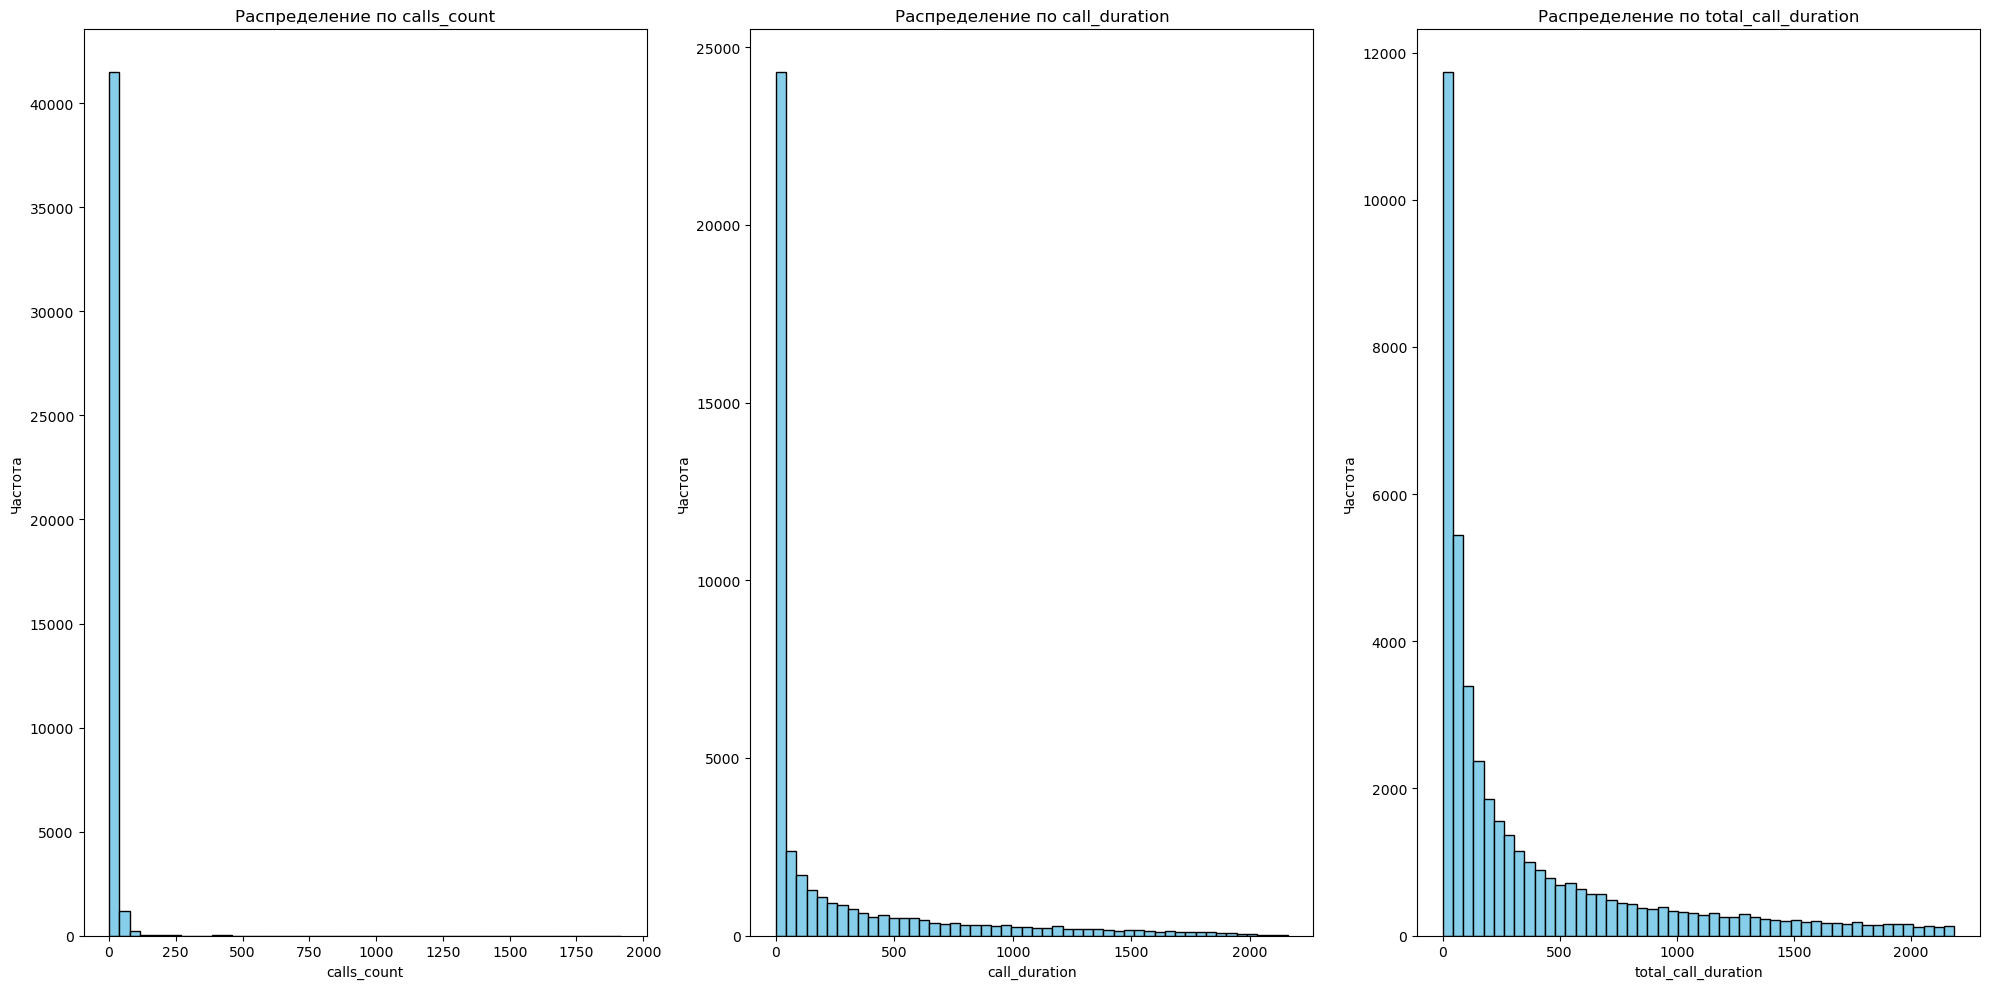

In [32]:
# Гистограммы после удаления выбросов
plot_histograms(data_no_outliers, columns_to_check)

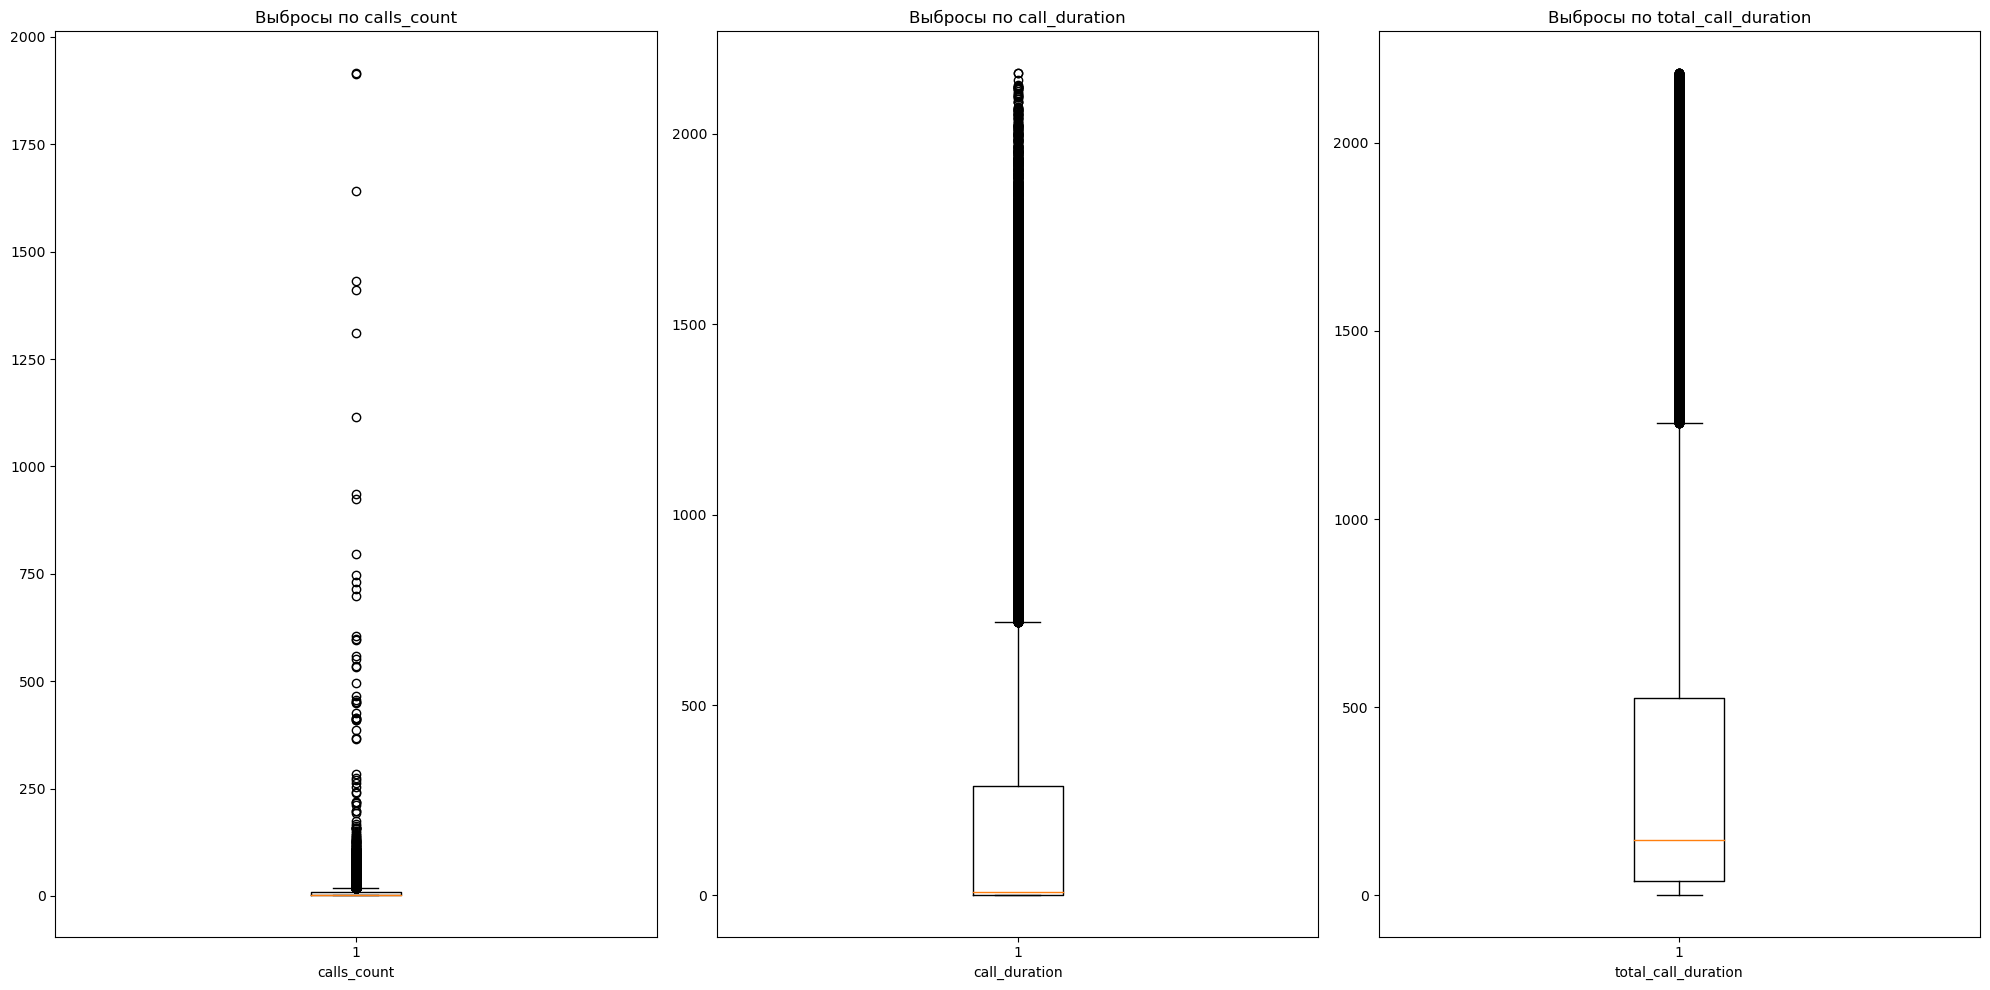

In [33]:
# Диаграммы "ящик с усами" после удаления выбросов
plot_boxplots(data_no_outliers, columns_to_check)

In [34]:
# Проверяем количество уникальных пользователей после обработки выбросов
data_no_outliers['user_id'].nunique()

307

После обработки выбросов было удалено 5926 строк, что составляет 12,12% от общего объема данных, при этом количество уникальных пользователей осталось неизменным. Это указывает на значительное количество выбросов в столбце total_call_duration, что свидетельствует о высокой вариативности в длительности звонков среди пользователей. Такой процент удаленных данных также может указывать на наличие аномальных или необычно длительных звонков, возможно, связанных с пользовательскими привычками или техническими факторами, такими как зависшие вызовы. Поскольку удаление этих строк не повлияло на общее число пользователей, вероятно, выбросы распределены по разным пользователям, а не сконцентрированы у нескольких клиентов.

### Распределение пользователей

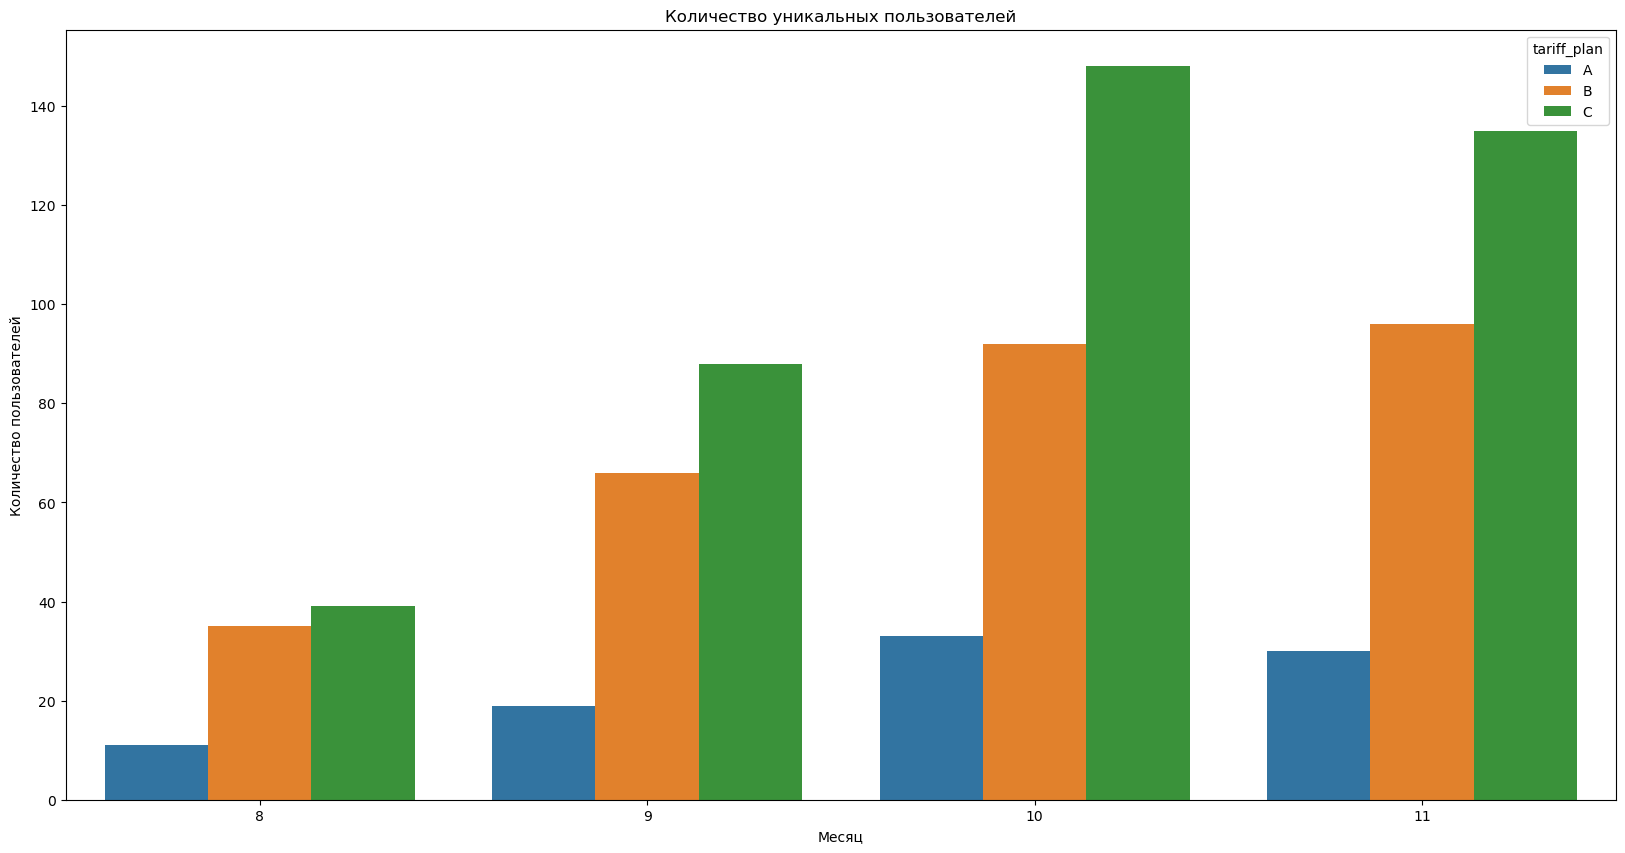

In [35]:
# Отчет по данным сгруппированым по тарифному плану и месяцу
user_distribution = data_no_outliers.groupby(['tariff_plan', 'month'])['user_id'].nunique().reset_index()

# График количества уникальных пользователей
plt.figure(figsize=(20, 10))

sns.barplot(x='month', y='user_id', hue='tariff_plan', data=user_distribution)
plt.title('Количество уникальных пользователей')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.show()

В основном пользователи выбирают тарифы B и C, по ним прирост пользователей наибольший.

In [36]:
# Группировка по user_id и подсчет уникальных месяцев для каждого пользователя
user_lifetime = data_no_outliers.groupby('user_id')['month'].nunique().reset_index()

# Фильтрация пользователей с лайфтаймом 3 месяца и более
active_users = user_lifetime[user_lifetime['month'] >= 3]['user_id']

# Фильтрация основного датафрейма по этим пользователям
dataset_active_users = data_no_outliers[data_no_outliers['user_id'].isin(active_users)]

# Проверка результата
print(f"Количество пользователей с лайфтаймом 3 месяца и более: {len(active_users)}")

Количество пользователей с лайфтаймом 3 месяца и более: 151


**Этих пользователей в дальнейшем будем считать активными**

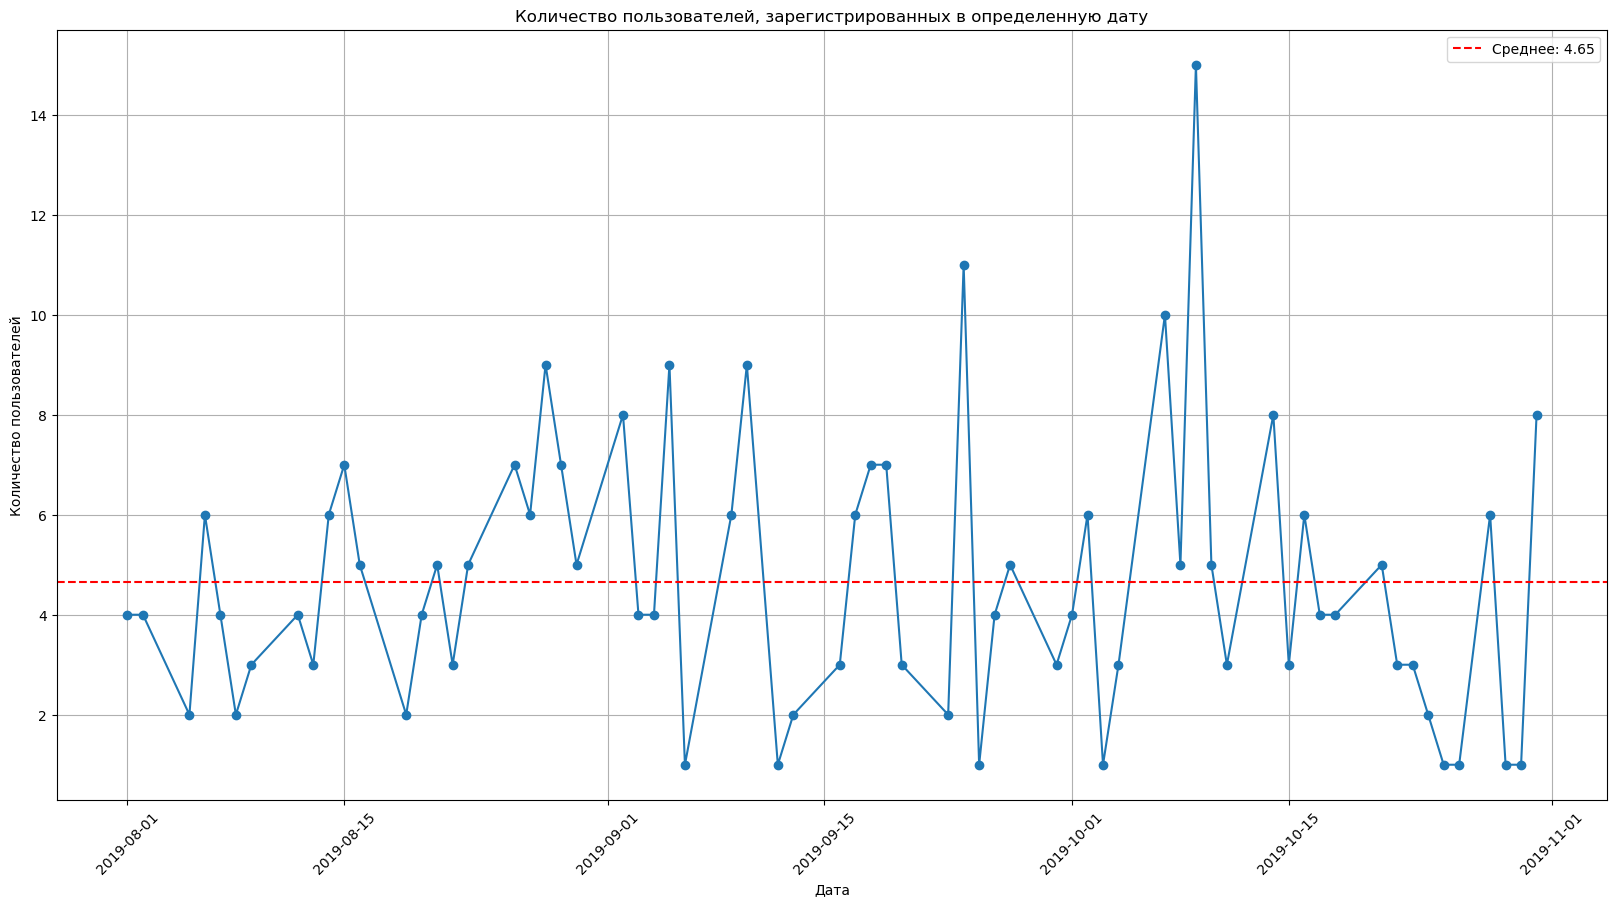

In [37]:
# Подсчет количества уникальных пользователей, зарегистрированных в каждую дату
user_counts = data_no_outliers.groupby(data_no_outliers['date_start'])['user_id'].nunique().reset_index(name='counts')

# Вычисление среднего значения
average_count = user_counts['counts'].mean()

# Построение графика
plt.figure(figsize=(20, 10))
plt.plot(user_counts['date_start'], user_counts['counts'], marker='o')
plt.axhline(y=average_count, color='r', linestyle='--', label=f'Среднее: {average_count:.2f}')
plt.title('Количество пользователей, зарегистрированных в определенную дату')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

В среднем около 5 новых пользователей регистрировались ежедневно на протяжении исследуемого периода

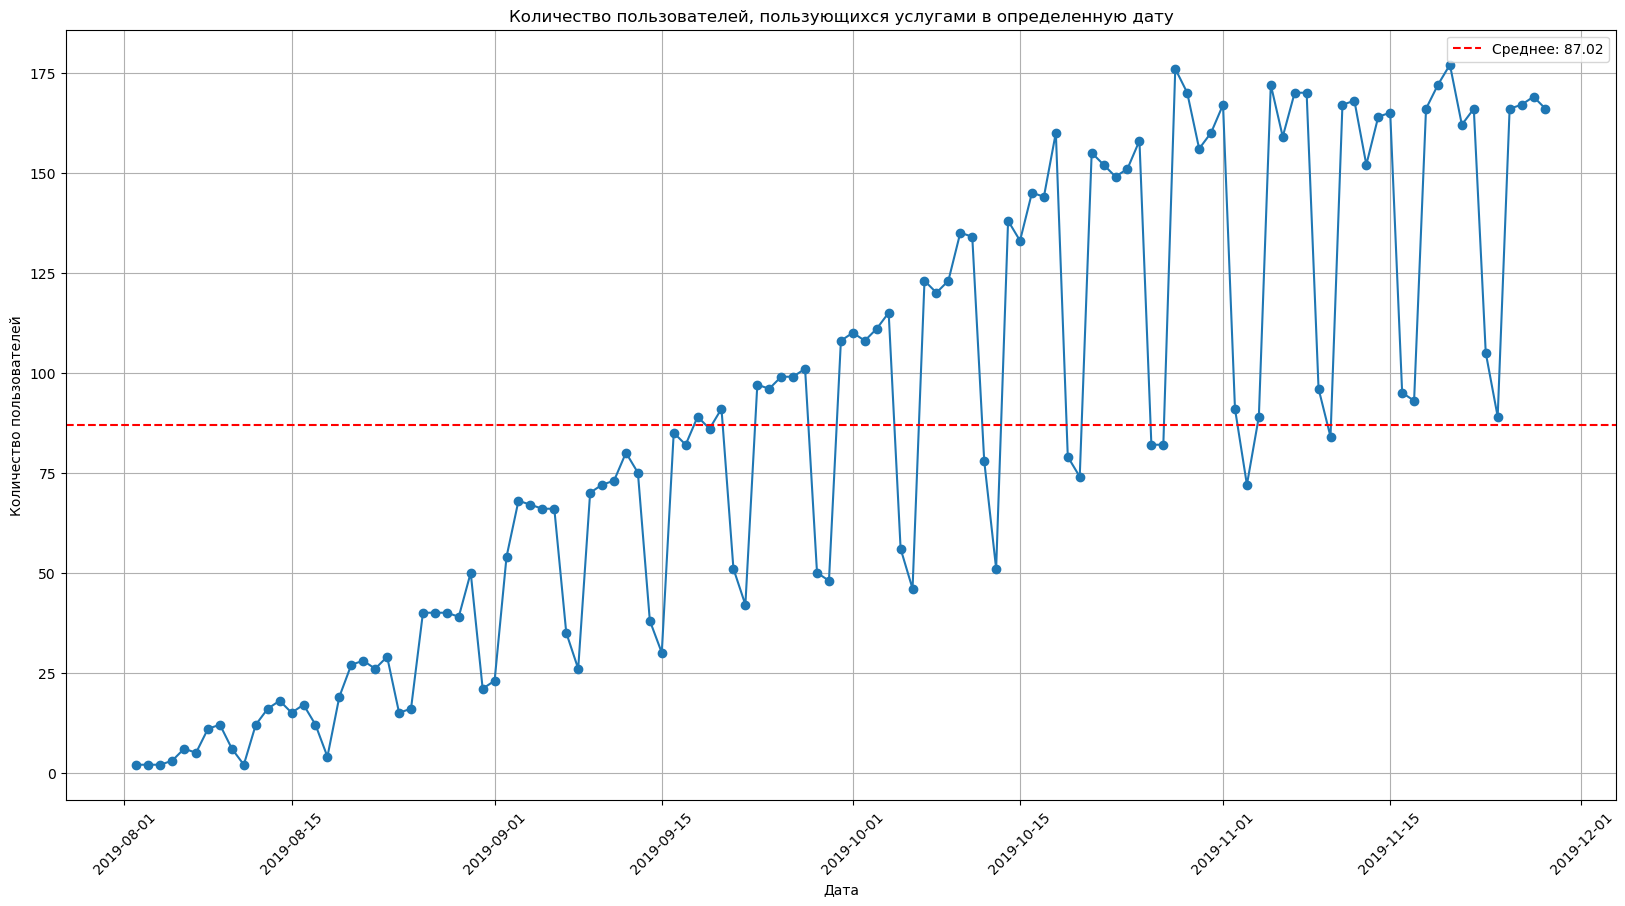

In [38]:
# Подсчет количества уникальных пользователей, пользующихся услугами в каждую дату
active_user_counts = data_no_outliers.groupby(data_no_outliers['date_only'])['user_id'].nunique().reset_index(name='counts')

# Вычисление среднего значения
average_count = active_user_counts['counts'].mean()

# Построение графика
plt.figure(figsize=(20, 10))
plt.plot(active_user_counts['date_only'], active_user_counts['counts'], marker='o')
plt.axhline(y=average_count, color='r', linestyle='--', label=f'Среднее: {average_count:.2f}')
plt.title('Количество пользователей, пользующихся услугами в определенную дату')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

В течение первых трёх месяцев исследуемого периода наблюдается равномерный рост числа пользователей, активно пользующихся услугами. В ноябре темпы роста замедлились, и число пользователей стабилизировалось, выйдя на плато. Также выявлена сезонность, связанная с рабочими и выходными днями: в выходные дни активность пользователей значительно ниже по сравнению с будними днями. Однако стоит отметить, что с увеличением даты, даже в выходные, наблюдается рост числа пользователей.

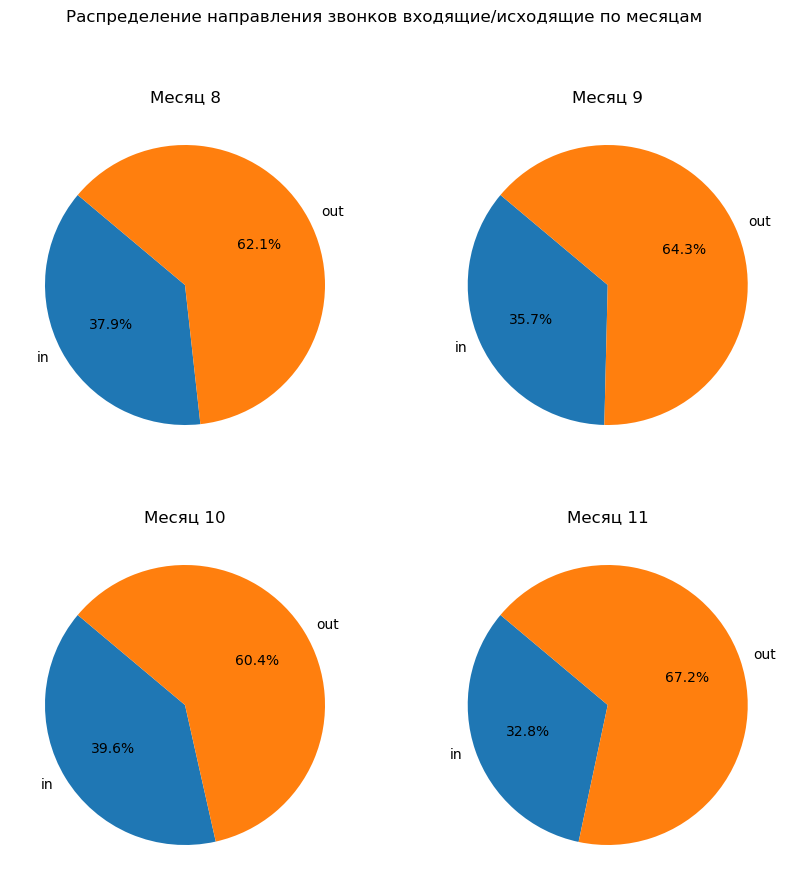

In [39]:
# Создание Figure с четырьмя подграфиками
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Распределение направления звонков входящие/исходящие по месяцам')

# Сортируем и перебираем каждый месяц для построения диаграммы
for i, month in enumerate(sorted(data_no_outliers['month'].unique())):
    # Подсчет звонков по направлениям для текущего месяца
    direction_counts = (data_no_outliers[data_no_outliers['month'] == month]
                            .groupby('direction')['calls_count'].sum()
                            .reset_index())
    
    # Определение позиции подграфика в сетке
    ax = axs[i // 2, i % 2]
    ax.pie(direction_counts['calls_count'], labels=direction_counts['direction'], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Месяц {month}')

plt.show()

Ежемесячно клиенты больше совершают звонков чем принимают

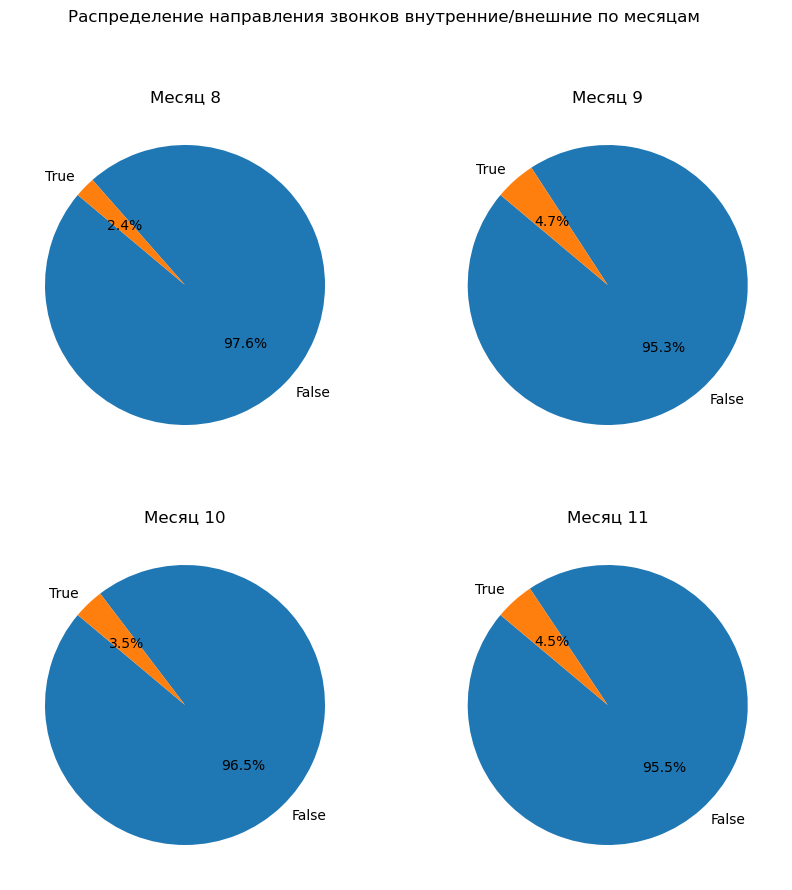

In [40]:
# Создание Figure с четырьмя подграфиками
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Распределение направления звонков внутренние/внешние по месяцам')

# Сортируем и перебираем каждый месяц для построения диаграммы
for i, month in enumerate(sorted(data_no_outliers['month'].unique())):
    # Подсчет звонков по направлениям для текущего месяца
    direction_counts = (data_no_outliers[data_no_outliers['month'] == month]
                            .groupby('internal')['calls_count'].sum()
                            .reset_index())
    
    # Определение позиции подграфика в сетке
    ax = axs[i // 2, i % 2]
    ax.pie(direction_counts['calls_count'], labels=direction_counts['internal'], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Месяц {month}')

plt.show()

Не более 5% звонков от общего числа ежемесячно совершаются между сотрудниками

In [41]:
data_no_outliers.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_only,month,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,0,True,2,0,4,2019-08-04,8,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,2019-08-05,8,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,2019-08-05,8,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,2019-08-05,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,2019-08-05,8,B,2019-08-01


Саммари исследовательского анализа:

1. Общие данные:

- Общее число пользователей в базе: 732
- Период регистрации пользователей: с 2019-08-01 по 2019-10-31
- Общее число зарегистрированных пользователей за исследуемый период: 307
- Период сбора данных: с 2019-08-02 по 2019-11-28

2. Аномалии:

- У пользователей отсутствуют звонки, предшествующие дате регистрации.
- Пользователи, переходящие между тарифами, не выявлены.

3. Активность пользователей:

- График показал, что большинство пользователей начинают совершать звонки в первые дни после регистрации, но некоторые делают это спустя месяц или два, что может указывать на проблемы с использованием сервиса.
- Ежедневный прирост пользователей: в среднем около 5 новых регистраций.
- В течение первых трех месяцев наблюдается равномерный рост числа пользователей, активно пользующихся услугами. В ноябре темпы роста замедлились, и число пользователей стабилизировалось.

4. Временные факторы:

- Наблюдается сезонность активности: в будние дни количество звонков значительно превышает выходные, однако с увеличением даты даже в выходные дни наблюдается рост числа пользователей.

5. Анализ звонков:

- Количество звонков (calls_count): среднее значение — около 17 с высоким стандартным отклонением (63.67), указывающим на значительную вариативность. Половина пользователей совершает менее 4 звонков, четверть — более 12.
- Длительность звонков (call_duration): средняя длительность — 868 минут, медиана — 37 минут, что свидетельствует о наличии как коротких, так и аномально долгих звонков.
- Общая длительность звонков (total_call_duration): средняя — 1159 минут, медиана — 210 минут. Зафиксированы значения, существенно превышающие реалистичный предел 1440 минут в день.

6. Обработка выбросов:

- Использование метода межквартильного размаха (IQR) для обработки выбросов в показателе total_call_duration позволило удалить 5926 строк (12,12% от общего объема данных) без изменения числа уникальных пользователей.

7. Тарифы:

- Наиболее популярные тарифы: B и C, с наибольшим приростом пользователей.
- Количество пользователей с лайфтаймом 3 месяца и более составляет 151, этих пользователей будем считать активными.

8. Звонки между сотрудниками:

- Ежемесячно клиенты совершают больше звонков, чем принимают, и не более 5% звонков происходит между сотрудниками.


### Анализ активности пользователей

Расчитаем среднее количество минут на клиента в день

In [42]:
# Функция дял вычисления среднего количества звонков или средней длительности звонков на пользователя в день.
def calculate_average_calls_or_duration(dataset, metric='calls'):
        
    # Количество звонков на пользователя в день
    calls_count_per_user = (dataset.groupby(['date_only', 'user_id'])
                                .agg({'calls_count': 'sum', 'total_call_duration': 'sum', 'date_start': 'first'})
                                .reset_index())
    
    # Вычисляем количество дней, прошедших с момента регистрации для каждого пользователя
    calls_count_per_user['days_since_registration'] = (calls_count_per_user['date_only'] - calls_count_per_user['date_start']).dt.days
    
    # Убираем записи, где days_since_registration <= 0
    calls_count_per_user = calls_count_per_user[calls_count_per_user['days_since_registration'] > 0]
    
    if metric == 'calls':
        # Вычисление среднего количества звонков на пользователя в день
        calls_count_per_user['average_calls_per_day'] = calls_count_per_user['calls_count'] / calls_count_per_user['days_since_registration']
        average_value = calls_count_per_user['average_calls_per_day'].mean()
        print(f"Среднее количество звонков на пользователя в день: {round(average_value, 2)}")
        
    elif metric == 'duration':
        # Вычисление средней длительности звонков на пользователя в день
        calls_count_per_user['average_call_duration_per_day'] = calls_count_per_user['total_call_duration'] / calls_count_per_user['days_since_registration']
        average_value = calls_count_per_user['average_call_duration_per_day'].mean()
        print(f"Средняя длительность звонков на пользователя в день: {round(average_value, 2)} минут")
        
    else:
        raise ValueError("Параметр metric должен быть 'calls' или 'duration'.")


In [43]:
calculate_average_calls_or_duration(dataset_active_users, metric='duration')  # Для средней длительности звонков

Средняя длительность звонков на пользователя в день: 41.36 минут


Довольно высокая средняя длительность на пользователя. Это может говорить о том, что пользователи проводят значительное время в общении. Возможно если это службы поддержки, то длительные разговоры могут означать сложные запросы или удовлетворение запросов клиентов.

In [44]:
# Функция для построения графика топ-10 пользователей по определяемому критерию
def plot_top_users_by_month(dataset, month, parameter):
    # Фильтрация данных для текущего месяца
    monthly_data = dataset[dataset['month'] == month]

    # Сортировка пользователей по длительности звонков в порядке убывания
    top_users = monthly_data.sort_values(by=parameter, ascending=False).head(10)

    # Построение графика
    plt.figure(figsize=(20, 10))
    sns.barplot(x='user_id', y=parameter, data=top_users, order=top_users['user_id'])
    plt.title(f'Топ-10 пользователей по {parameter} в месяце {month}')
    plt.xlabel('Пользователь')
    plt.ylabel(parameter)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [45]:
# Группировка данных по месяцам и user_id и подсчет общей длительности звонков
user_call_duration_monthly = dataset_active_users.groupby(['month', 'user_id'])['call_duration'].sum().reset_index()

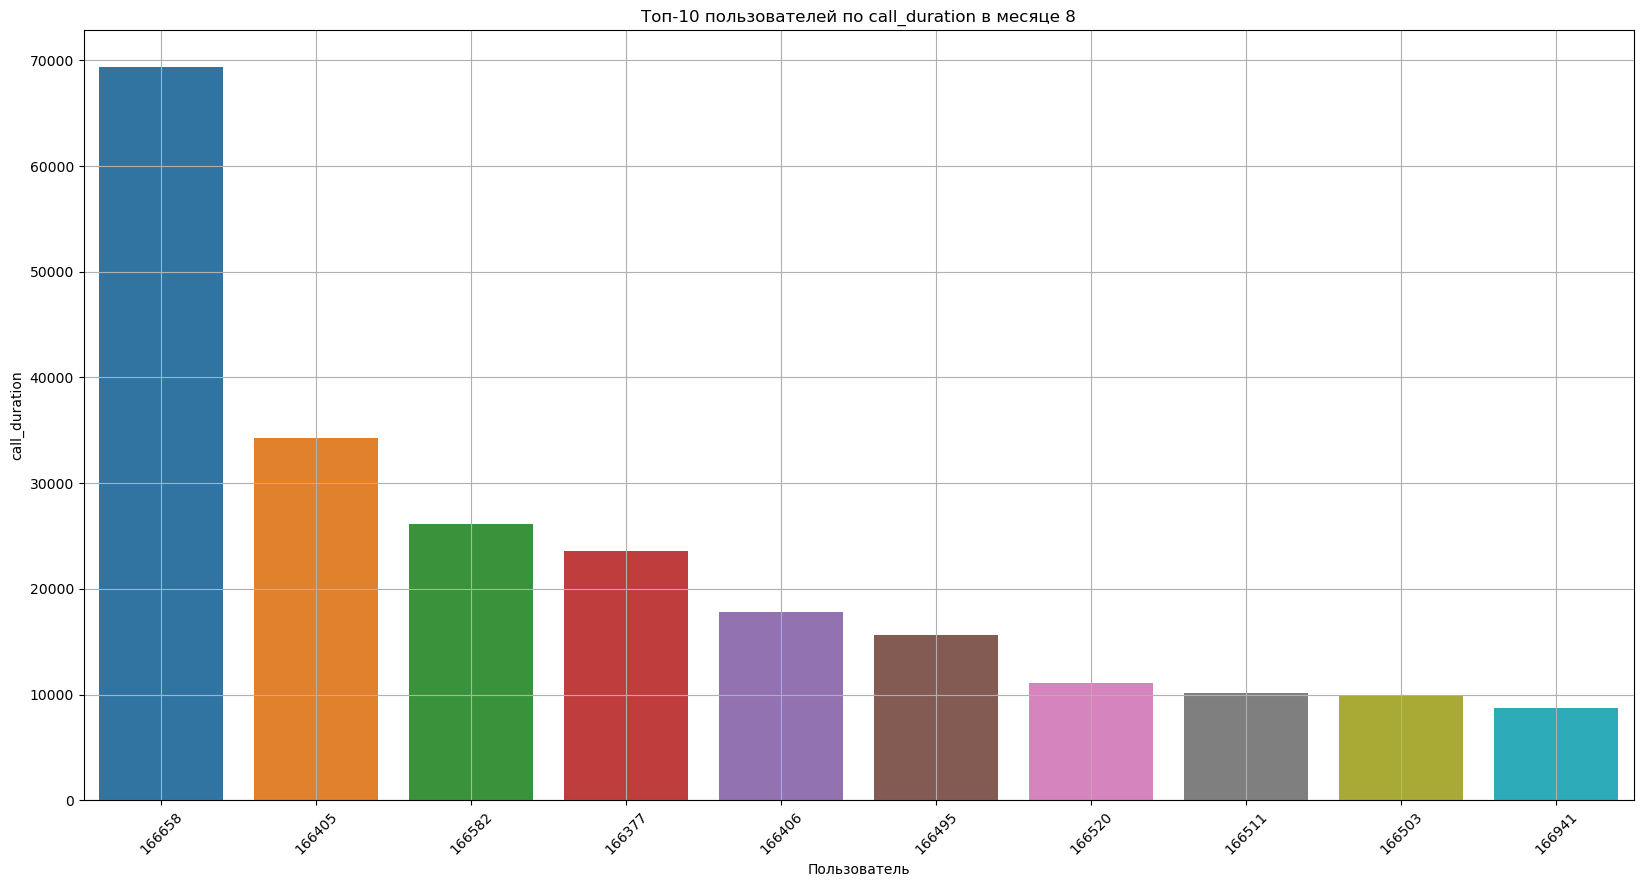

In [46]:
plot_top_users_by_month(user_call_duration_monthly, 8, 'call_duration')

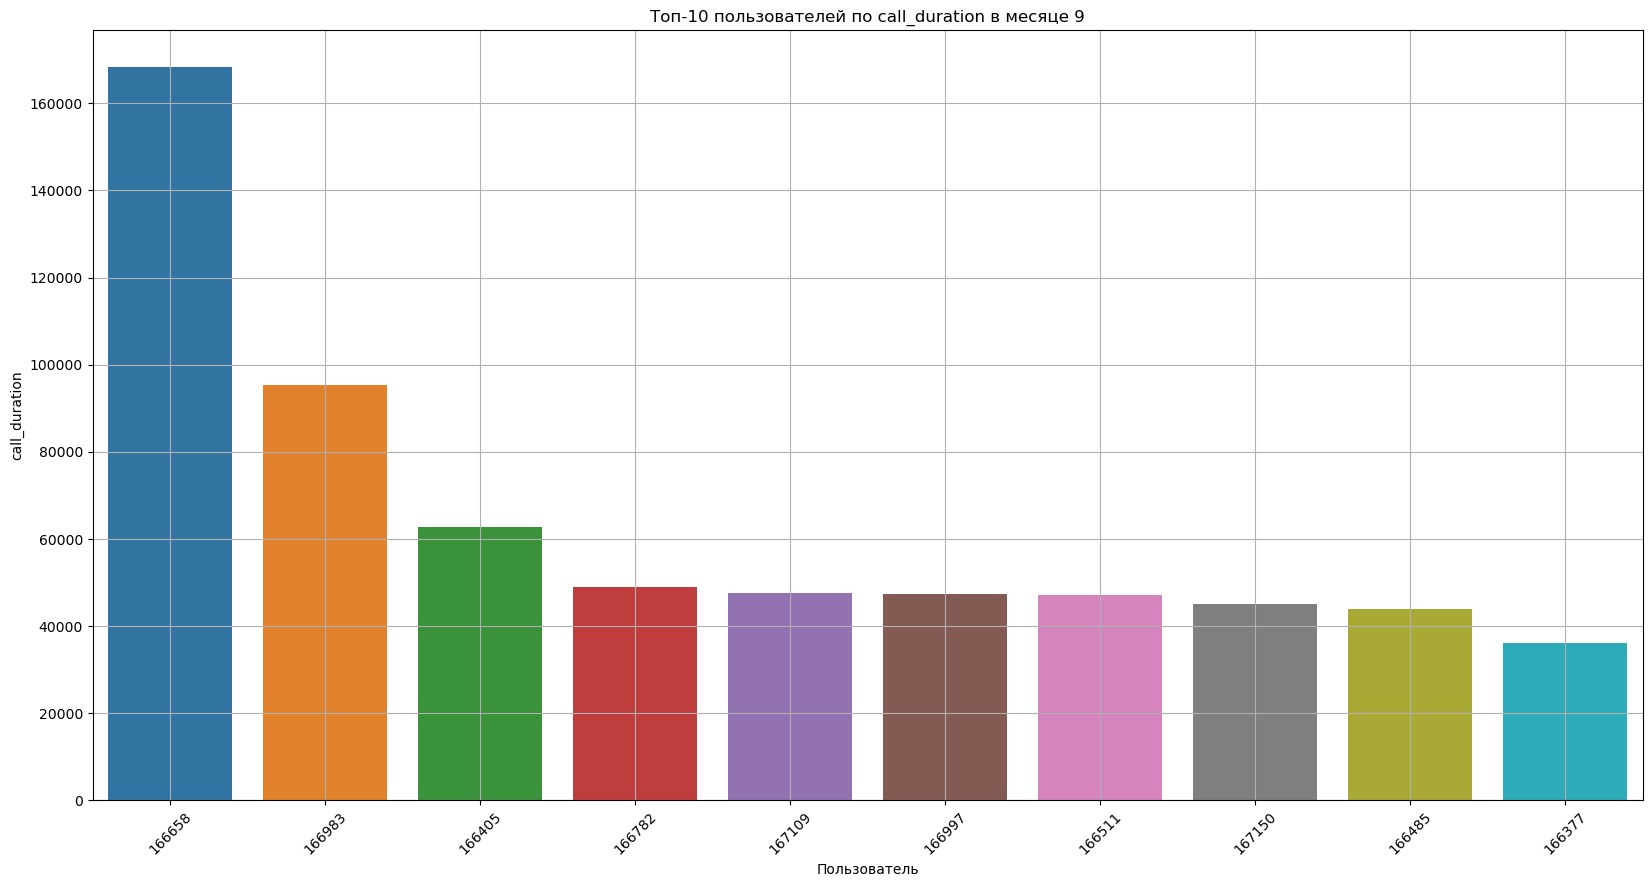

In [47]:
plot_top_users_by_month(user_call_duration_monthly, 9, 'call_duration')

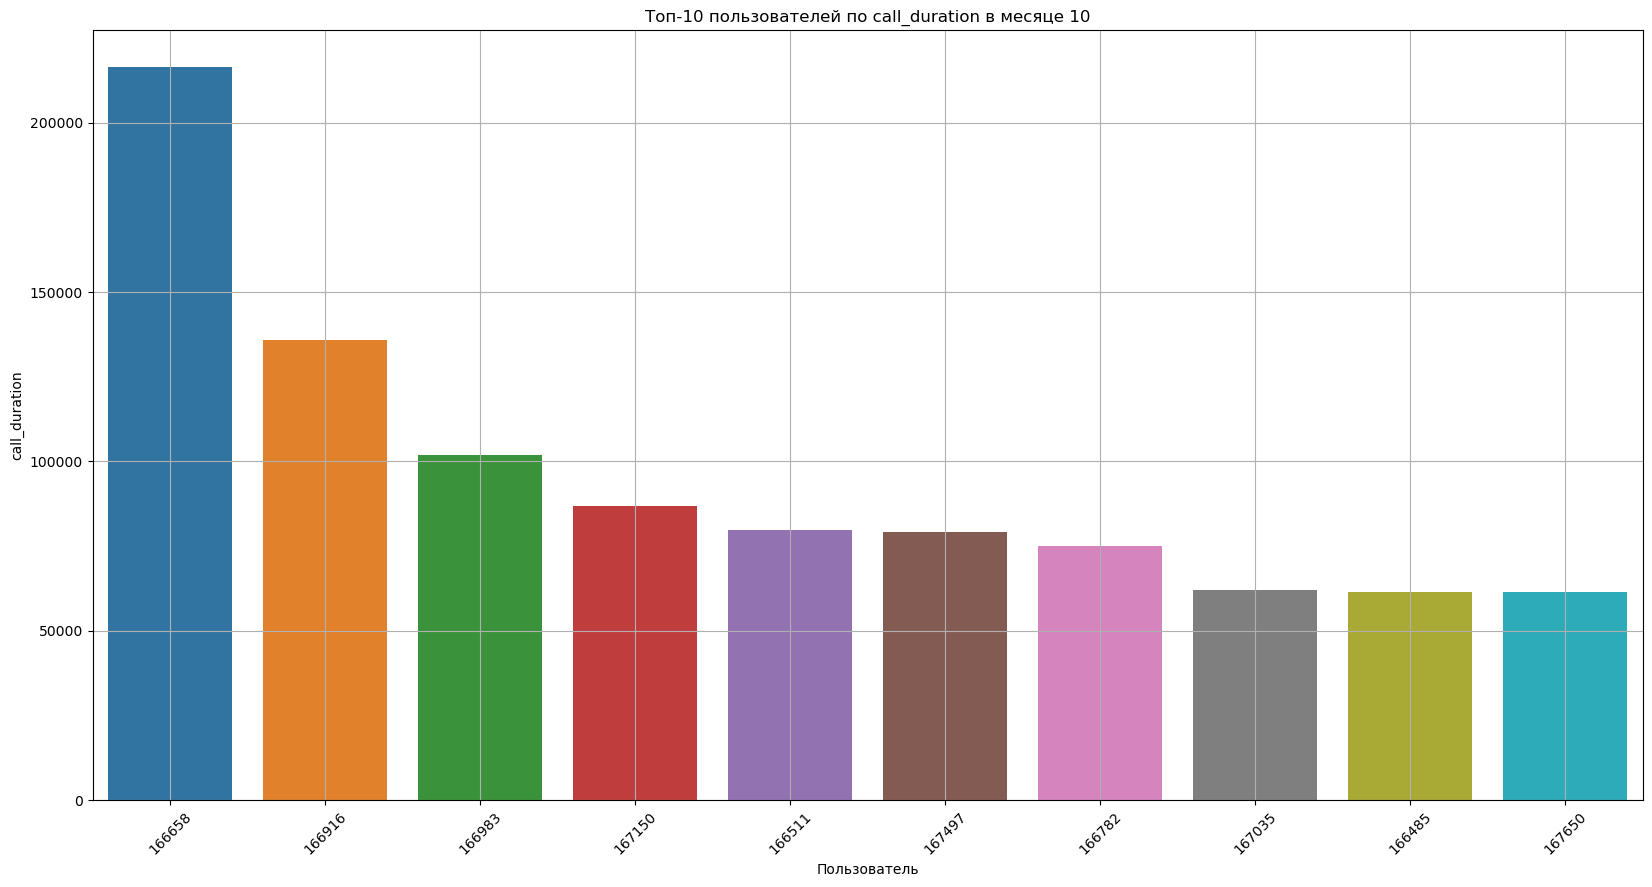

In [48]:
plot_top_users_by_month(user_call_duration_monthly, 10, 'call_duration')

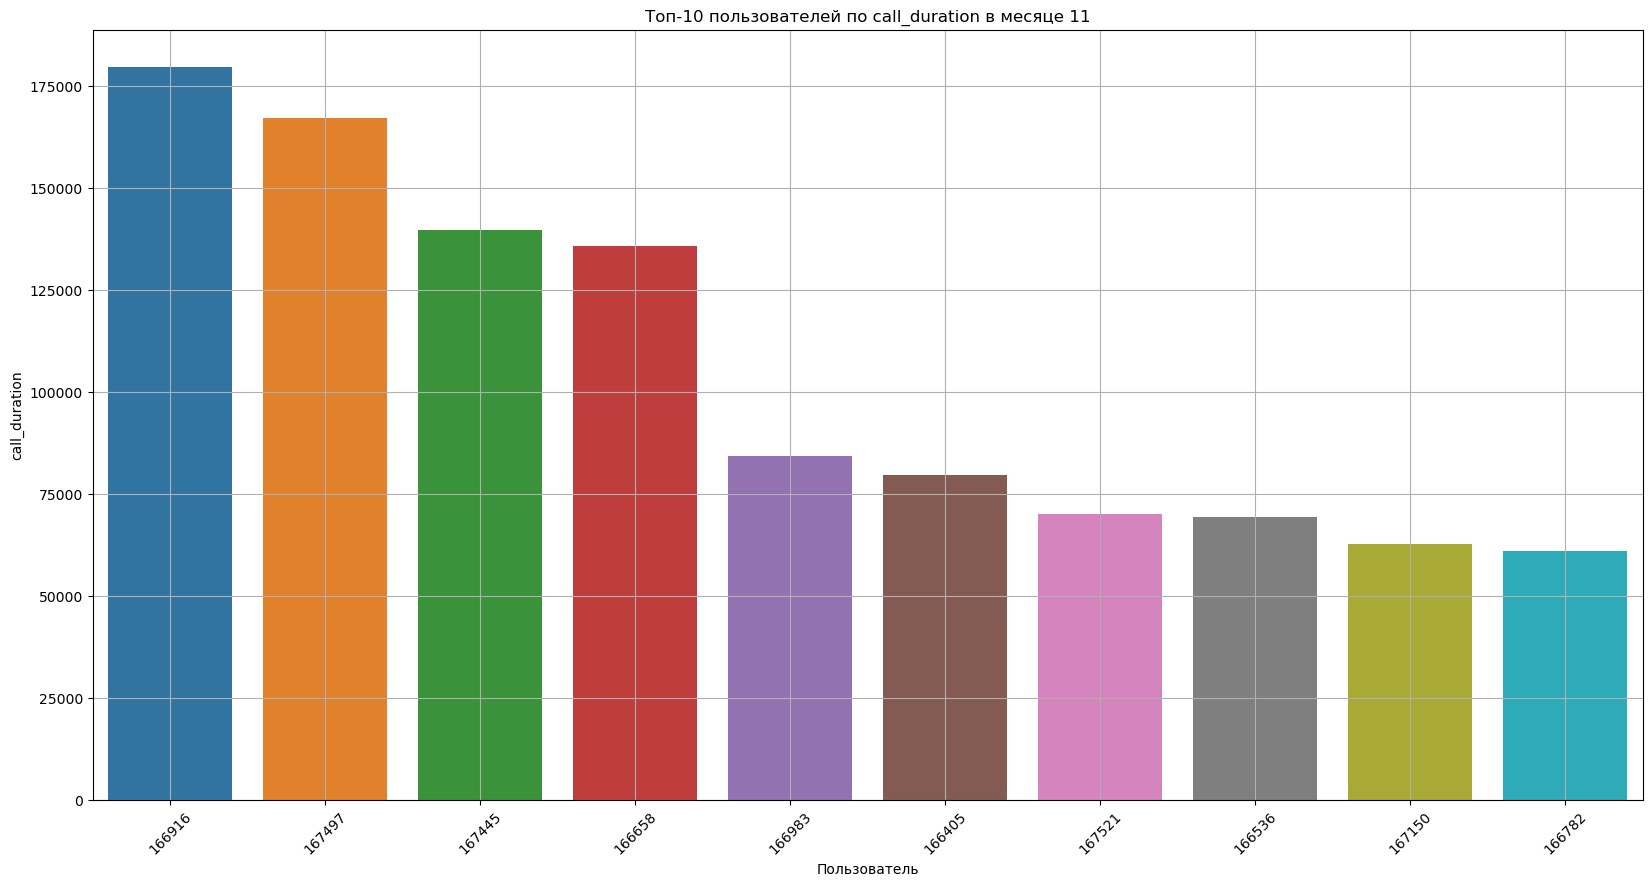

In [49]:
plot_top_users_by_month(user_call_duration_monthly, 11, 'call_duration')

В каждом месяце наблюдается различное распределение длительности звонков среди пользователей. Некоторые пользователи демонстрируют значительно более высокую активность по сравнению с другими. Топ-10 пользователей по длительности звонков варьируются от месяца к месяцу, что может указывать на изменения в поведении пользователей. В некоторых месяцах наблюдается увеличение общей длительности звонков. В других месяцах, напротив, наблюдается снижение активности, что может требовать дополнительного анализа для понимания причин. Пользователи, которые постоянно входят в топ-10 по длительности звонков, могут быть ключевыми клиентами для компании. Идентификация таких пользователей также позволяет компании направить маркетинговые усилия на удержание и привлечение подобных клиентов.


In [50]:
calculate_average_calls_or_duration(dataset_active_users, metric='calls')  # Для среднего числа звонков

Среднее количество звонков на пользователя в день: 0.77


Значение меньше одного звонка в день на пользователя, что указывает на низкую частоту взаимодействий. Комбинация высоких средних минут и низкого количества звонков может означать, что, когда пользователи решаются на звонок, они проводят в нем значительное время, возможно, чтобы решить сложные проблемы или получить детальную информацию

In [51]:
# Группировка данных по месяцам и user_id и подсчет общего числа звонков
user_calls_count_monthly = dataset_active_users.groupby(['month', 'user_id'])['calls_count'].sum().reset_index()

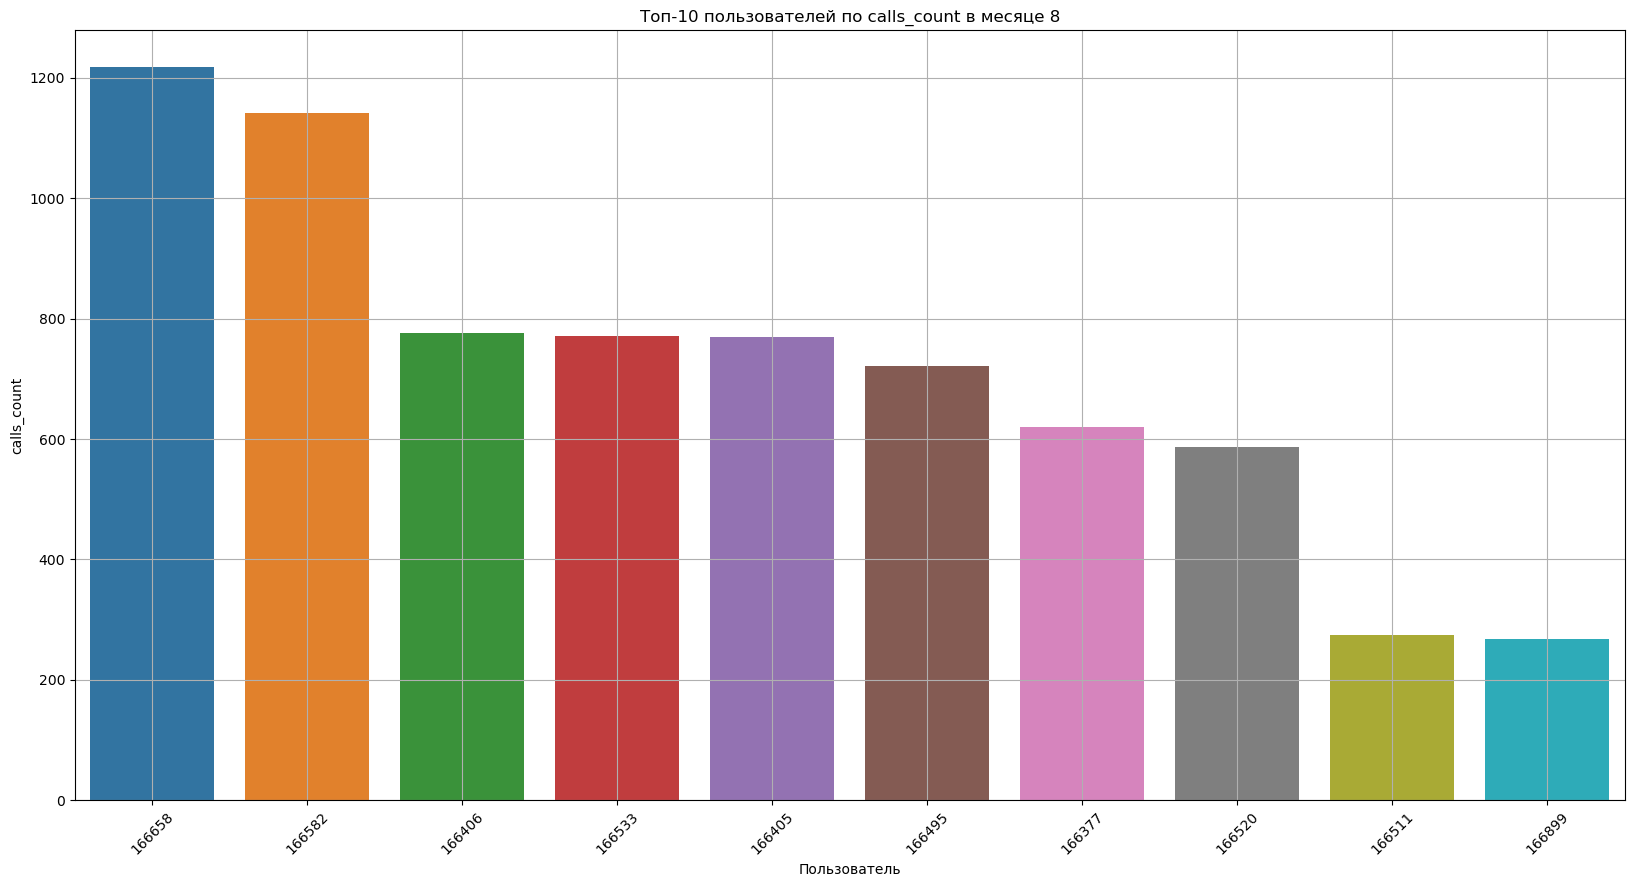

In [52]:
plot_top_users_by_month(user_calls_count_monthly, 8, 'calls_count')

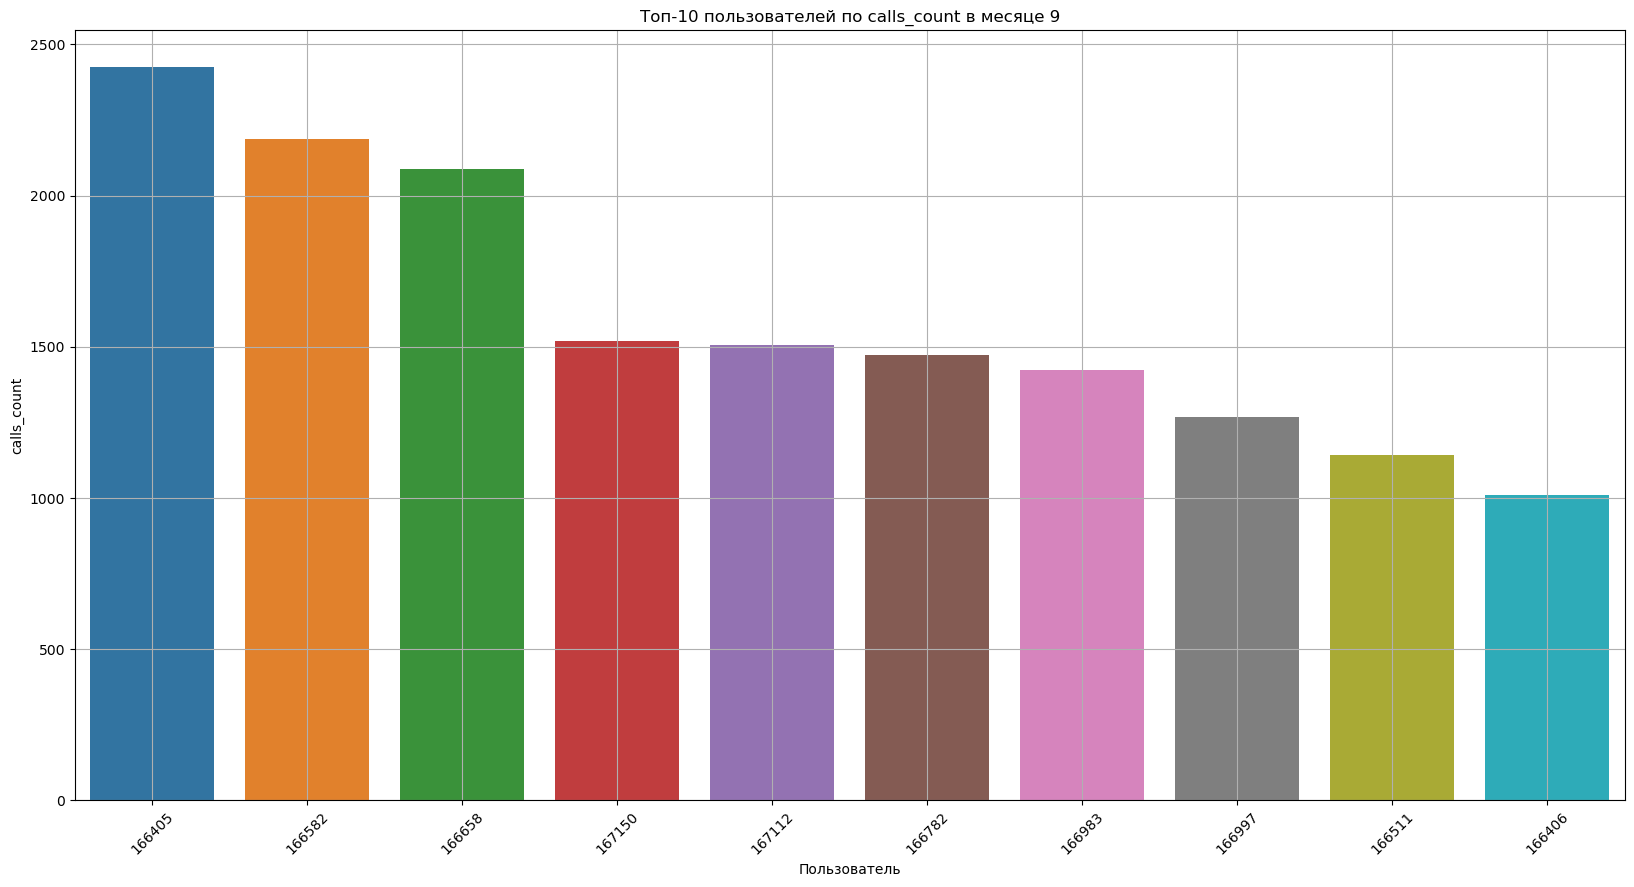

In [53]:
plot_top_users_by_month(user_calls_count_monthly, 9, 'calls_count')

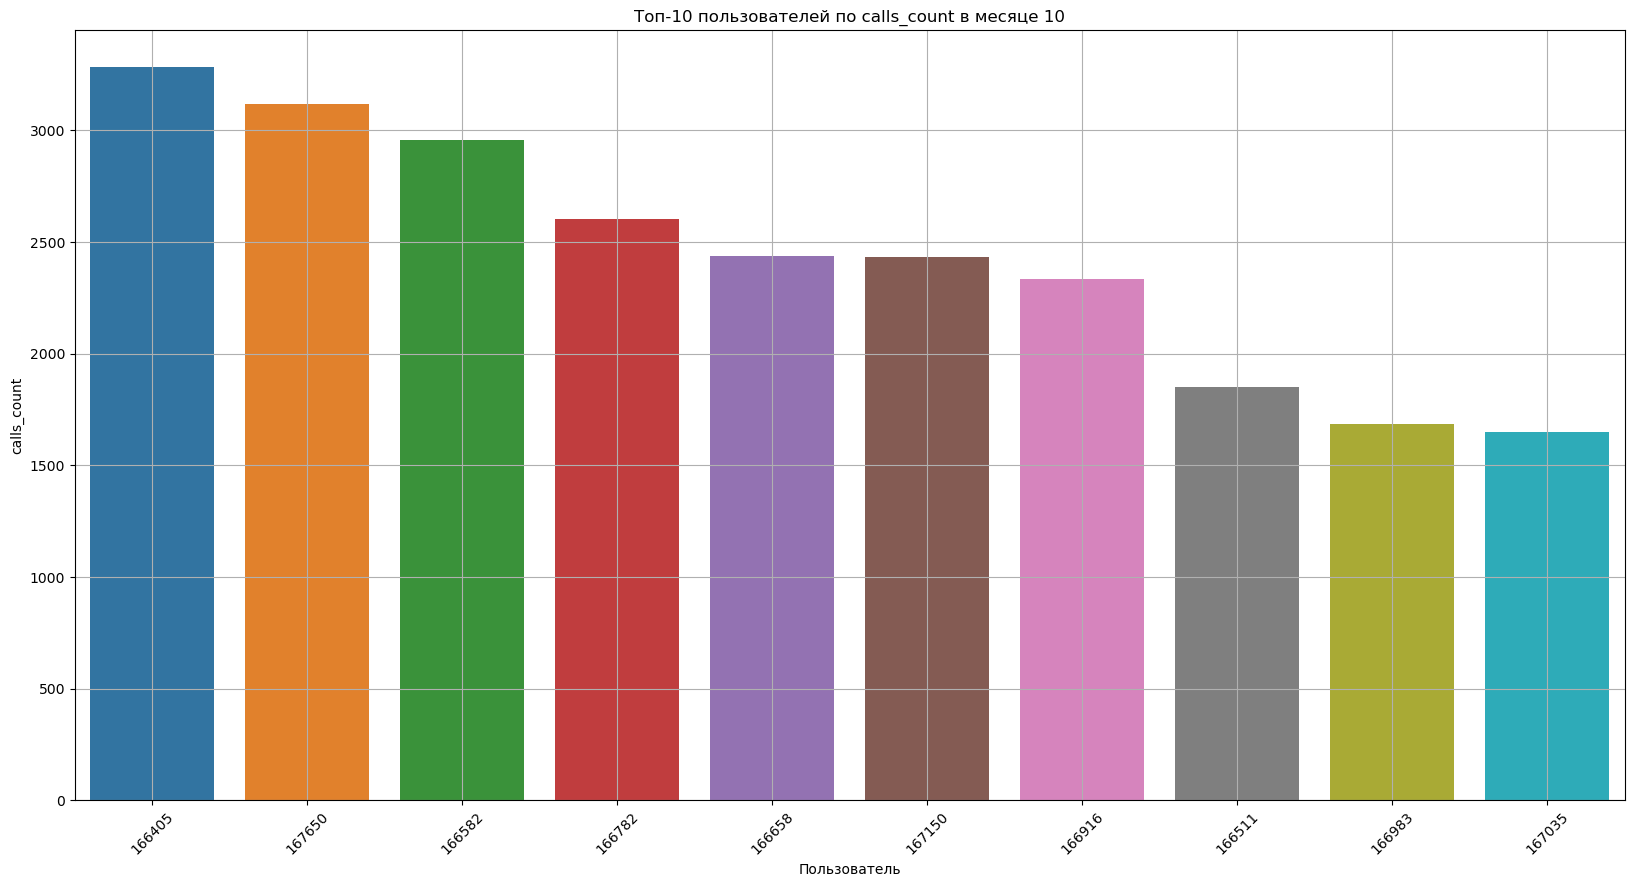

In [54]:
plot_top_users_by_month(user_calls_count_monthly, 10, 'calls_count')

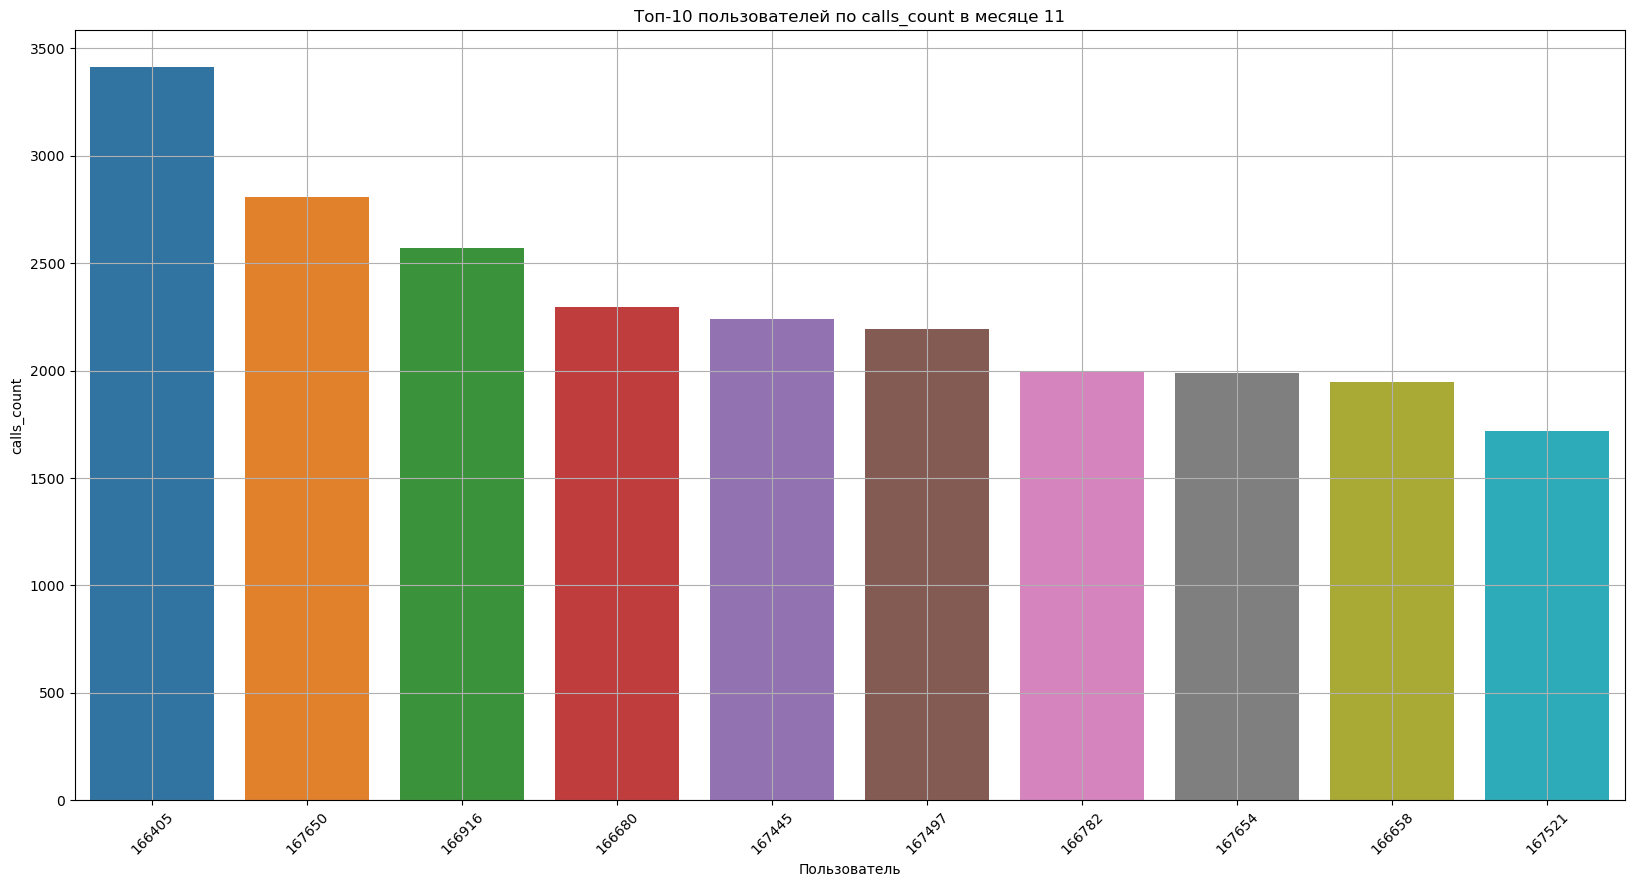

In [55]:
plot_top_users_by_month(user_calls_count_monthly, 11, 'calls_count')

Похожая картина наблюдается для распределения числа звонков. Некоторые пользователи входят в топ-10 по обоим показателям. 

### Анализ активности операторов

In [56]:
# Функция для расчета метрик на каждого оператора
def calculate_operator_metrics(dataset, metric='average_call_duration'):
    # Группируем данные по дате и пользователю, агрегируя количество звонков и общую длительность
    operator_calls = (dataset.groupby(['date_only'])
                      .agg({'calls_count': 'sum', 'total_call_duration': 'sum'})
                      .reset_index())
    
    # Вычисляем общее количество операторов (уникальных user_id)
    total_operators = dataset['user_id'].nunique()

    # Убираем записи, где количество звонков равно нулю, чтобы избежать деления на ноль
    operator_calls = operator_calls[operator_calls['calls_count'] > 0]

    # Рассчитываем среднее количество звонков на оператора в день
    operator_calls['calls_per_operator'] = operator_calls['calls_count'] / total_operators
    
    # Рассчитываем среднюю длительность звонков на оператора в день
    operator_calls['duration_per_operator'] = operator_calls['total_call_duration'] / total_operators

    if metric == 'average_call_duration':
        average_metric = operator_calls['duration_per_operator'].mean()
        print(f"Средняя длительность звонков на оператора в день: {round(average_metric, 2)} минут")
    elif metric == 'average_calls':
        average_metric = operator_calls['calls_per_operator'].mean()
        print(f"Среднее количество звонков на оператора в день: {round(average_metric, 2)}")
    else:
        print("Неверный параметр. Используйте 'average_call_duration' или 'average_calls'.")



In [57]:
# Функция для построения графика топ-10 операторов для рассматриваемого параметра
def plot_top_operators_by_month(dataset, month, parameter):
    # Фильтрация данных для текущего месяца
    monthly_data = dataset[dataset['month'] == month]

    # Сортировка операторов по количеству звонков в порядке убывания
    top_operators = monthly_data.sort_values(by=parameter, ascending=False).head(10)

    # Построение графика
    plt.figure(figsize=(20, 10))
    sns.barplot(x='operator_id', y=parameter, data=top_operators, order=top_operators['operator_id'])
    plt.title(f'Топ-10 операторов по {parameter} в месяце {month}')
    plt.xlabel('Оператор ID')
    plt.ylabel(parameter)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [58]:
# Группировка данных по месяцам и операторам и подсчет длительности звонков
operator_call_duration_monthly = dataset_active_users.query('operator_id != 0').groupby(['month', 'operator_id'])['call_duration'].sum().reset_index()

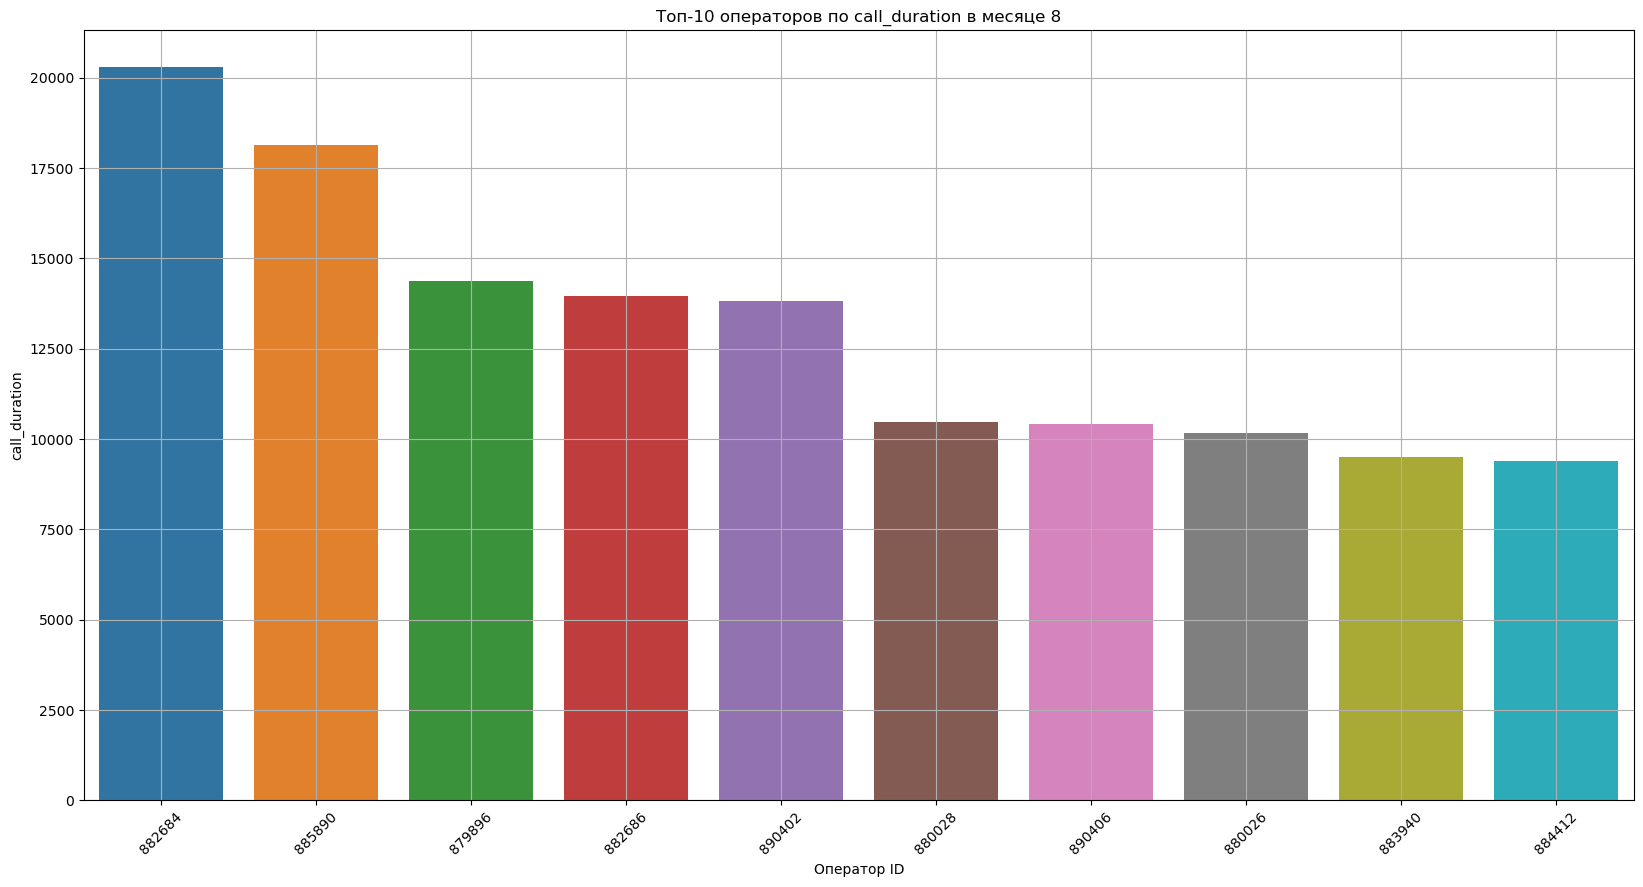

In [59]:
plot_top_operators_by_month(operator_call_duration_monthly, 8, 'call_duration')

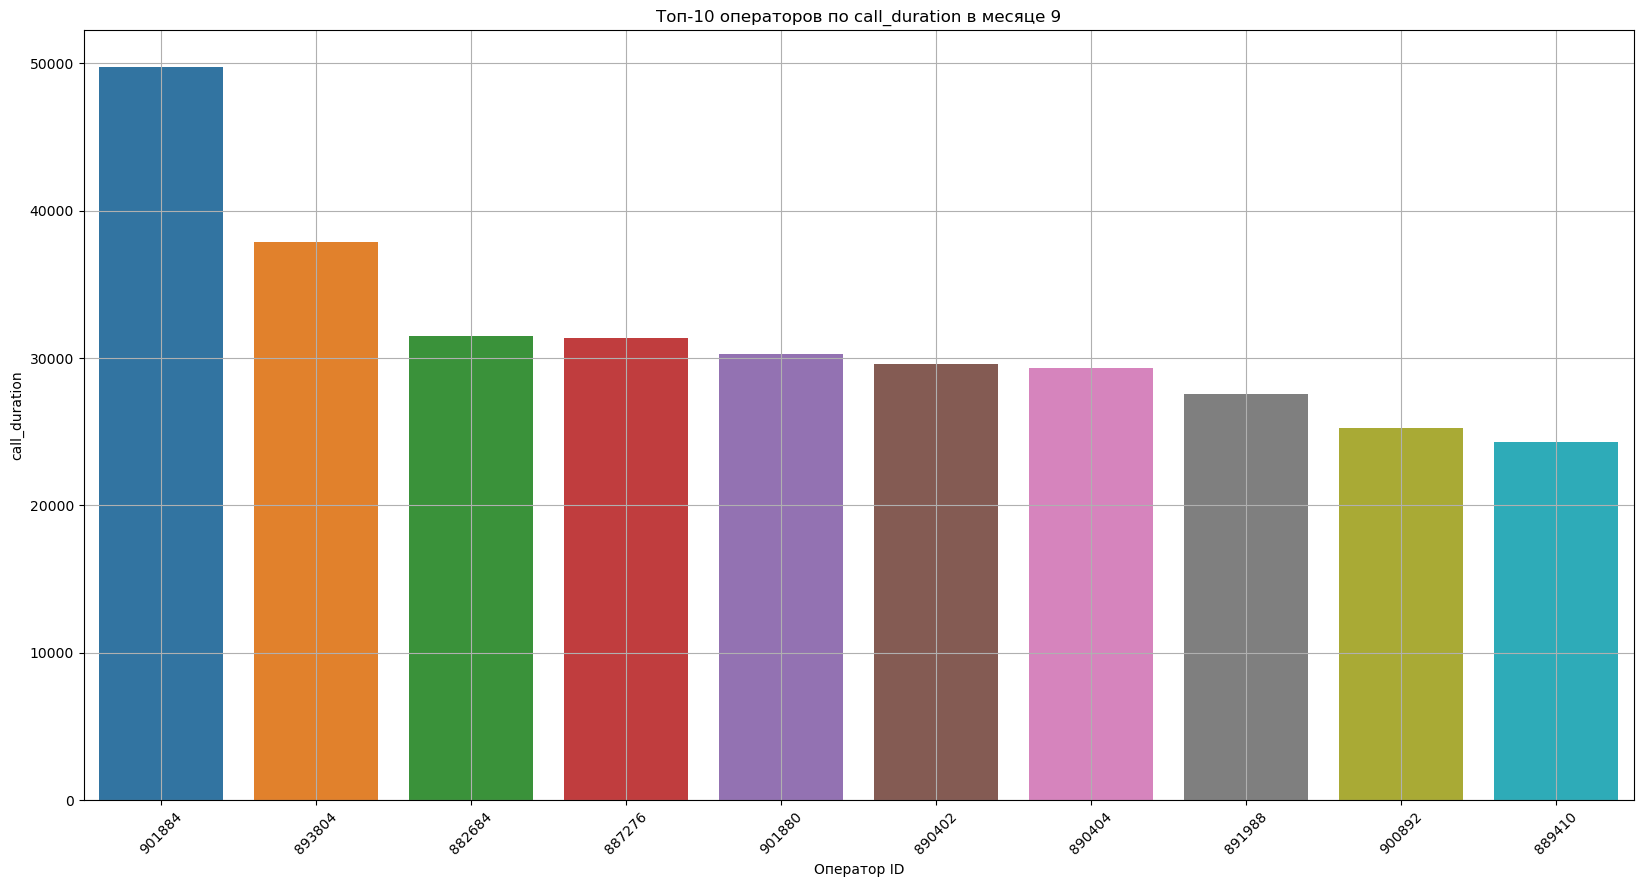

In [60]:
plot_top_operators_by_month(operator_call_duration_monthly, 9, 'call_duration')

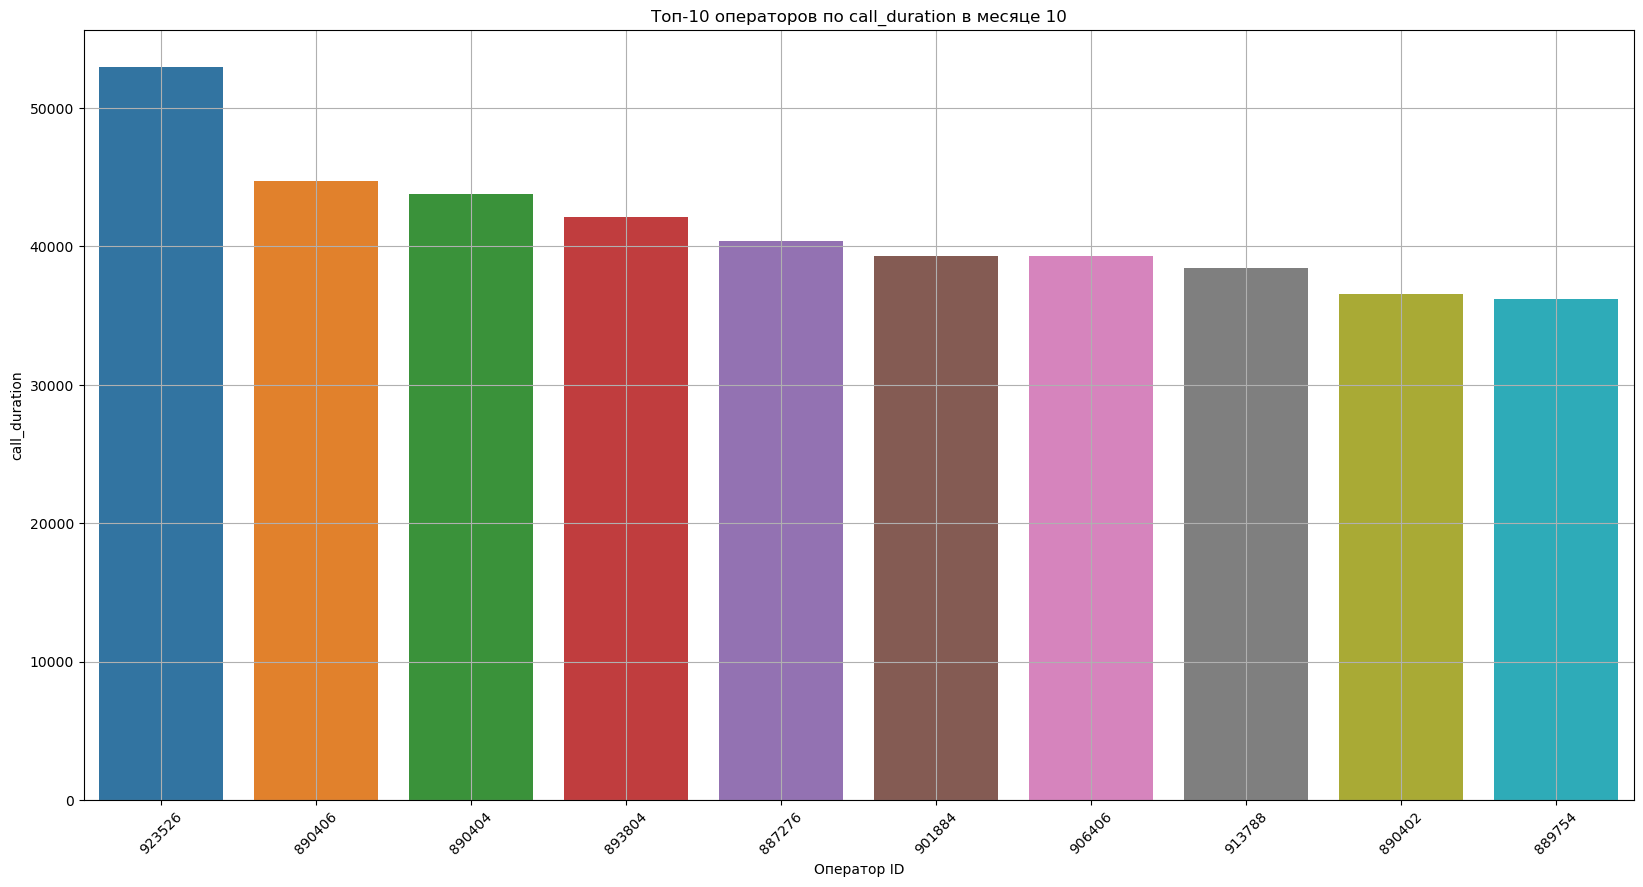

In [61]:
plot_top_operators_by_month(operator_call_duration_monthly, 10, 'call_duration')

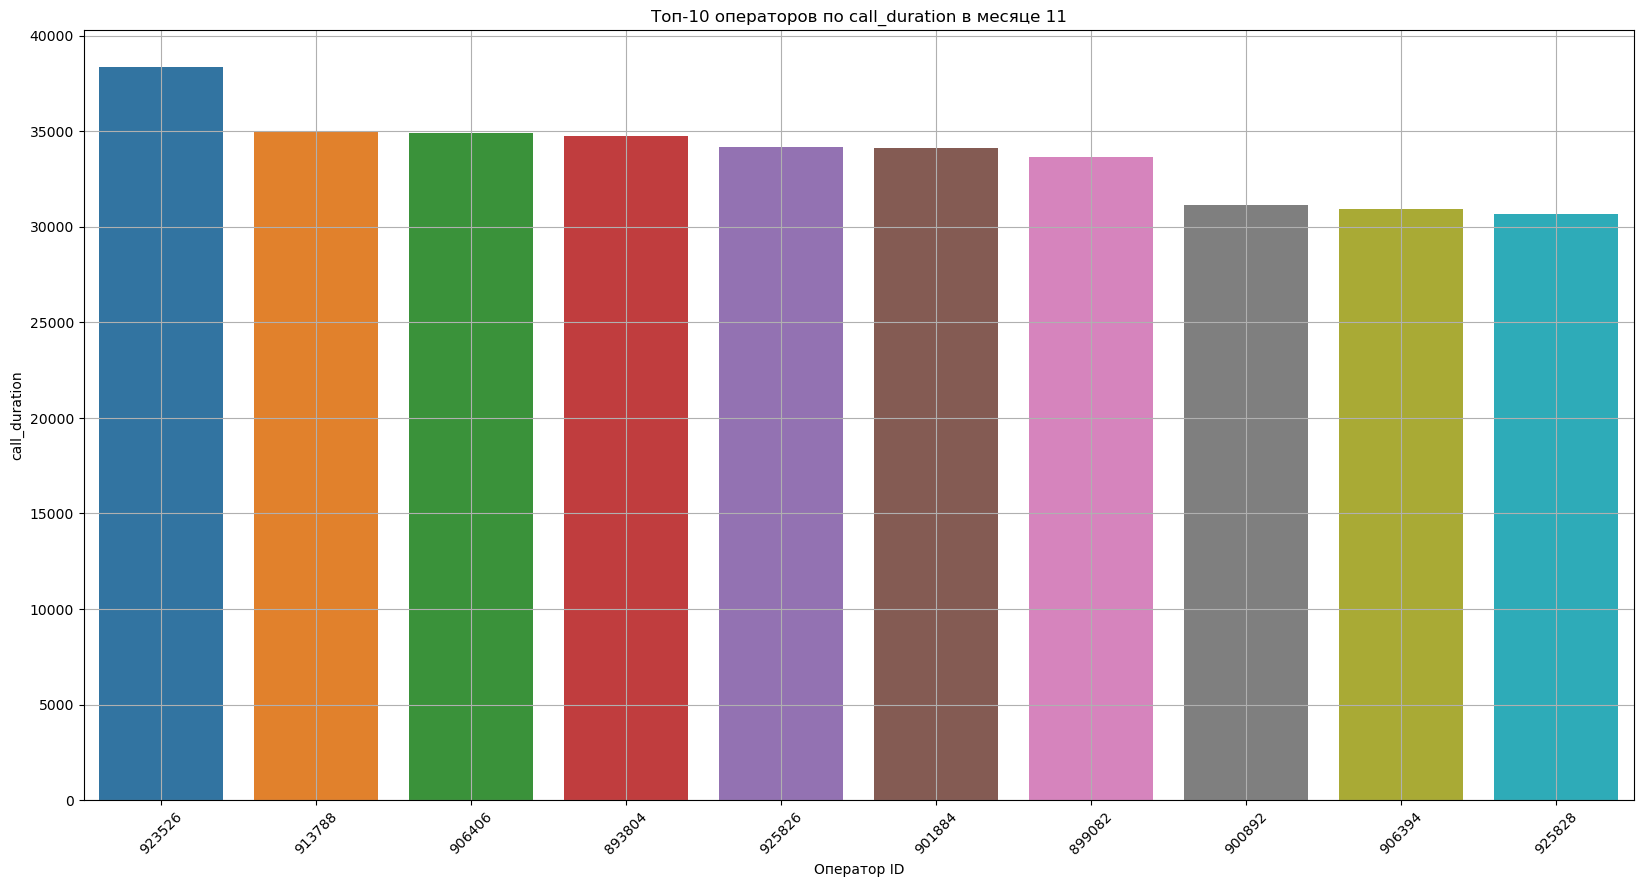

In [62]:
plot_top_operators_by_month(operator_call_duration_monthly, 11, 'call_duration')

Графики показывают, какие операторы имеют наибольшую общую длительность звонков в указанном месяце. Что может указывать на их активность. Несколько операторов имеют значительно большую длительность звонков по сравнению с другими, это может указывать на их большую нагрузку. В этом случае возможно стоит рассмотреть возможность перераспределения звонков

In [63]:
# Длительность звонков на оператора
calculate_operator_metrics(dataset_active_users, metric='average_call_duration')

Средняя длительность звонков на оператора в день: 561.96 минут


Это значительное количество времени, которое операторы проводят на линии, что может указывать на высокую загруженность. Если операторы работают, например, по 8 часов в день, это эквивалентно более 7 часов активного времени звонков, что является довольно высоким показателем.
Вполне возможно, что есть несколько очень длинных звонков, которые существенно увеличивают среднее значение.

In [64]:
# Группировка данных по месяцам и операторам и подсчет количества звонков
operator_calls_monthly = dataset_active_users.query('operator_id != 0').groupby(['month', 'operator_id'])['calls_count'].sum().reset_index()

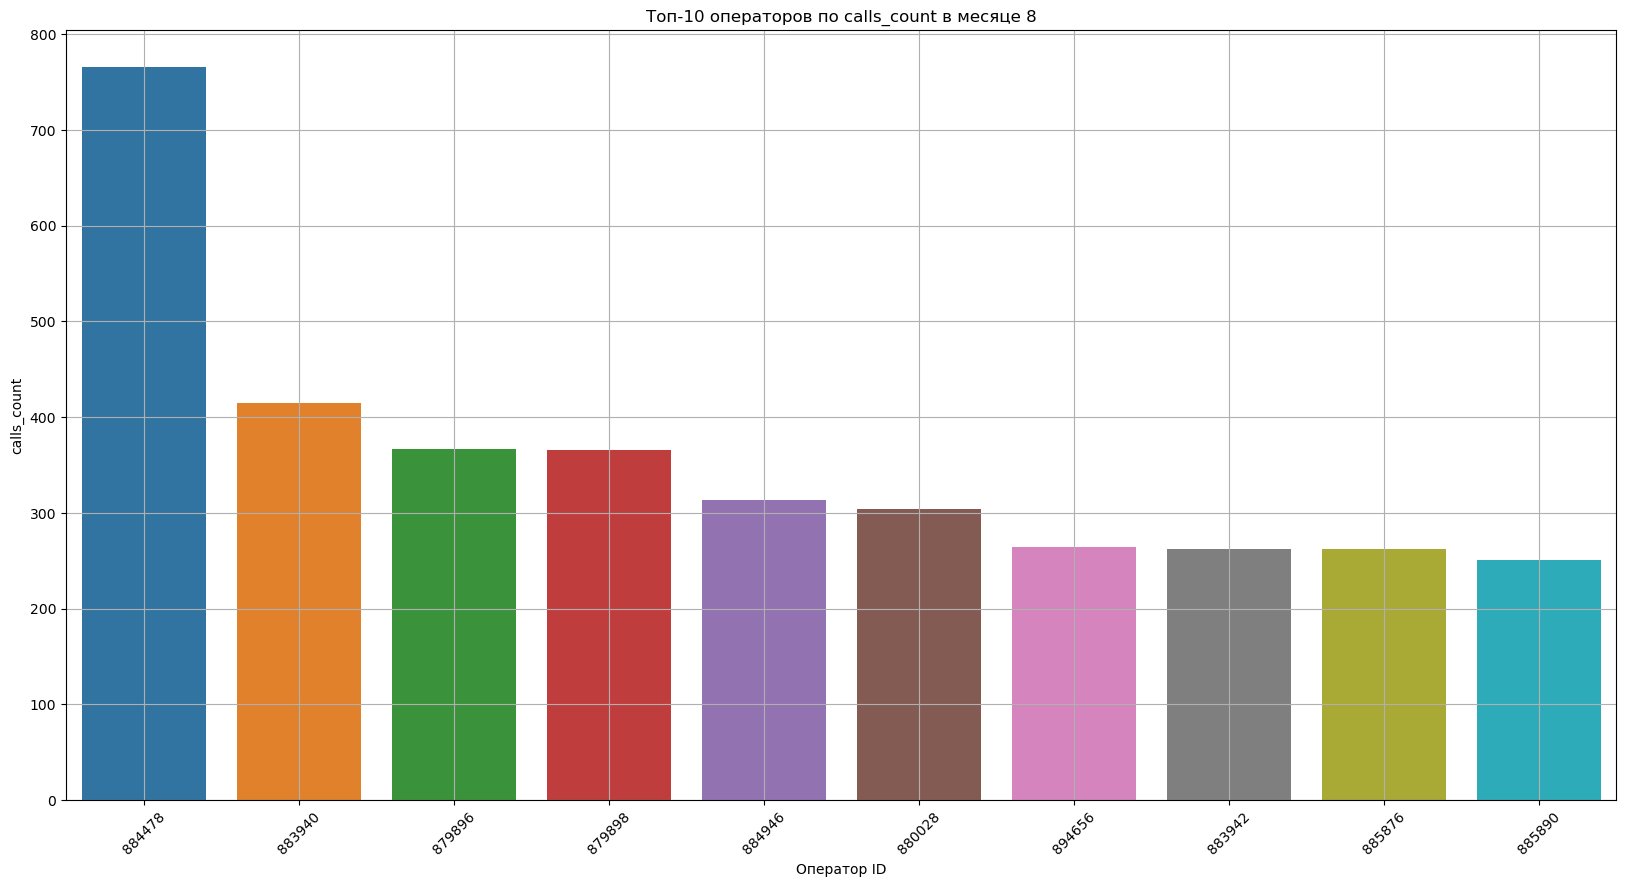

In [65]:
plot_top_operators_by_month(operator_calls_monthly, 8, 'calls_count')

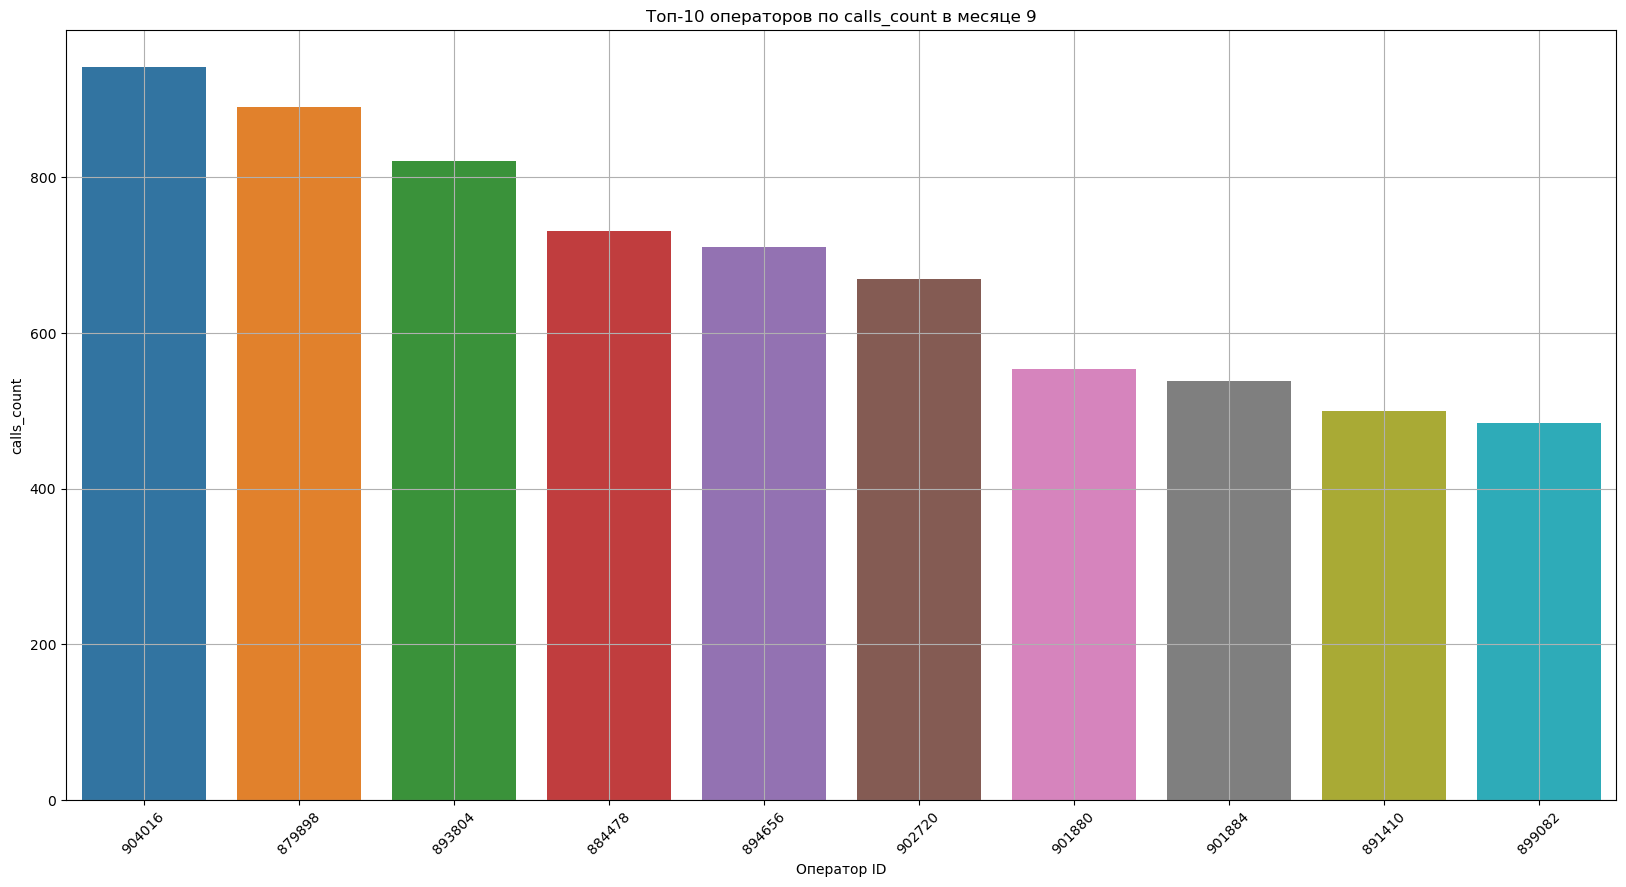

In [66]:
plot_top_operators_by_month(operator_calls_monthly, 9, 'calls_count')

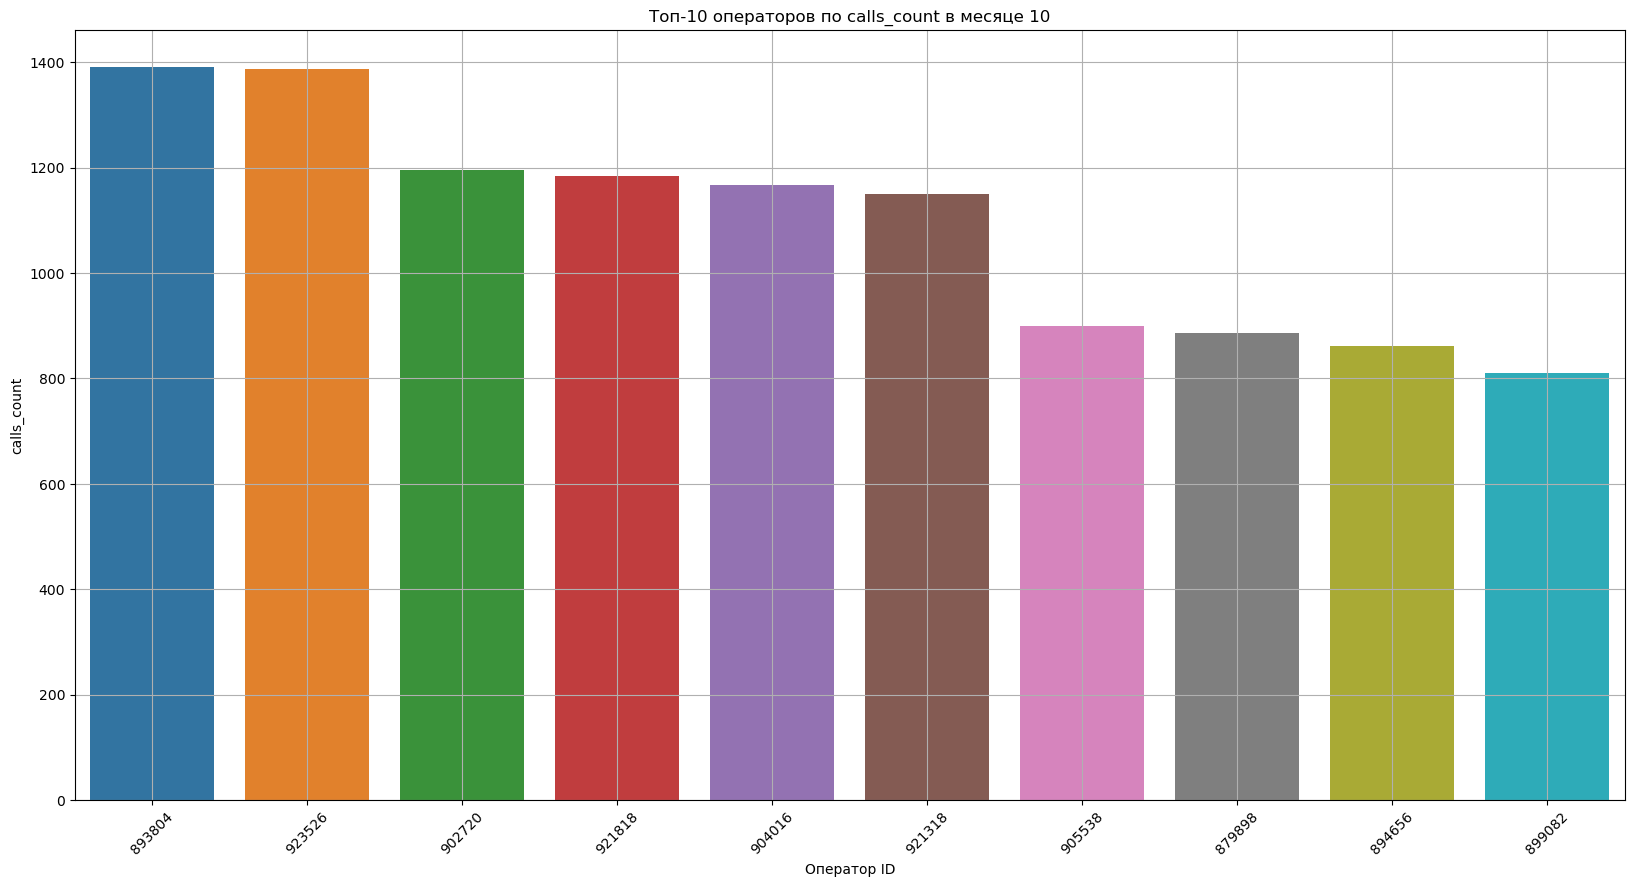

In [67]:
plot_top_operators_by_month(operator_calls_monthly, 10, 'calls_count')

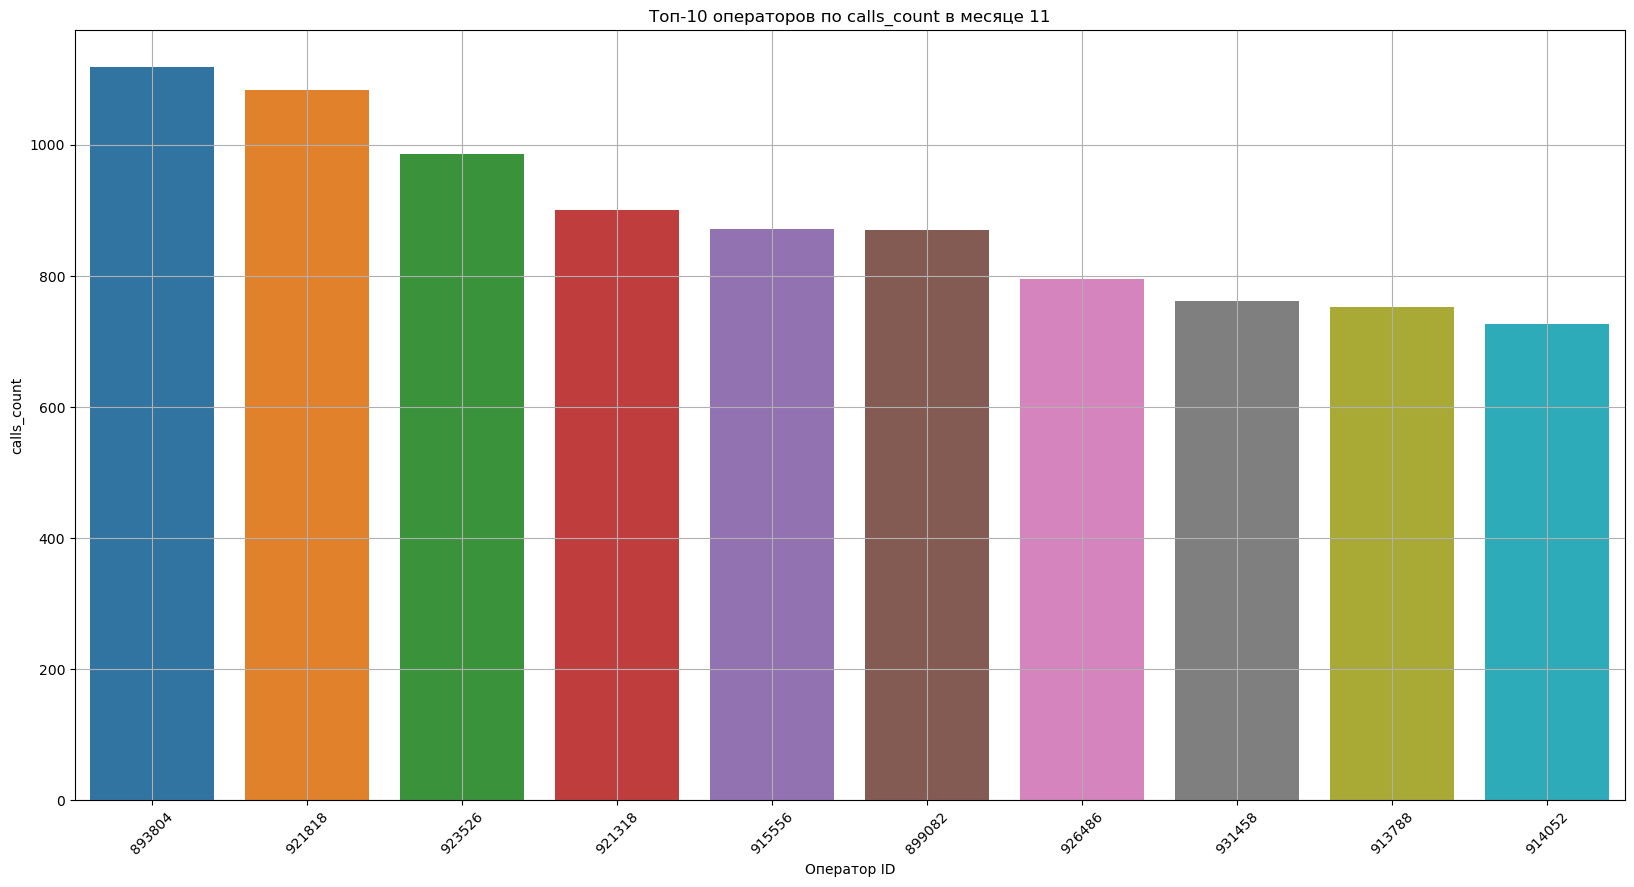

In [68]:
plot_top_operators_by_month(operator_calls_monthly, 11, 'calls_count')

Общее количество звонков по операторам показывает, какие операторы являются наиболее популярными среди пользователей. Некоторые операторы демонстрируют значительно более высокую активность по сравнению с другими. Операторы, которые постоянно входят в топ-10 по количеству звонков, могут говорить о высокой нагрузке на оператора, либо попытке пользователей сэкономить на оплате.

In [69]:
calculate_operator_metrics(dataset_active_users, metric='average_calls')

Среднее количество звонков на оператора в день: 9.58


Это значение может указывать на умеренную нагрузку на операторов. Если каждый оператор в среднем обрабатывает около 10 звонков в день, это может быть вполне управляемым объемом. Низкое количество звонков и высокая длительность могут указывать на сложные или запутанные запросы, которые требуют больше времени для решения. 

## Основной блок исследования

### Расходы клиентов на каждом тарифе

Тарифы формируются исходя из следующей тарифной сетки

In [70]:
costs ={
    'tariff_plan' : ['A', 'B', 'C'],
    'tariff_costs' : [4000, 2000, 1000],
    'incoming_costs': [0, 0, 0],
    'overage_cost_per_minute' : [0.1, 0.15, 0.3],
    'included_minutes' : [2000, 500, 0],
    'external_call_cost_per_minute' : [0.3, 0.5, 0.7],
    'operator_costs' : [50, 150, 300]
}   

# Создание DataFrame
tariff_schedule = pd.DataFrame(costs)  
tariff_schedule

,tariff_plan,tariff_costs,incoming_costs,overage_cost_per_minute,included_minutes,external_call_cost_per_minute,operator_costs
0,A,4000,0,0.10,2000,0.3,50
1,B,2000,0,0.15,500,0.5,150
2,C,1000,0,0.30,0,0.7,300


Для подготовки данных к дальнейшим расчетам необходимо выполнить следующие шаги:

   1. Фильтрация данных: Оставить только те записи, в которых были совершены исходящие вызовы, так как оплата производится исключительно за них.

   2. Подсчет уникальных операторов: Для каждого пользователя необходимо подсчитать количество уникальных операторов, с которыми были совершены вызовы.

   3. Анализ длительности звонков: Рассчитать длительность звонков с разбивкой на внешний и внутренний вызовы.

   4. Объединение данных: Объединить полученные данные и провести необходимые расчеты.

In [71]:
# 1. Определяем активный период исследования
active_period_start = pd.to_datetime('2019-08-01')  # Начало периода
active_period_end = pd.to_datetime('2019-11-28')    # Конец периода

# 2. Фильтруем активных пользователей за активный период
active_users = dataset_active_users[
    (dataset_active_users['date_only'] >= active_period_start) & 
    (dataset_active_users['date_only'] <= active_period_end)]

# 3. Определяем уникальных активных пользователей
unique_active_users = active_users['user_id'].unique()

# 4. Фильтрация исходящих и входящих звонков
outgoing_calls = active_users.query('direction == "out"')
incoming_calls = active_users.query('direction == "in"')

# Группировка входящих звонков по user_id
incoming_calls_grouped = incoming_calls.groupby(['month', 'user_id', 'tariff_plan']).agg({
    'total_call_duration': 'sum',
    'calls_count': 'sum'
}).reset_index()

incoming_calls_grouped.rename(columns={'total_call_duration': 'incoming_call_duration',
                                        'calls_count': 'incoming_calls_count'}, inplace=True)

# 5. Группировка данных по user_id для подсчета уникальных операторов
unique_operators_per_user = active_users.groupby('user_id')['operator_id'].nunique().reset_index()
unique_operators_per_user.rename(columns={'operator_id': 'unique_operators'}, inplace=True)

# 6. Разделение звонков на внешние и внутренние
internal_calls = outgoing_calls.query('internal == True')
external_calls = outgoing_calls.query('internal == False')

# 7. Подсчет длительности и количества звонков по всем месяцам
def monthly_call_duration(dataset):
    return (dataset.groupby(['month', 'user_id', 'tariff_plan'])
                .agg({'total_call_duration': 'sum', 'calls_count': 'sum'}).reset_index())

internal_calls = monthly_call_duration(internal_calls)
internal_calls.rename(columns={'total_call_duration': 'internal_call_duration',
                              'calls_count': 'internal_calls_count'}, inplace=True)

external_calls = monthly_call_duration(external_calls)
external_calls.rename(columns={'total_call_duration': 'external_call_duration',
                              'calls_count': 'external_calls_count'}, inplace=True)

# 8. Объединяем данные
call_summary = pd.merge(internal_calls, external_calls, on=['month', 'user_id', 'tariff_plan'], how='outer')
call_summary = pd.merge(call_summary, incoming_calls_grouped, on=['month', 'user_id', 'tariff_plan'], how='outer')
call_summary = call_summary.fillna(0)

# 9. Объединение данных пользователей с тарифной сеткой
merged_data = call_summary.merge(tariff_schedule, on='tariff_plan', how='left')

# 10. Объединение данных пользователей с количеством операторов
merged_data = merged_data.merge(unique_operators_per_user, on='user_id', how='left')

# 11. Выводим результаты
merged_data

,month,user_id,tariff_plan,internal_call_duration,internal_calls_count,external_call_duration,external_calls_count,incoming_call_duration,incoming_calls_count,tariff_costs,incoming_costs,overage_cost_per_minute,included_minutes,external_call_cost_per_minute,operator_costs,unique_operators
0,8,166377,B,96.0,19.0,32996.0,555.0,1874.0,46.0,2000,0,0.15,500,0.5,150,6
1,8,166391,C,7.0,1.0,0.0,0.0,799.0,17.0,1000,0,0.30,0,0.7,300,3
2,8,166405,B,3.0,1.0,20499.0,267.0,21319.0,501.0,2000,0,0.15,500,0.5,150,11
3,8,166406,B,841.0,23.0,26835.0,673.0,5711.0,80.0,2000,0,0.15,500,0.5,150,4
4,8,166407,A,15.0,1.0,45.0,3.0,37.0,4.0,4000,0,0.10,2000,0.3,50,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,11,167506,C,0.0,0.0,0.0,0.0,138.0,4.0,1000,0,0.30,0,0.7,300,4
515,11,167664,C,0.0,0.0,0.0,0.0,3558.0,28.0,1000,0,0.30,0,0.7,300,2
516,11,167721,C,0.0,0.0,0.0,0.0,8.0,4.0,1000,0,0.30,0,0.7,300,1
517,11,167744,C,0.0,0.0,0.0,0.0,100.0,4.0,1000,0,0.30,0,0.7,300,2


In [72]:
# Функция для расчета расходов
def calculate_costs(row, new_tariff_plan=None):
    # Установка тарифных параметров по умолчанию (если тариф не передан)
    included_minutes = row['included_minutes']
    overage_cost_per_minute = row['overage_cost_per_minute']
    external_call_cost_per_minute = row['external_call_cost_per_minute']
    tariff_costs = row['tariff_costs']
    operator_costs = row['operator_costs']
    
    # Обновляем параметры тарифа, если указан новый тарифный план
    if new_tariff_plan == 'A':
        included_minutes = 2000
        overage_cost_per_minute = 0.1
        external_call_cost_per_minute = 0.3
        tariff_costs = 4000
        operator_costs = 50
    elif new_tariff_plan == 'B':
        included_minutes = 500
        overage_cost_per_minute = 0.15
        external_call_cost_per_minute = 0.5
        tariff_costs = 2000
        operator_costs = 150
    elif new_tariff_plan == 'C':
        included_minutes = 0
        overage_cost_per_minute = 0.3
        external_call_cost_per_minute = 0.7
        tariff_costs = 1000
        operator_costs = 300
    
    # Рассчитываем внутренние затраты
    if row['internal_call_duration'] <= included_minutes:
        internal_costs = 0
    else:
        internal_costs = (row['internal_call_duration'] - included_minutes) * overage_cost_per_minute
    
    # Рассчитываем внешние затраты
    external_costs = row['external_call_duration'] * external_call_cost_per_minute
    
    # Расчет стоимости по операторам
    operator_surcharge = row['unique_operators'] * operator_costs
    
    # Общая стоимость
    total_costs = tariff_costs + operator_surcharge + external_costs + internal_costs
    return total_costs

# Применяем функцию к каждому ряду датафрейма
merged_data['total_costs'] = merged_data.apply(calculate_costs, axis=1)

# Получаем список общих затрат
merged_data[['month', 'user_id', 'tariff_plan', 'internal_calls_count', 'external_calls_count', 'internal_call_duration', 'external_call_duration', 'unique_operators', 'total_costs']]


,month,user_id,tariff_plan,internal_calls_count,external_calls_count,internal_call_duration,external_call_duration,unique_operators,total_costs
0,8,166377,B,19.0,555.0,96.0,32996.0,6,19398.00
1,8,166391,C,1.0,0.0,7.0,0.0,3,1902.10
2,8,166405,B,1.0,267.0,3.0,20499.0,11,13899.50
3,8,166406,B,23.0,673.0,841.0,26835.0,4,16068.65
4,8,166407,A,1.0,3.0,15.0,45.0,9,4463.50
...,...,...,...,...,...,...,...,...,...
514,11,167506,C,0.0,0.0,0.0,0.0,4,2200.00
515,11,167664,C,0.0,0.0,0.0,0.0,2,1600.00
516,11,167721,C,0.0,0.0,0.0,0.0,1,1300.00
517,11,167744,C,0.0,0.0,0.0,0.0,2,1600.00


In [73]:
# Фильтрация данных по каждому тарифу
tariff_a_data = merged_data[merged_data['tariff_plan'] == 'A'].copy()
tariff_b_data = merged_data[merged_data['tariff_plan'] == 'B'].copy()
tariff_c_data = merged_data[merged_data['tariff_plan'] == 'C'].copy()

In [74]:
# Функция для построения графиков затрат текущих текущих тарифов
def plot_bar_user_costs(data, tariff_name):
    plt.figure(figsize=(20, 10))
    sns.barplot(data=data, x='month', y='total_costs', hue='user_id', dodge=True)
    plt.title(f'Общие затраты {tariff_name} по месяцам')
    plt.xlabel('Месяц')
    plt.ylabel('Сумма')
    plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

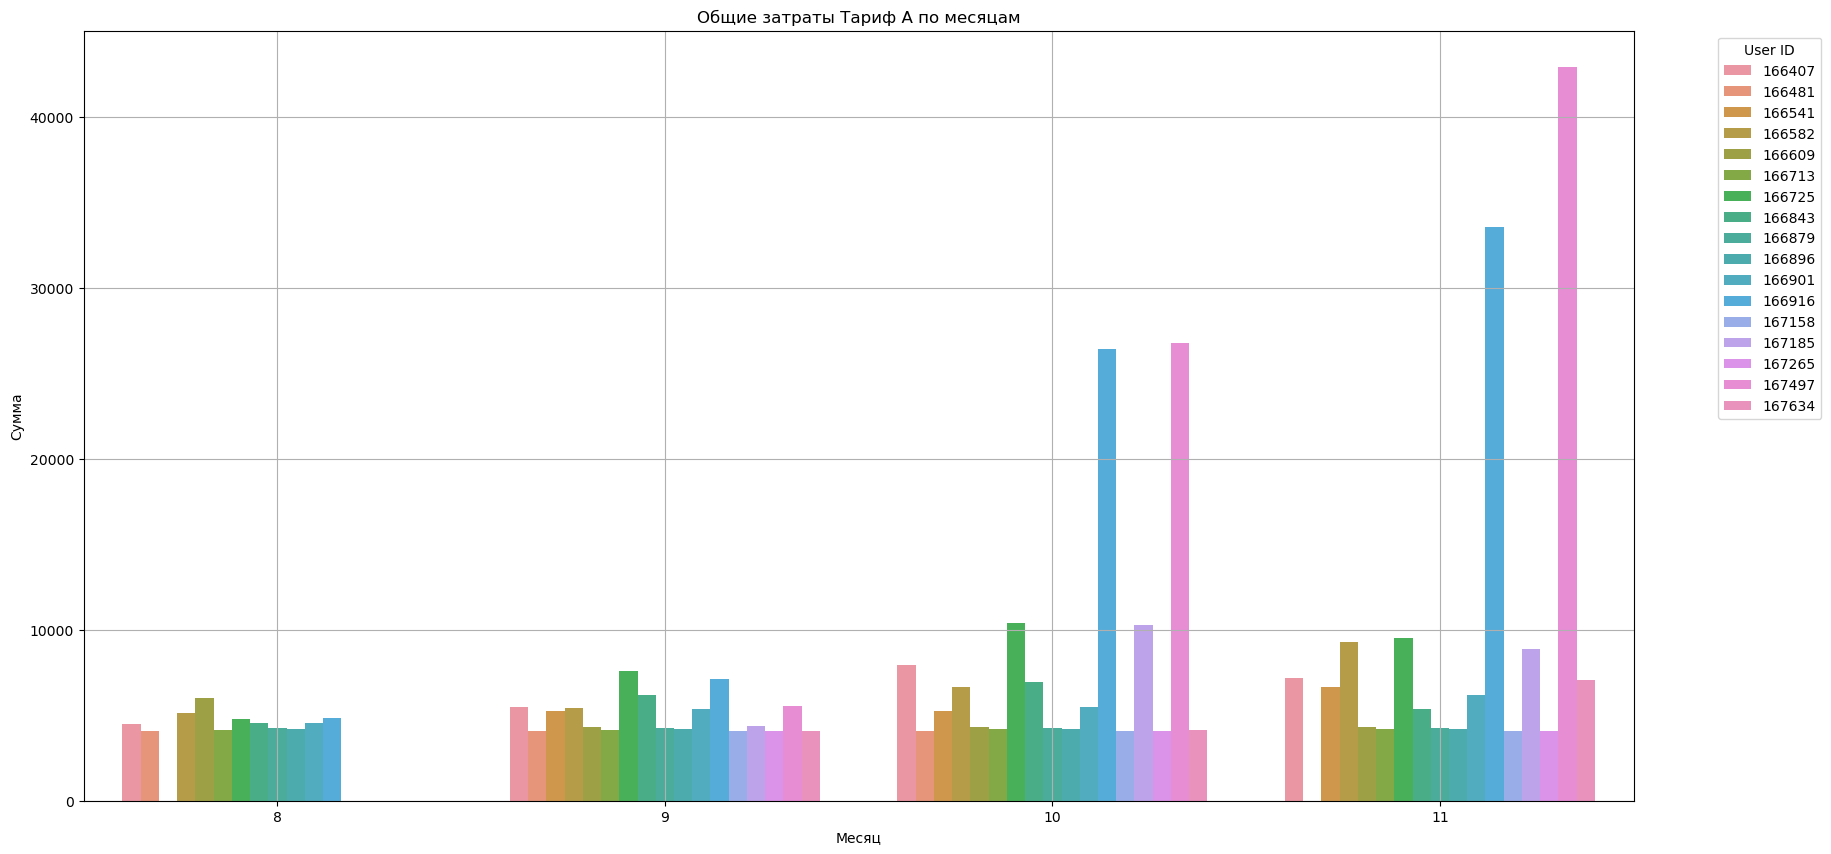

In [75]:
# Построение графиков для текущих тарифов
plot_bar_user_costs(tariff_a_data, 'Тариф A')

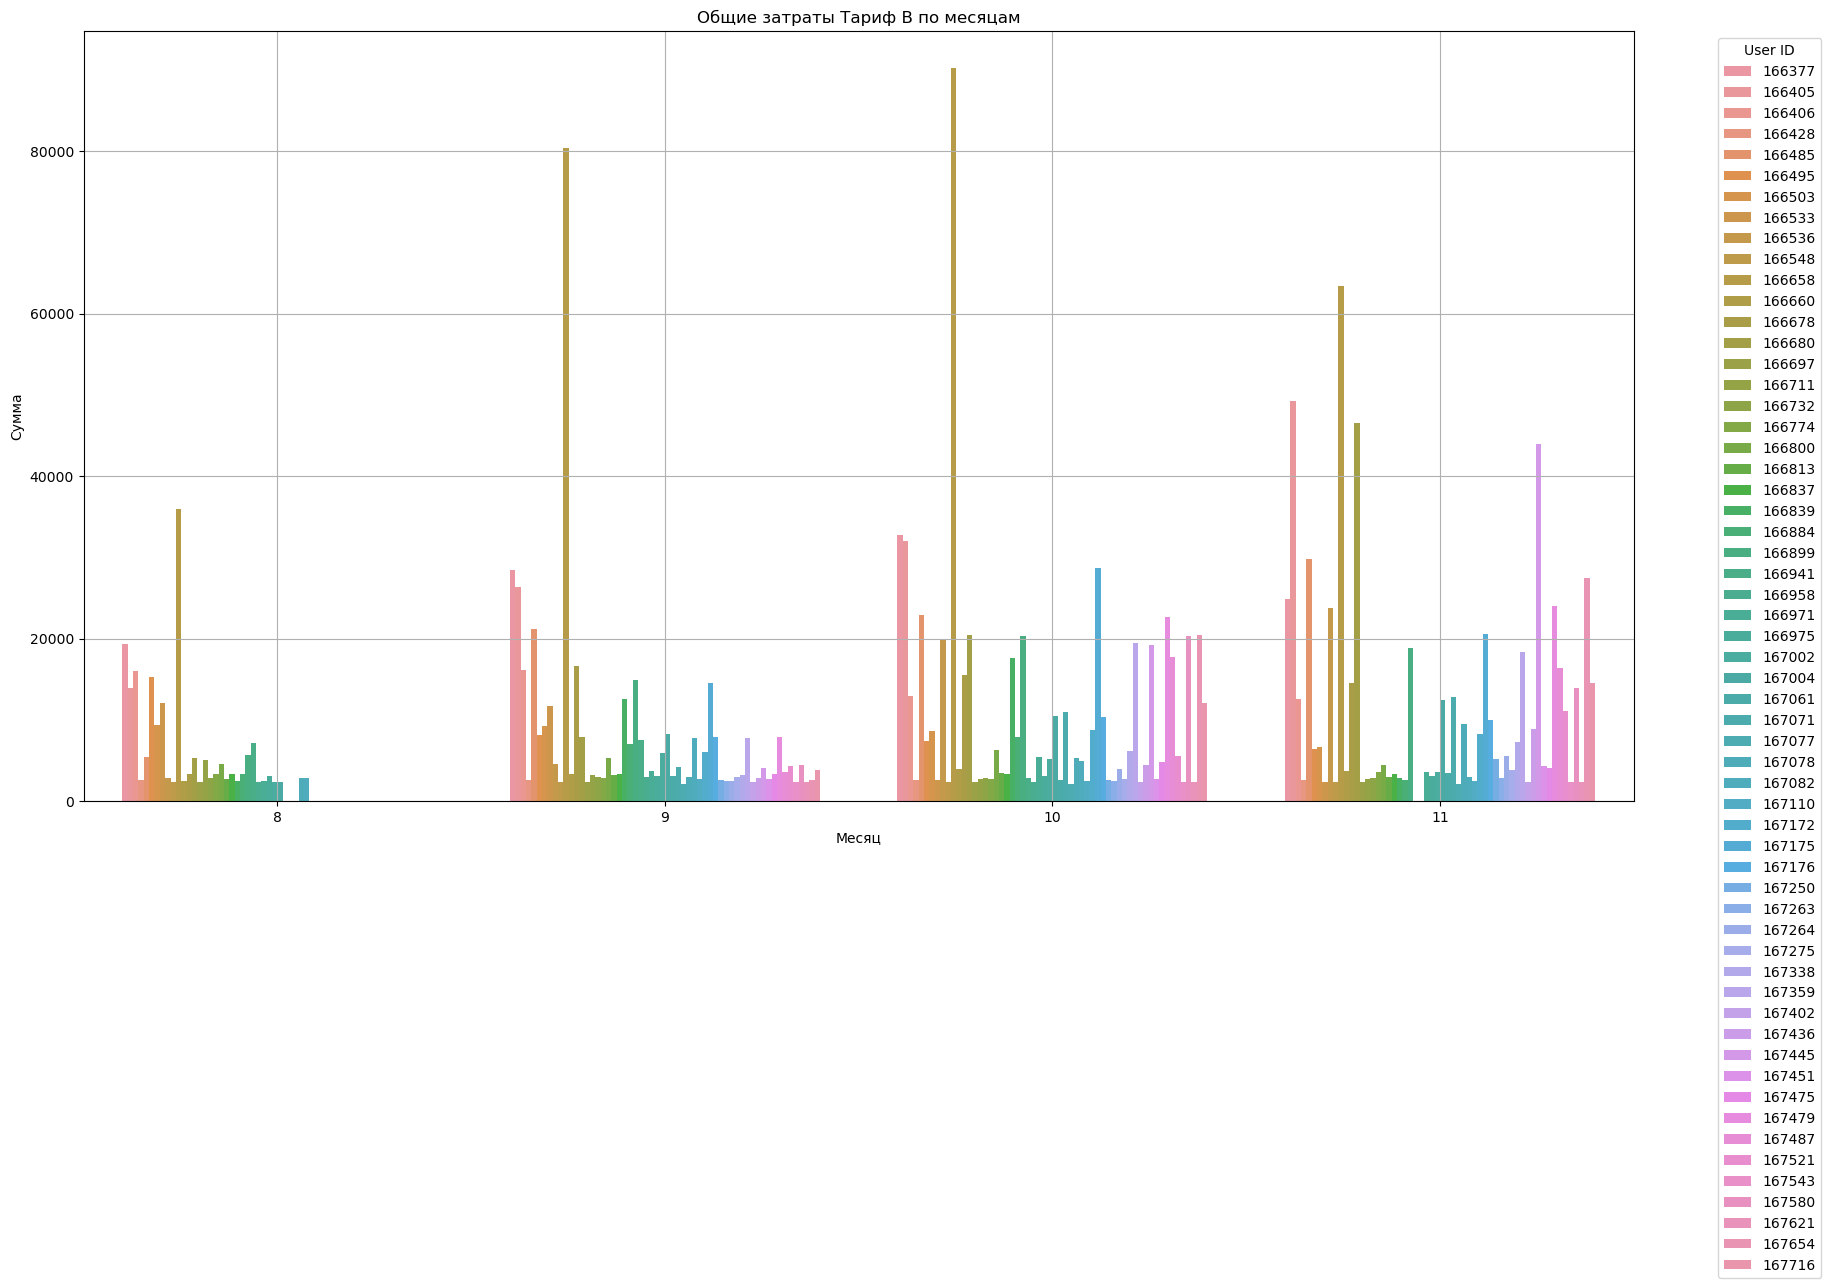

In [76]:
plot_bar_user_costs(tariff_b_data, 'Тариф B')

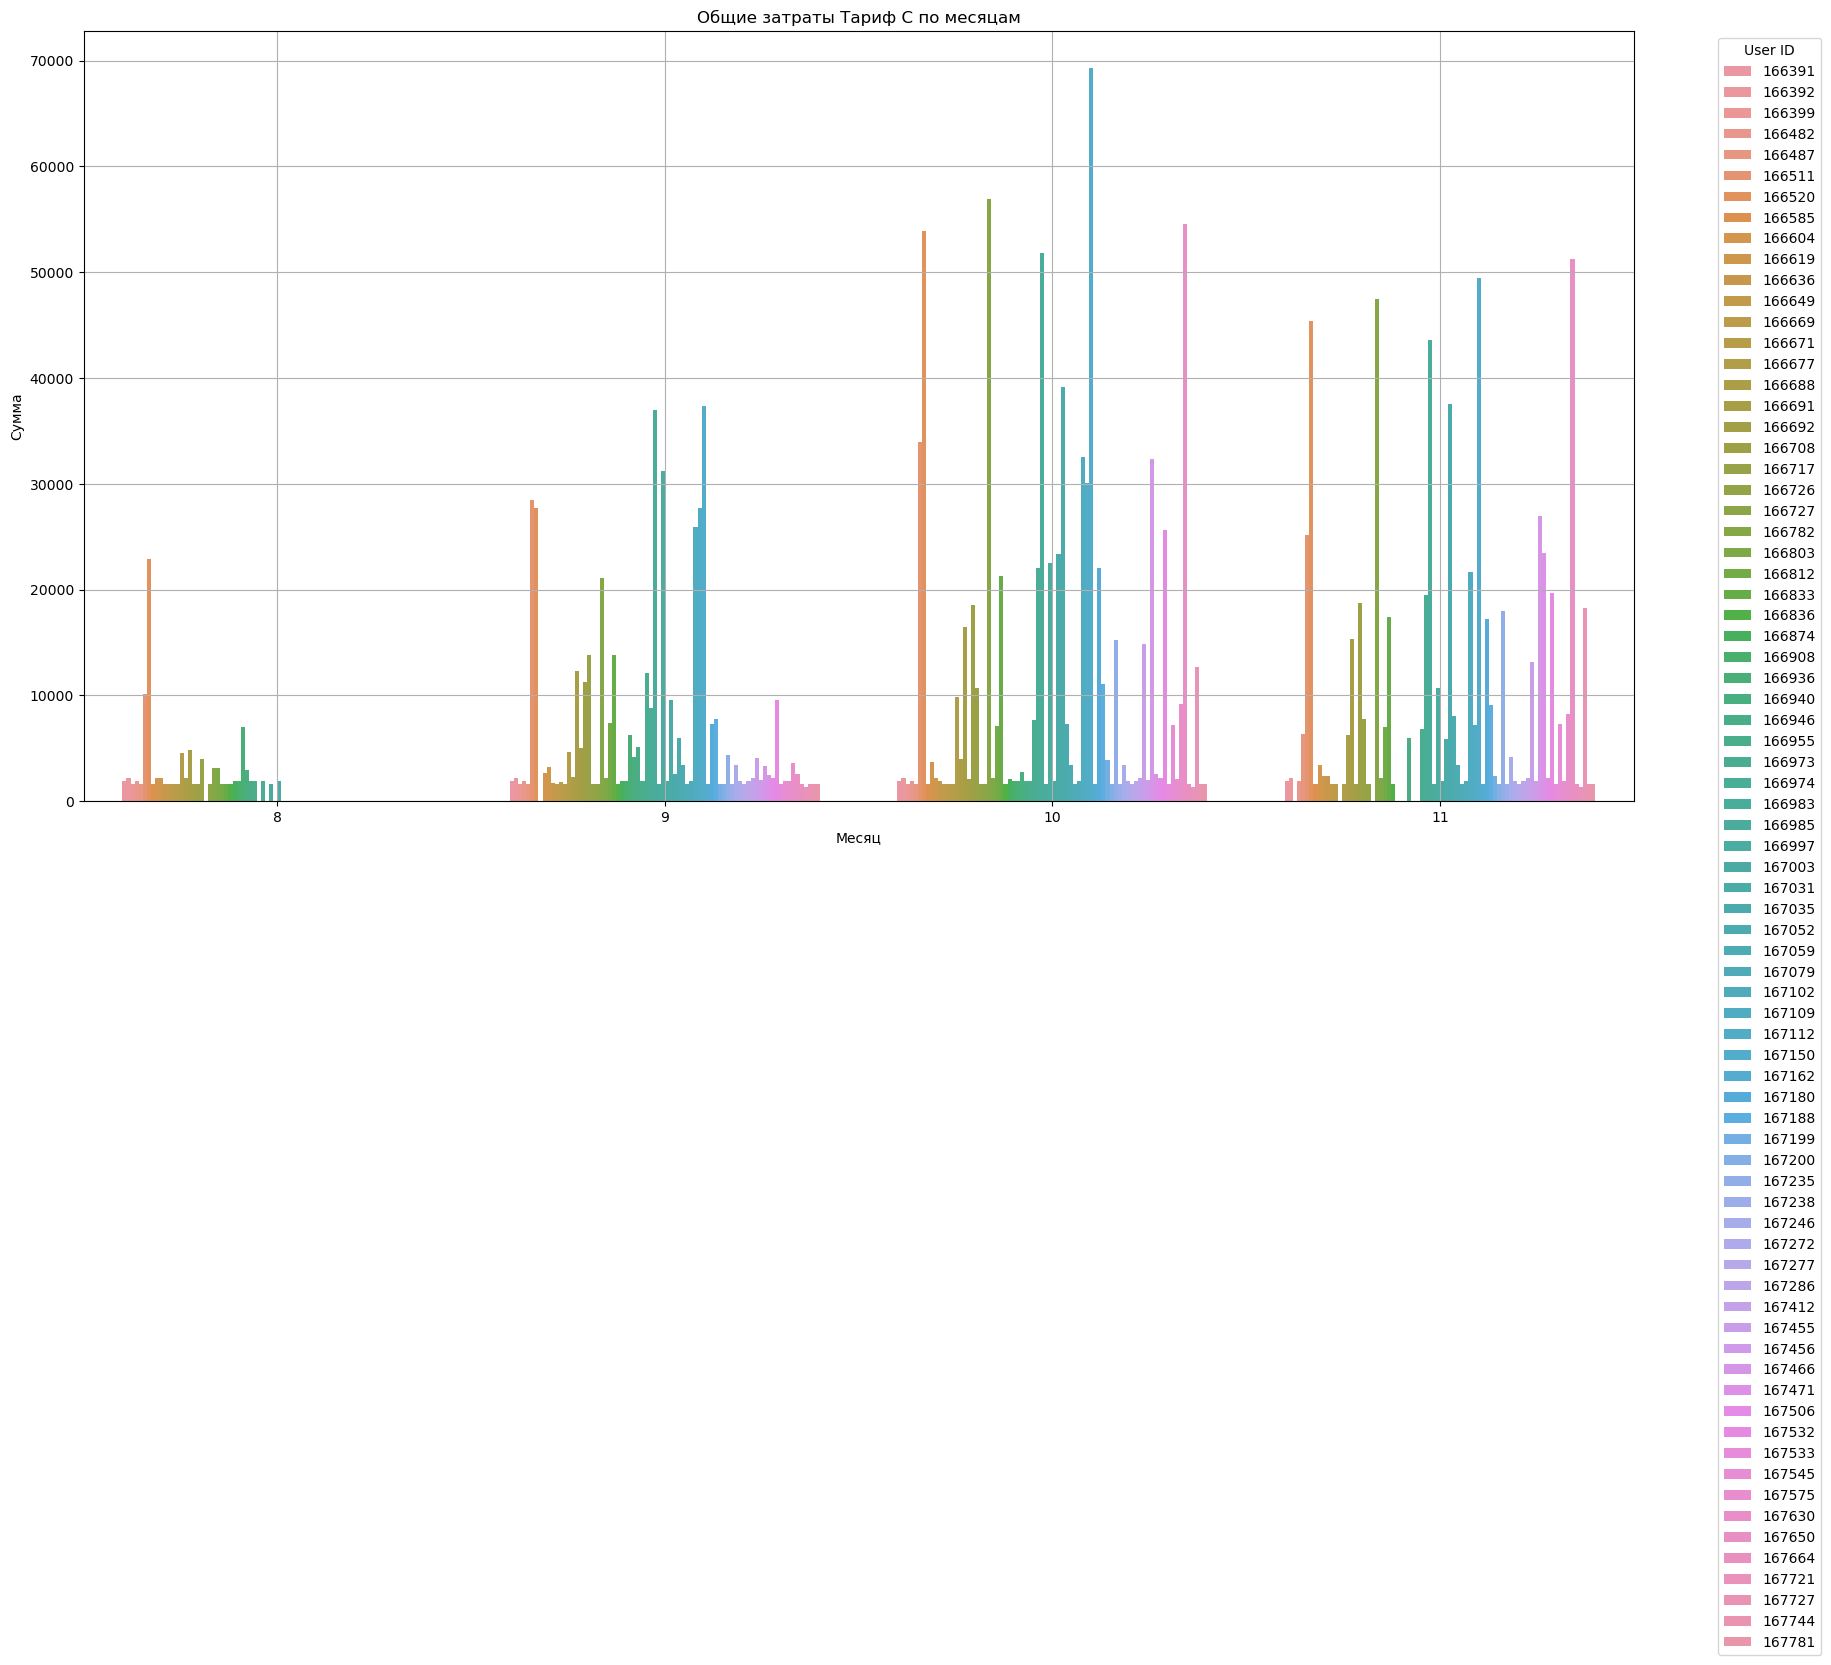

In [77]:
plot_bar_user_costs(tariff_c_data, 'Тариф C')

Анализ текущих тарифных планов показывает, что большинство пользователей предпочитают тарифы B и C, о чём свидетельствует их распределение по тарифам. Среди всех групп пользователей можно выделить те, кто значительно выделяется по величине ежемесячных расходов.

Согласно структуре тарифов, расходы можно разделить на:

   Переменные расходы – зависят от продолжительности исходящих звонков, как внутренних, так и внешних.
   
   Постоянные расходы – включают ежемесячную абонентскую плату и доплаты за обслуживание нескольких операторов.
    
Оптимальность тарифов для пользователей может быть поставлена под вопрос в следующих случаях:

1. **Высокая абонентская плата и низкий объём звонков:** Пользователи, выбравшие тариф с высокой ежемесячной платой, но совершающие минимальное количество звонков, не используют полностью включённые минуты.
2. **Частое превышение лимита включённых минут:** Пользователи, которые регулярно выходят за лимит включённых минут и, как следствие, переплачивают за дополнительное время.
3. **Высокий объём исходящих внешних звонков:** Пользователи с продолжительными внешними вызовами, для которых разница в стоимости внешних звонков на более дорогом тарифе могла бы перекрыть повышенную ежемесячную плату.

Для дальнейшего анализа целесообразно провести сравнительный анализ использованных минут относительно лимитов по каждому тарифу, в том числе учесть распределение минут для внутренних и внешних звонков.

### Анализ длительности звонков клиентов

In [78]:
# Функция для построения графиков длительности звонков
def plot_bar_calls_duration(data, tariff_name, call_type='internal'):
    # Устанавливаем тип вызовов для отображения на основе параметра `call_type`
    if call_type == 'internal':
        call_duration_col = 'internal_call_duration'
        title = f'Длительность внутренних вызовов {tariff_name} по месяцам'
    elif call_type == 'external':
        call_duration_col = 'external_call_duration'
        title = f'Длительность внешних вызовов {tariff_name} по месяцам'
    else:
        raise ValueError("call_type должен быть 'internal' или 'external'.")

    plt.figure(figsize=(20, 10))
    sns.barplot(data=data, x='month', y=call_duration_col, hue='user_id', dodge=True)
    plt.title(title)
    plt.xlabel('Месяц')
    plt.ylabel('Длительность вызовов')
    plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

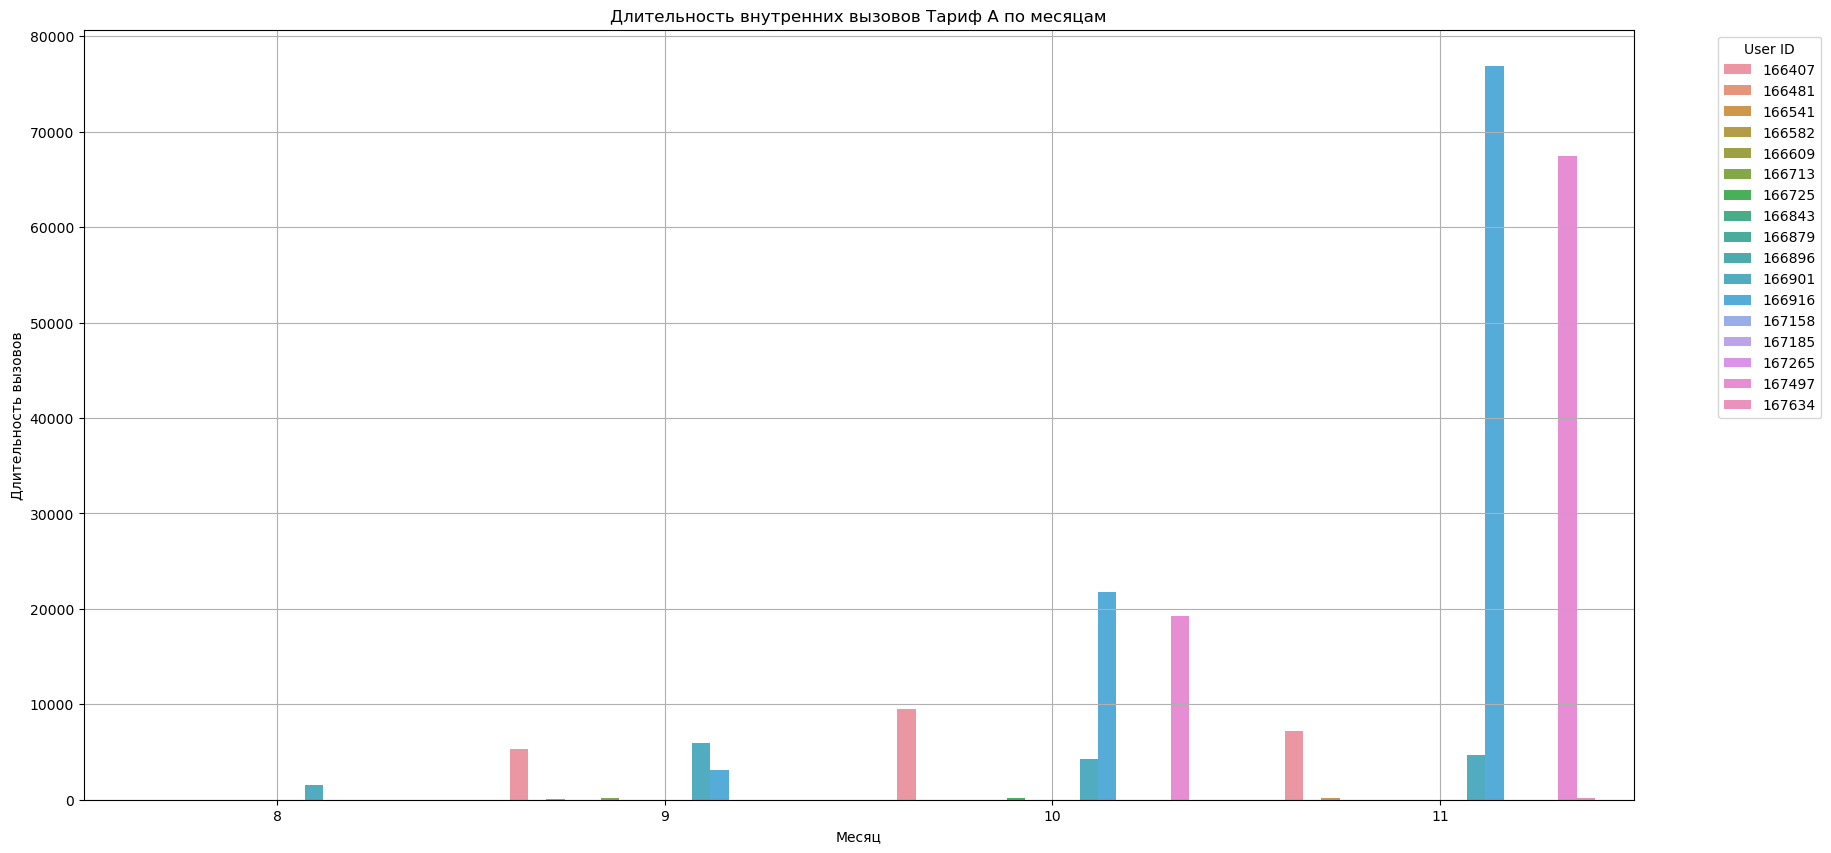

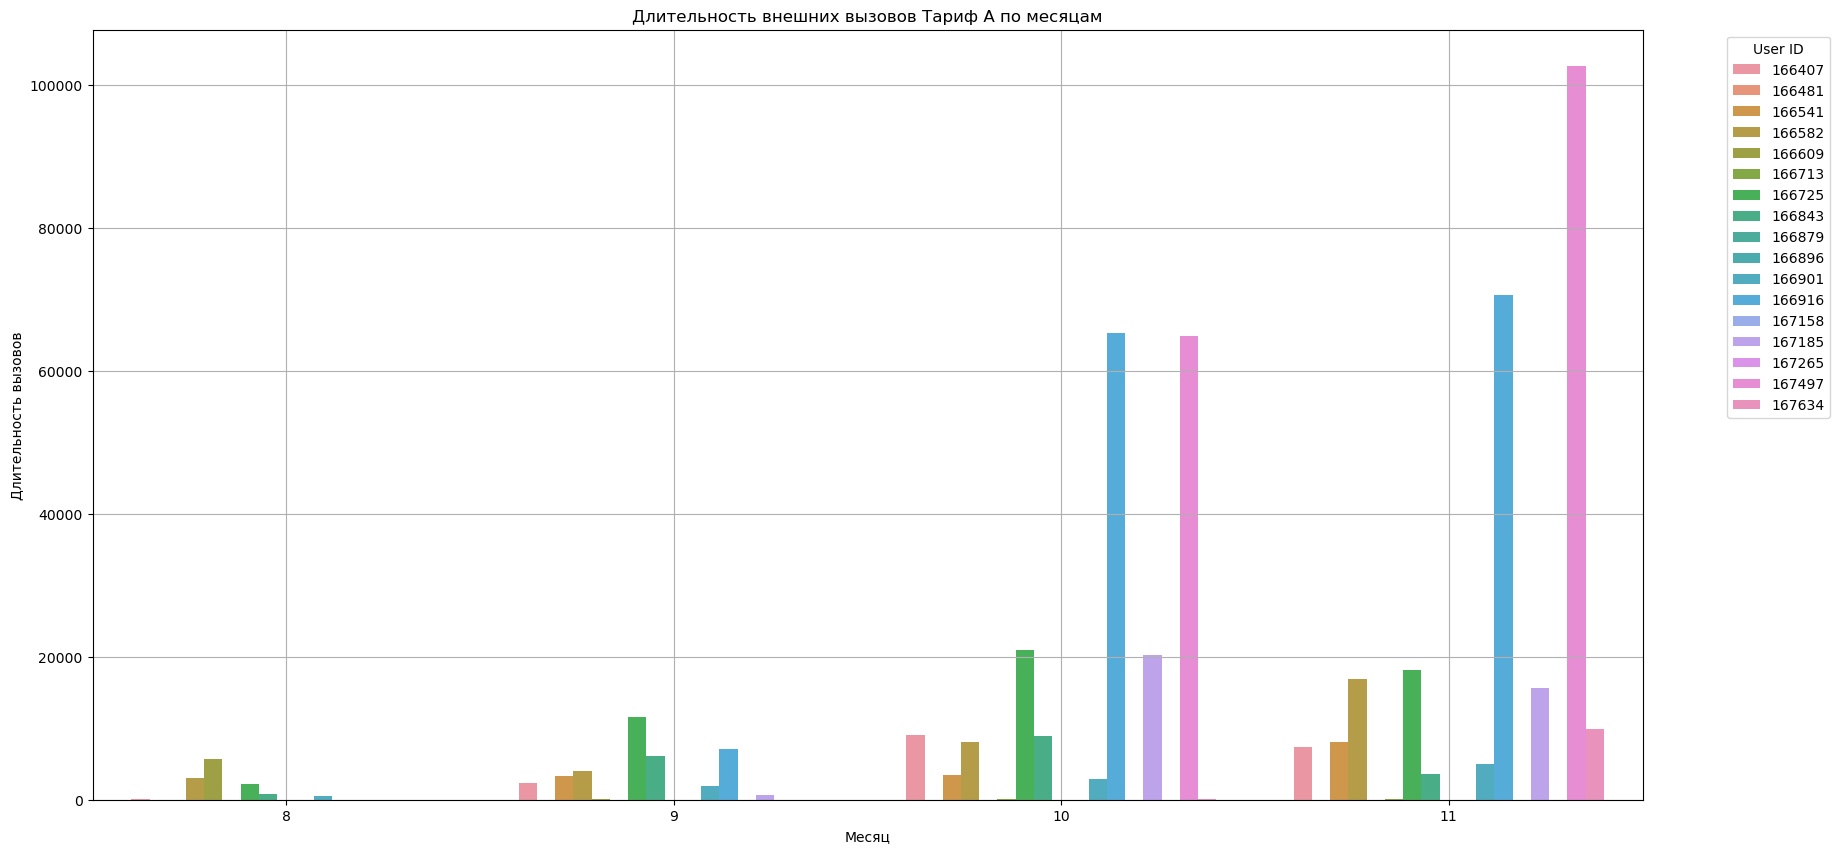

In [79]:
plot_bar_calls_duration(tariff_a_data, 'Тариф A', call_type='internal')
plot_bar_calls_duration(tariff_a_data, 'Тариф A', call_type='external')

Пользователи, такие как 167497 и 166916, в последние два месяца значительно превышают установленные лимиты внутренних звонков, а также имеют одно из самых высоких значений по количеству внешних вызовов. Эти пользователи требуют дополнительного анализа, и если в данных не выявлено ошибок агрегации, то они могут быть рассмотрены как наиболее ценные клиенты.

С другой стороны, пользователи 166541, 166582 и 166609 не достигают установленных лимитов по своему тарифу и совершают относительно небольшое количество внешних вызовов. Исходя из тарифной сетки, для таких пользователей, которые практически не используют внутренние звонки, выгодные тарифы могут быть следующими:

Тариф C: для пользователей, совершающих до 5000 минут внешних звонков.

Тариф B: для пользователей, чье количество внешних вызовов составляет от 5000 до 7500 минут.

Тариф A: для пользователей с более чем 7500 минутами внешних звонков.
    
Таким образом, для оптимизации затрат этих пользователей целесообразно рассмотреть переход на более подходящие тарифные планы.

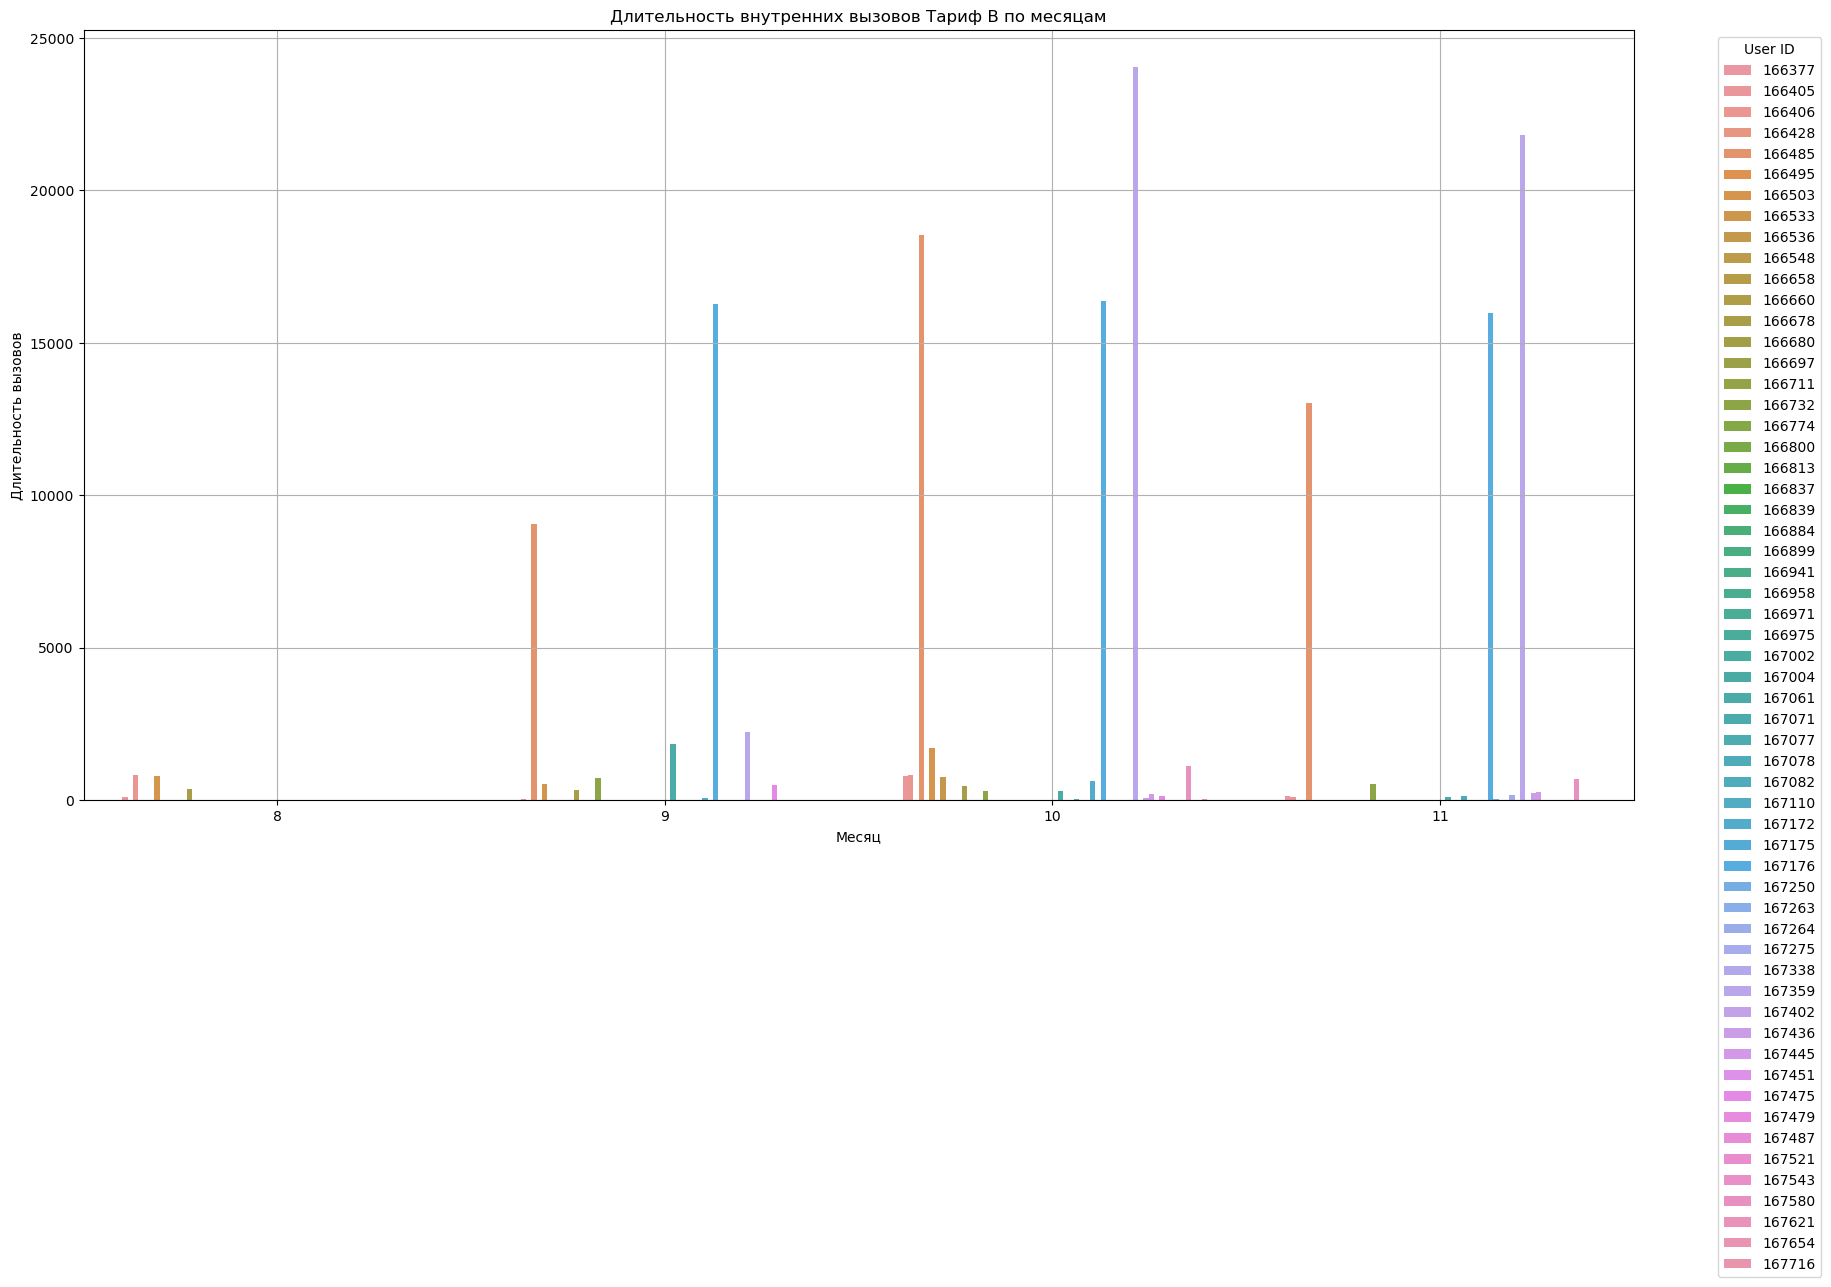

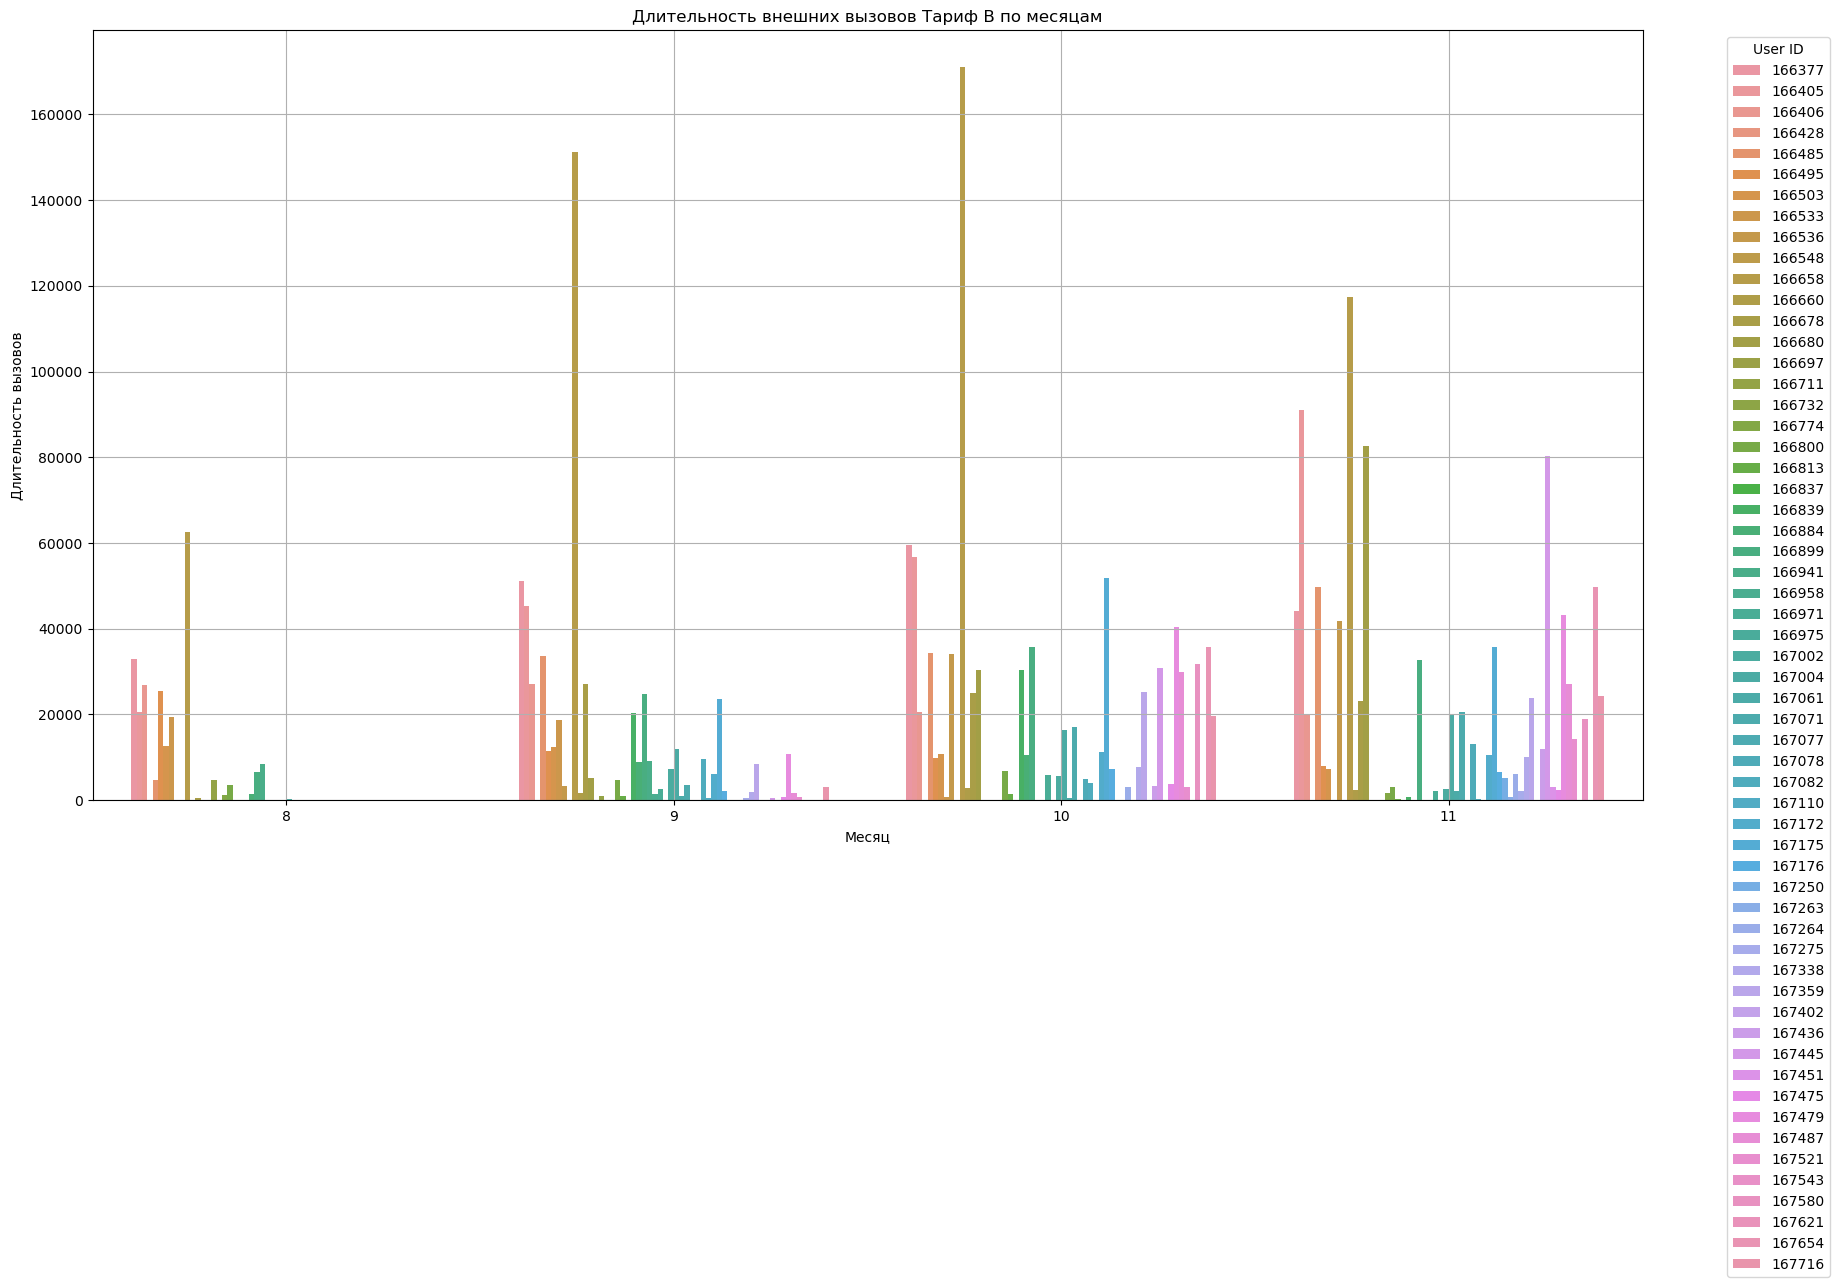

In [80]:
plot_bar_calls_duration(tariff_b_data, 'Тариф B', call_type='internal')
plot_bar_calls_duration(tariff_b_data, 'Тариф B', call_type='external')

Для пользователей тарифа B, которые часто превышают установленные лимиты по внутренним звонкам, стоит отметить, что при превышении 45500 минут переход на тариф A был бы выгодным. Однако, согласно текущим данным, таких пользователей нет.

Для перехода с тарифа B на тариф C необходимо, чтобы количество внутренних звонков составляло 7167 минут и меньше. Поскольку таких клиентов достаточно много, оптимальность тарифов для них будет определяться длительностью внешних исходящих вызовов.

Таким образом, для эффективного управления затратами и выбора наиболее выгодного тарифного плана, необходимо учитывать именно внешний трафик этих пользователей.

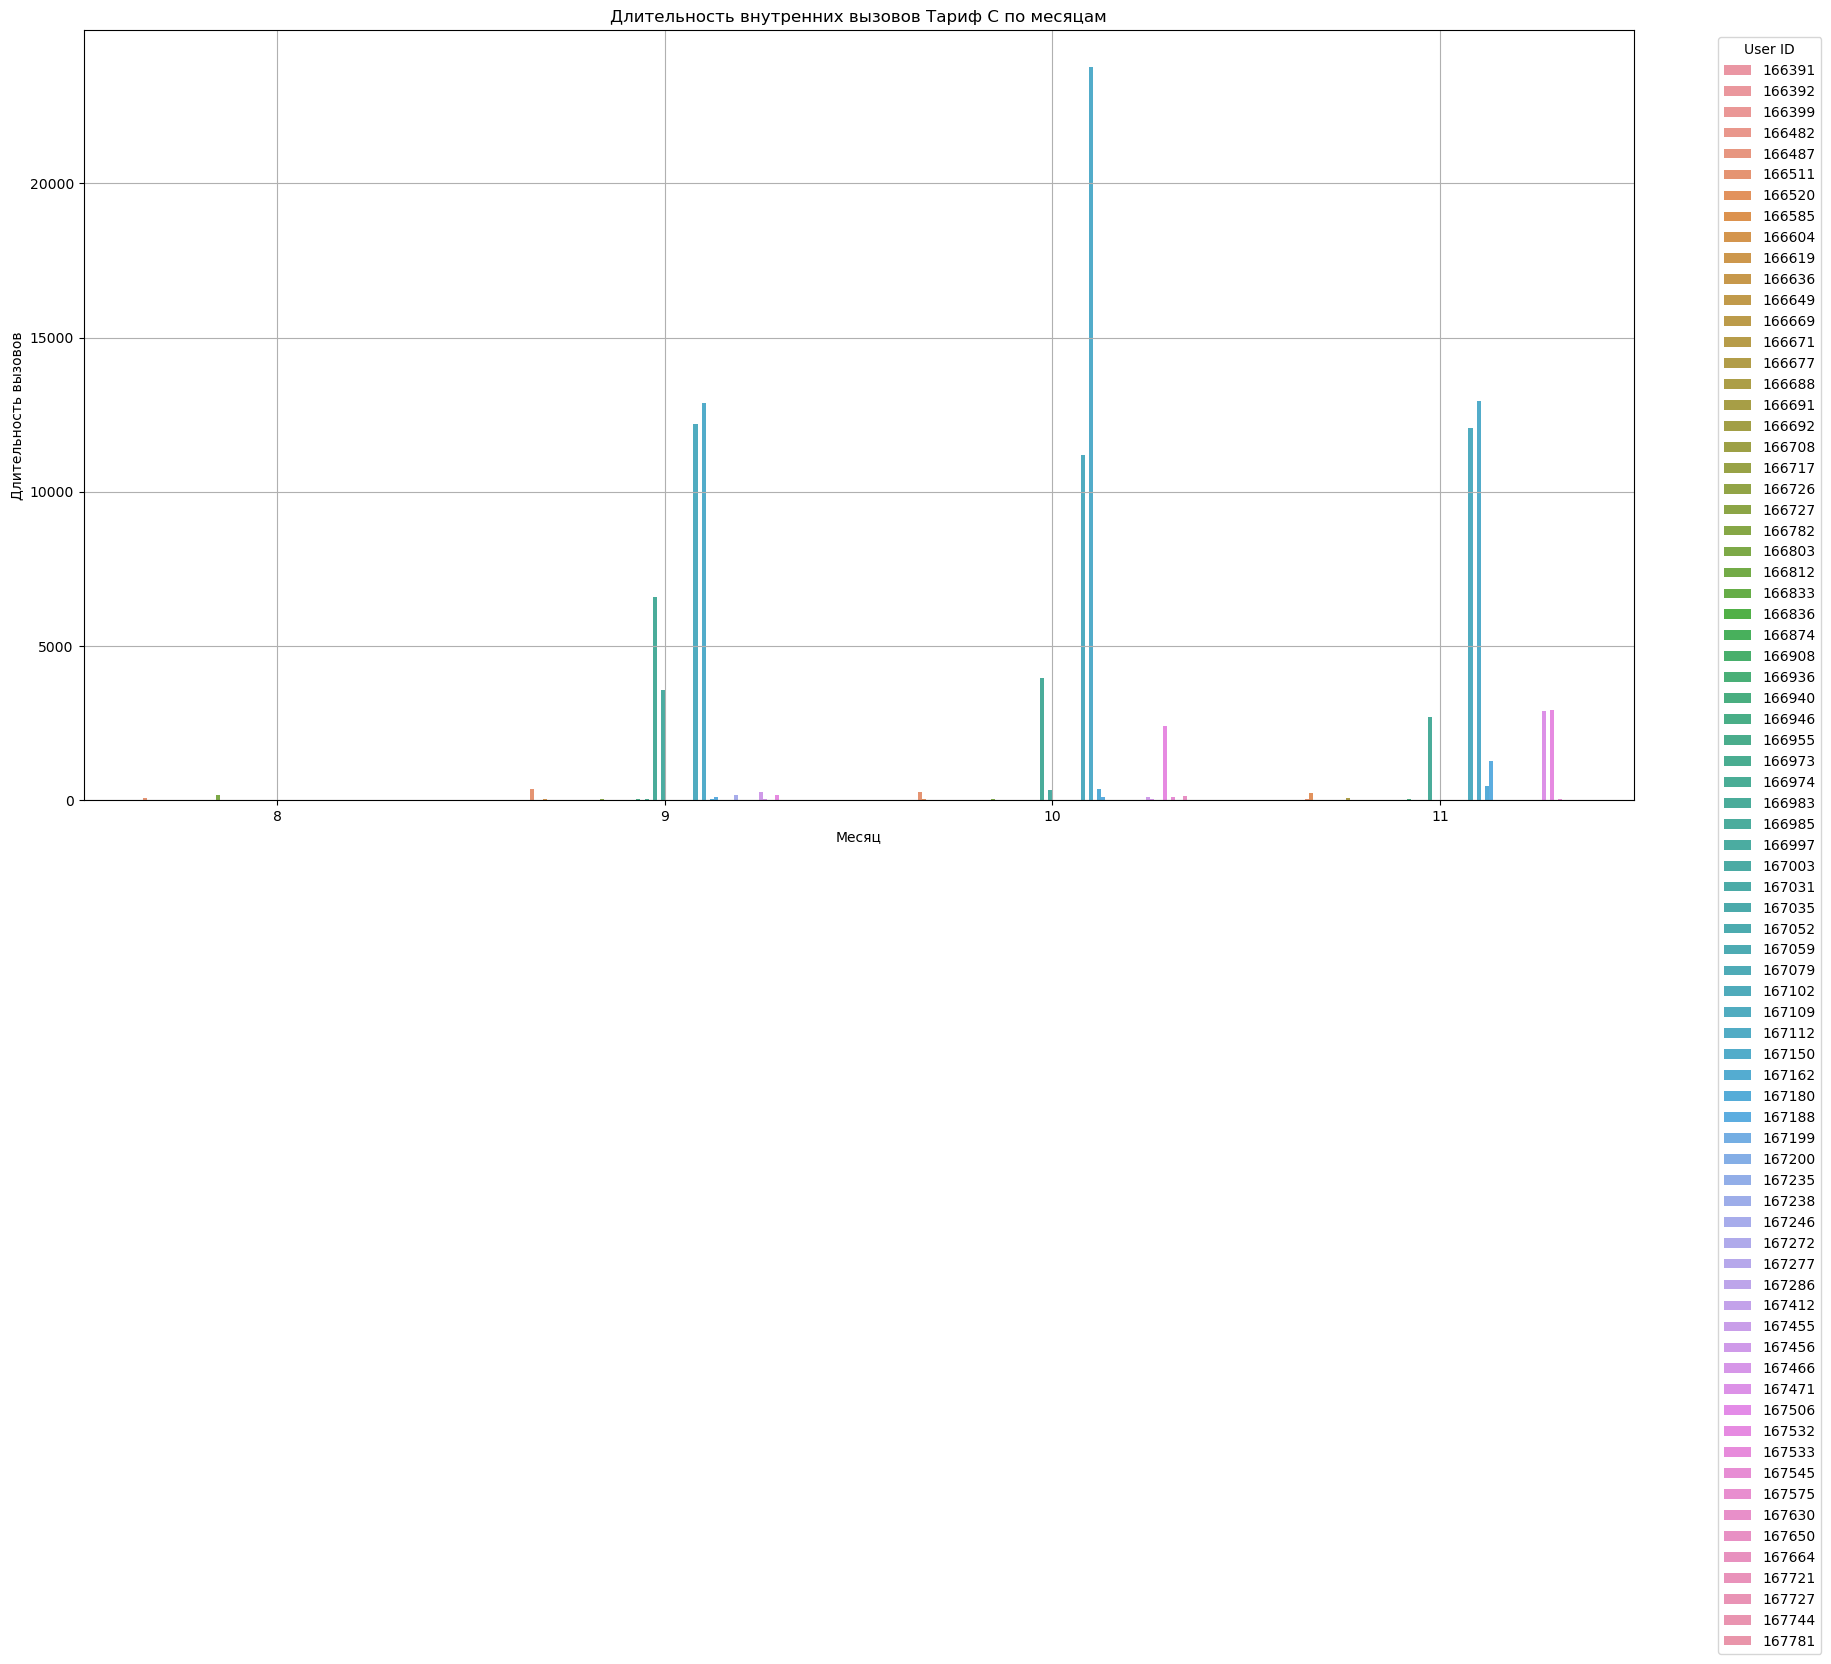

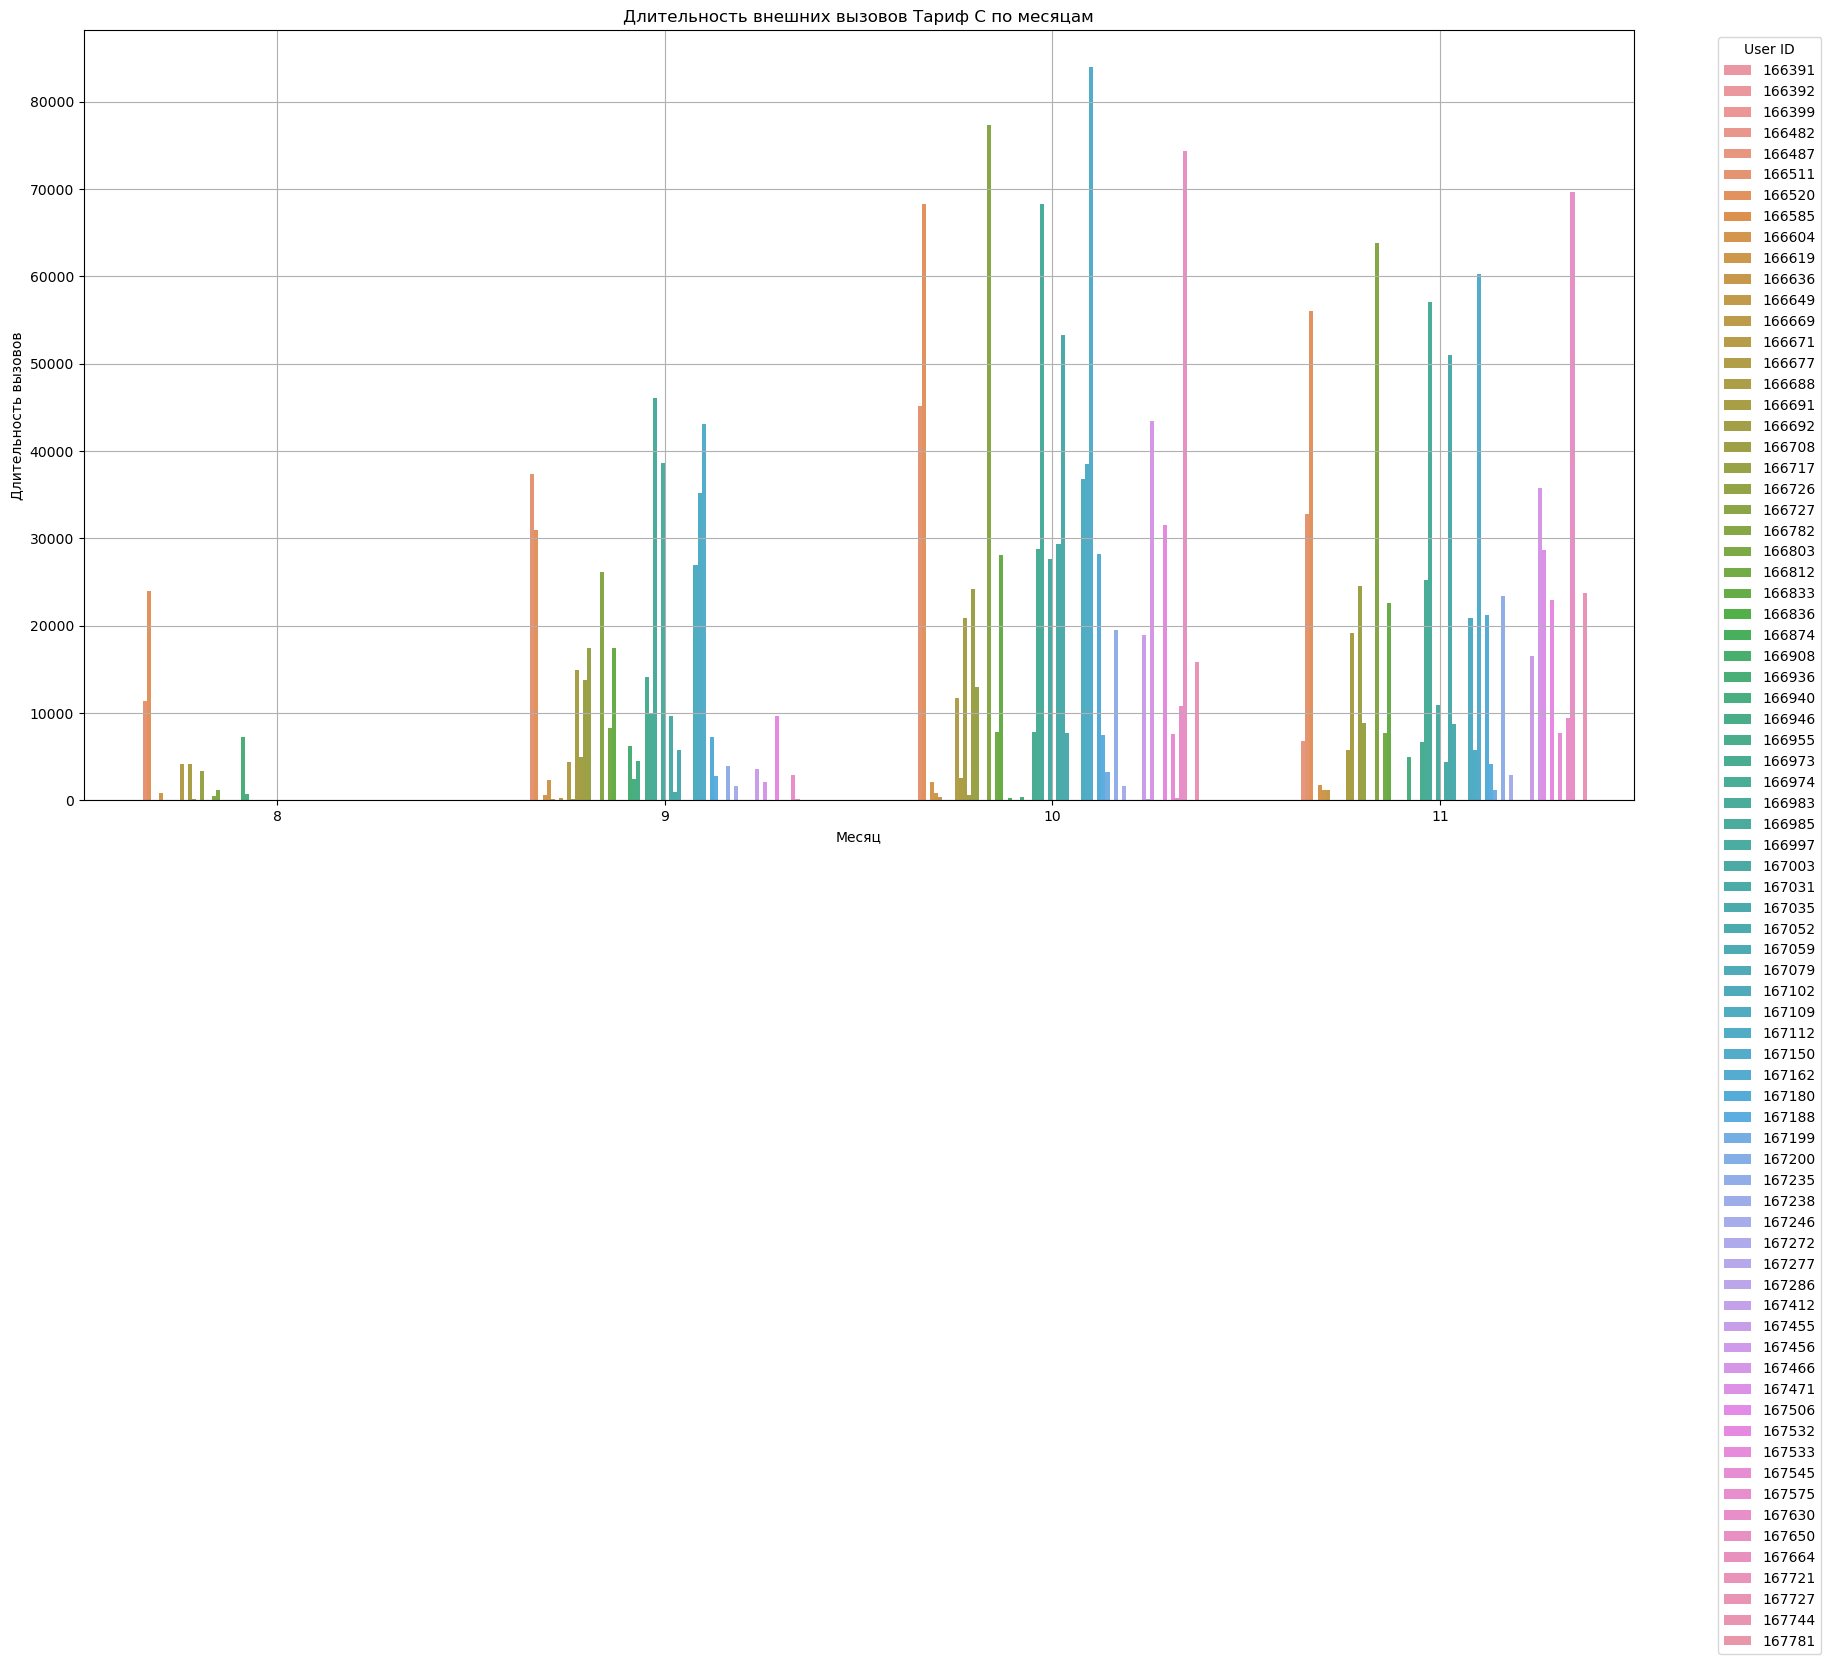

In [81]:
plot_bar_calls_duration(tariff_c_data, 'Тариф C', call_type='internal')
plot_bar_calls_duration(tariff_c_data, 'Тариф C', call_type='external')

Для пользователей тарифа C:

**По внутренним звонкам:**

При превышении 7167 минут переход на тариф B становится выгодным.
При превышении 19000 минут выгоден тариф A, однако таких пользователей всего один в октябре.

**По внешним звонкам:**

При использовании до 5000 минут тариф C остается наиболее выгодным.
При использовании от 5000 до 7500 минут выгоднее тариф B.
При использовании свыше 7500 минут рекомендуется переход на тариф A.

Большинство пользователей тарифа C практически не совершают внутренних звонков, поэтому основным источником расходов для них являются внешние вызовы.

### Перерасчет расходов для новых тарифов

In [82]:
# Функция для перерасчета нового тарифа
def recalculate_costs(row, new_tariff_plan=None):
    # Установка тарифных параметров по умолчанию (исходные значения)
    included_minutes = row['included_minutes']
    overage_cost_per_minute = row['overage_cost_per_minute']
    external_call_cost_per_minute = row['external_call_cost_per_minute']
    tariff_costs = row['tariff_costs']
    operator_costs = row['operator_costs']
    
    # Исходные расчеты
    if row['internal_call_duration'] <= included_minutes:
        internal_costs = 0
    else:
        internal_costs = (row['internal_call_duration'] - included_minutes) * overage_cost_per_minute
    external_costs = row['external_call_duration'] * external_call_cost_per_minute
    operator_surcharge = row['unique_operators'] * operator_costs
    total_costs_original = tariff_costs + operator_surcharge + external_costs + internal_costs

    # Параметры для нового тарифного плана, если он задан
    if new_tariff_plan == 'A':
        included_minutes = 2000
        overage_cost_per_minute = 0.1
        external_call_cost_per_minute = 0.3
        tariff_costs = 4000
        operator_costs = 50
    elif new_tariff_plan == 'B':
        included_minutes = 500
        overage_cost_per_minute = 0.15
        external_call_cost_per_minute = 0.5
        tariff_costs = 2000
        operator_costs = 150
    elif new_tariff_plan == 'C':
        included_minutes = 0
        overage_cost_per_minute = 0.3
        external_call_cost_per_minute = 0.7
        tariff_costs = 1000
        operator_costs = 300
    
    # Перерасчёт по новому тарифу
    if row['internal_call_duration'] <= included_minutes:
        internal_costs_new = 0
    else:
        internal_costs_new = (row['internal_call_duration'] - included_minutes) * overage_cost_per_minute
    external_costs_new = row['external_call_duration'] * external_call_cost_per_minute
    operator_surcharge_new = row['unique_operators'] * operator_costs
    total_costs_new_plan = tariff_costs + operator_surcharge_new + external_costs_new + internal_costs_new
    
    # Возвращаем обе стоимости: исходную и по новому тарифу
    return pd.Series([total_costs_original, total_costs_new_plan])

In [83]:
# Функция вывода сравнительных графиков
def compare_tariffs(dataset, tarif_old, tarif_new):
    # Установка размера графика
    plt.figure(figsize=(20, 10))

    # Строим столбчатый график для текущих расходов
    sns.barplot(data=dataset, x='month', y='difference', hue='user_id', dodge=True)

    plt.title(f'Разница в расходах при смене тарифа {tarif_old} на тариф {tarif_new}')
    plt.xlabel('Месяц')
    plt.ylabel('Положительная разница, руб')
    plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [84]:
# Функция для сравнения расходов пользователей и вывода графика
def compare_tariff_costs(dataset, tariff_old, tariff_new):
    # Расчет новых тарифных условий
    dataset[['total_costs_original', 'total_costs_new_plan']] = dataset.apply(
        recalculate_costs, axis=1, new_tariff_plan=tariff_new
    )
    # Расчет разницы
    dataset['difference'] = dataset['total_costs_original'] - dataset['total_costs_new_plan']
     
    # Фильтрация только положительных значений
    positive_data = dataset[dataset['difference'] > 0]
       
    # Проверка, есть ли данные для построения графика
    if not positive_data.empty:
        # График разницы расходов
        compare_tariffs(positive_data, tariff_old, tariff_new)
    else:
        print("Нет пользователей для которых была бы выгодна такая смена тарифа")

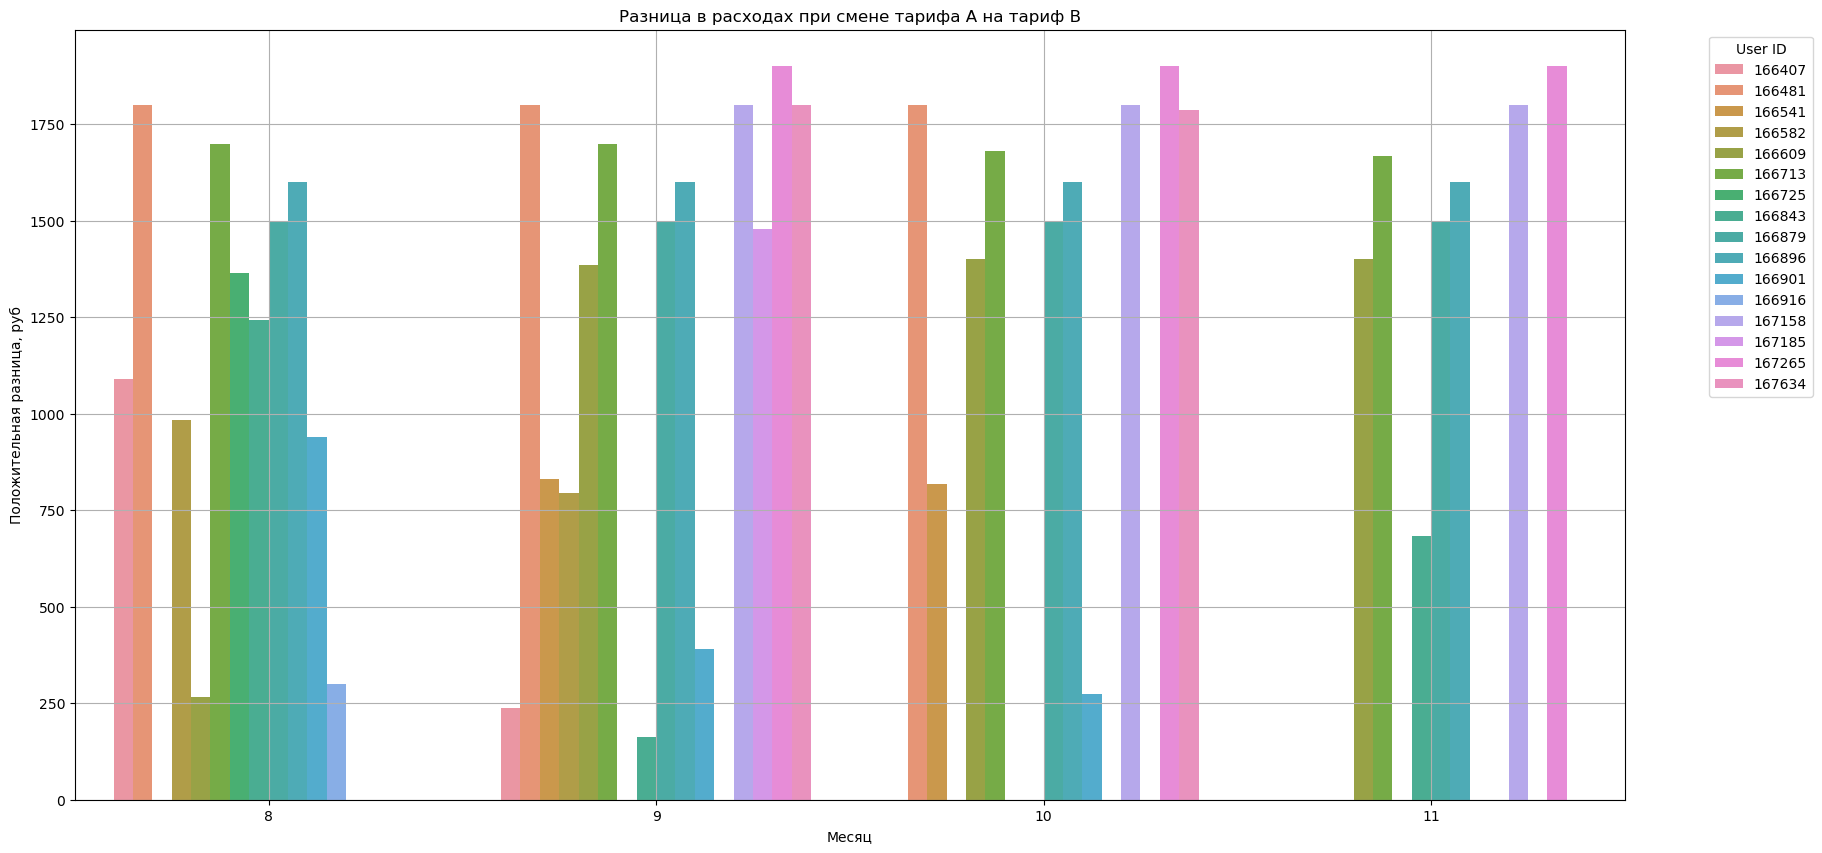

In [85]:
# Перерасчет стоимости пользователей при смене тарифа А на тариф В
compare_tariff_costs(tariff_a_data, 'A', 'B')

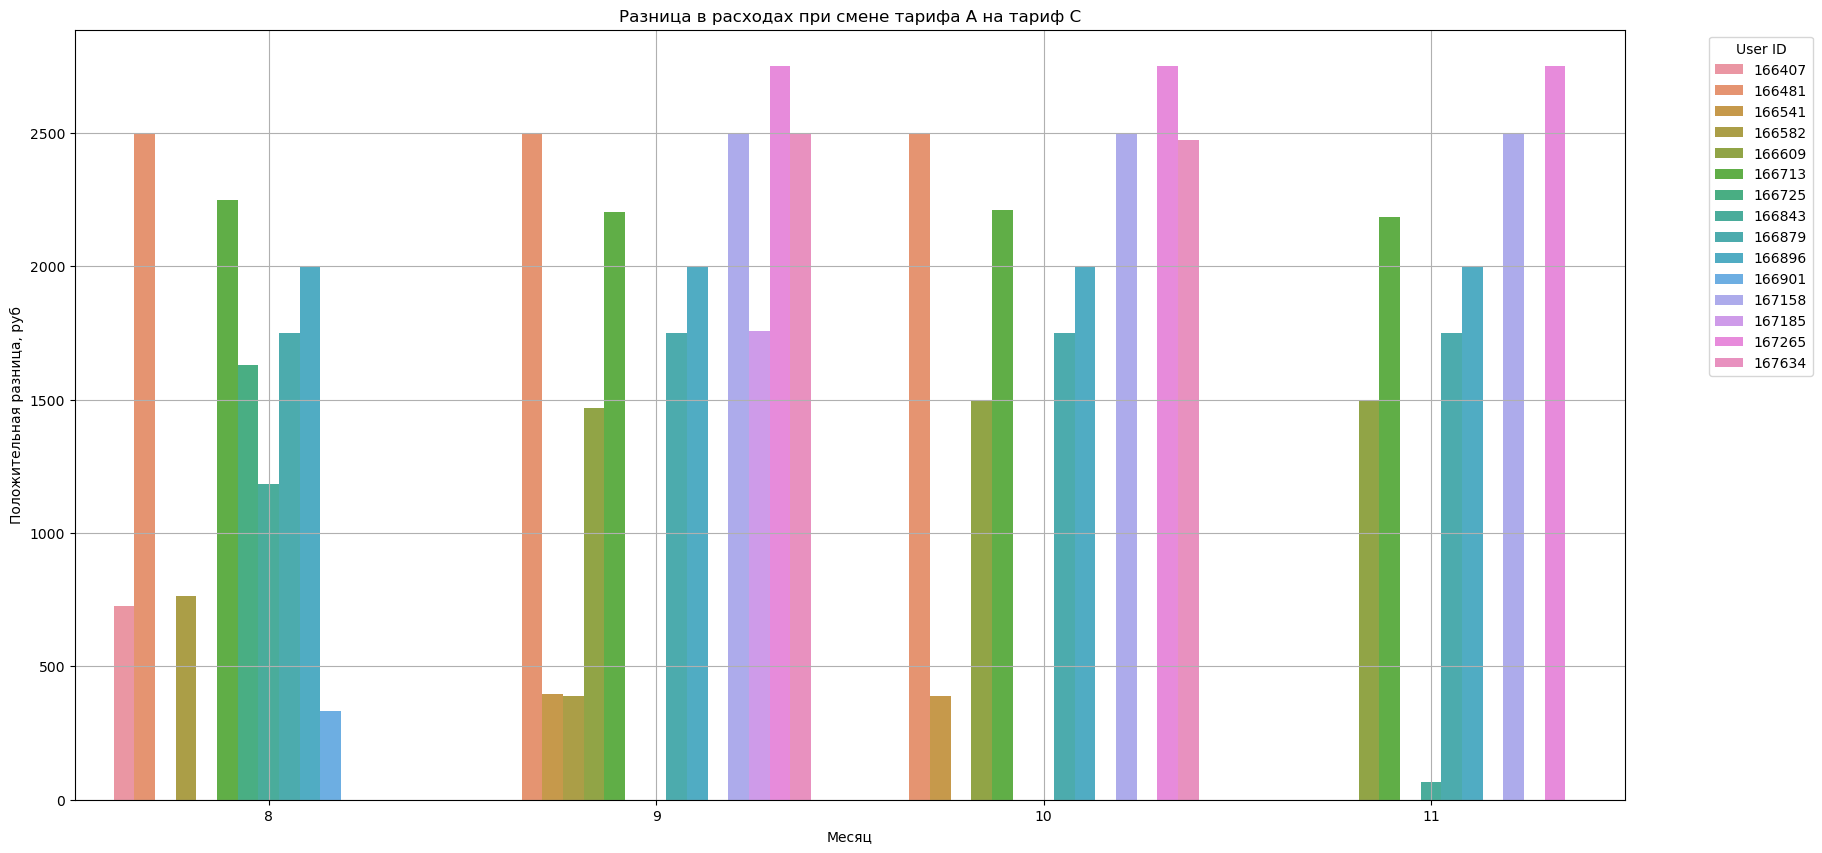

In [86]:
# Перерасчет стоимости пользователей при смене тарифа А на тариф C
compare_tariff_costs(tariff_a_data, 'A', 'C')

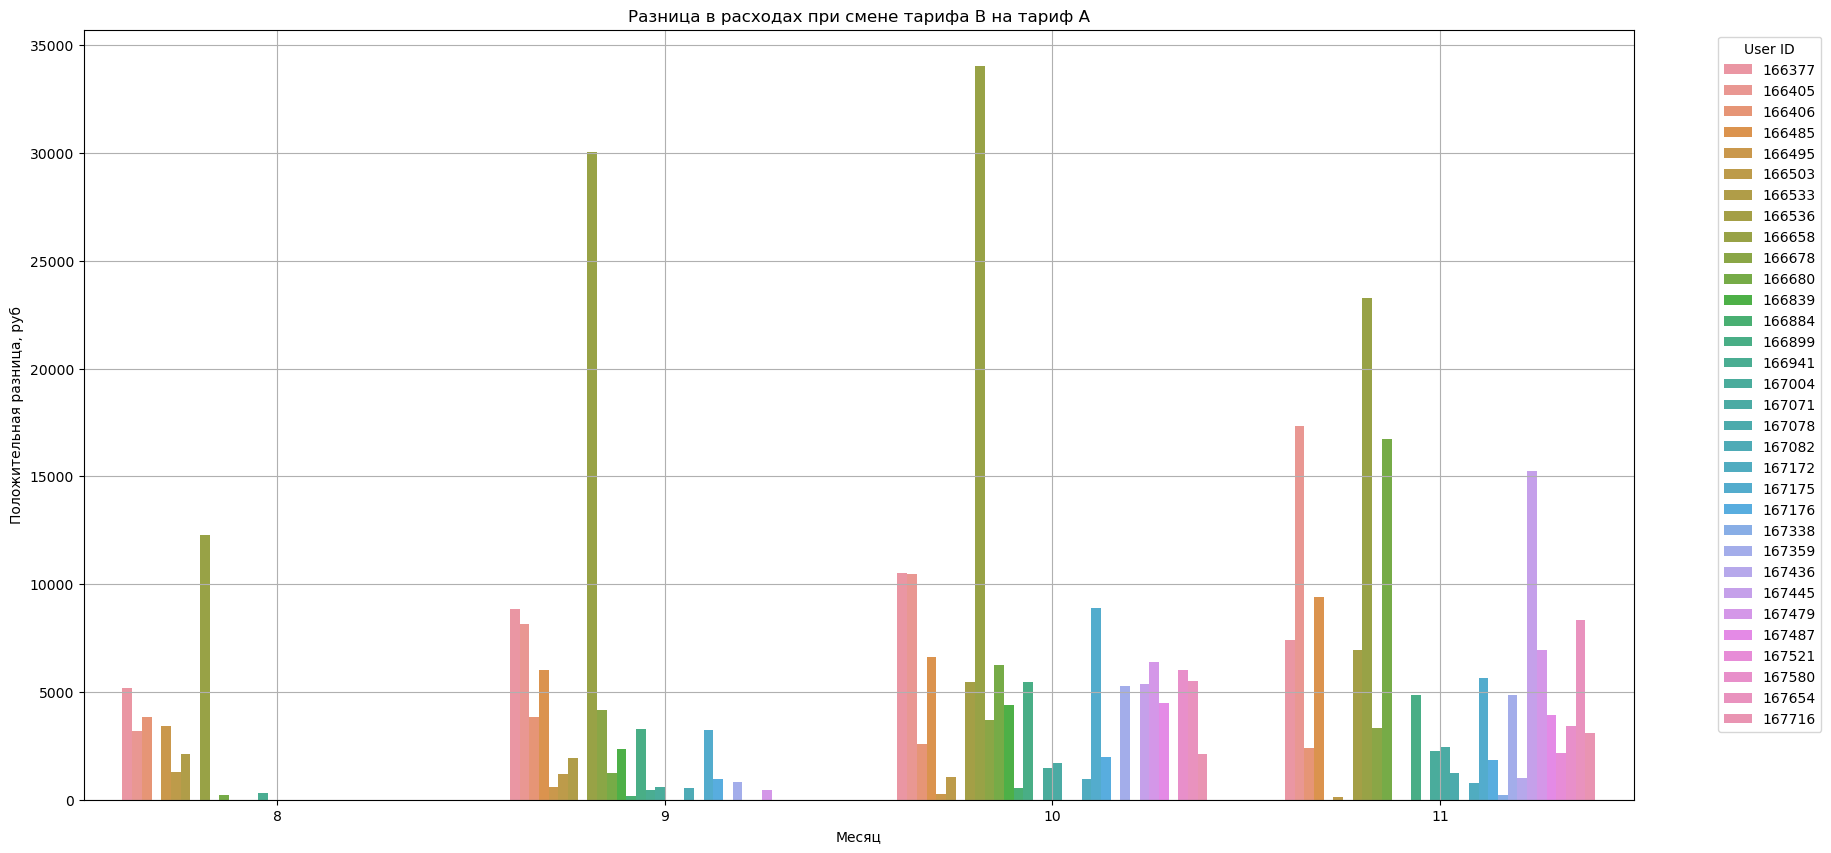

In [87]:
# Перерасчет стоимости пользователей при смене тарифа B на тариф A
compare_tariff_costs(tariff_b_data, 'B', 'A')

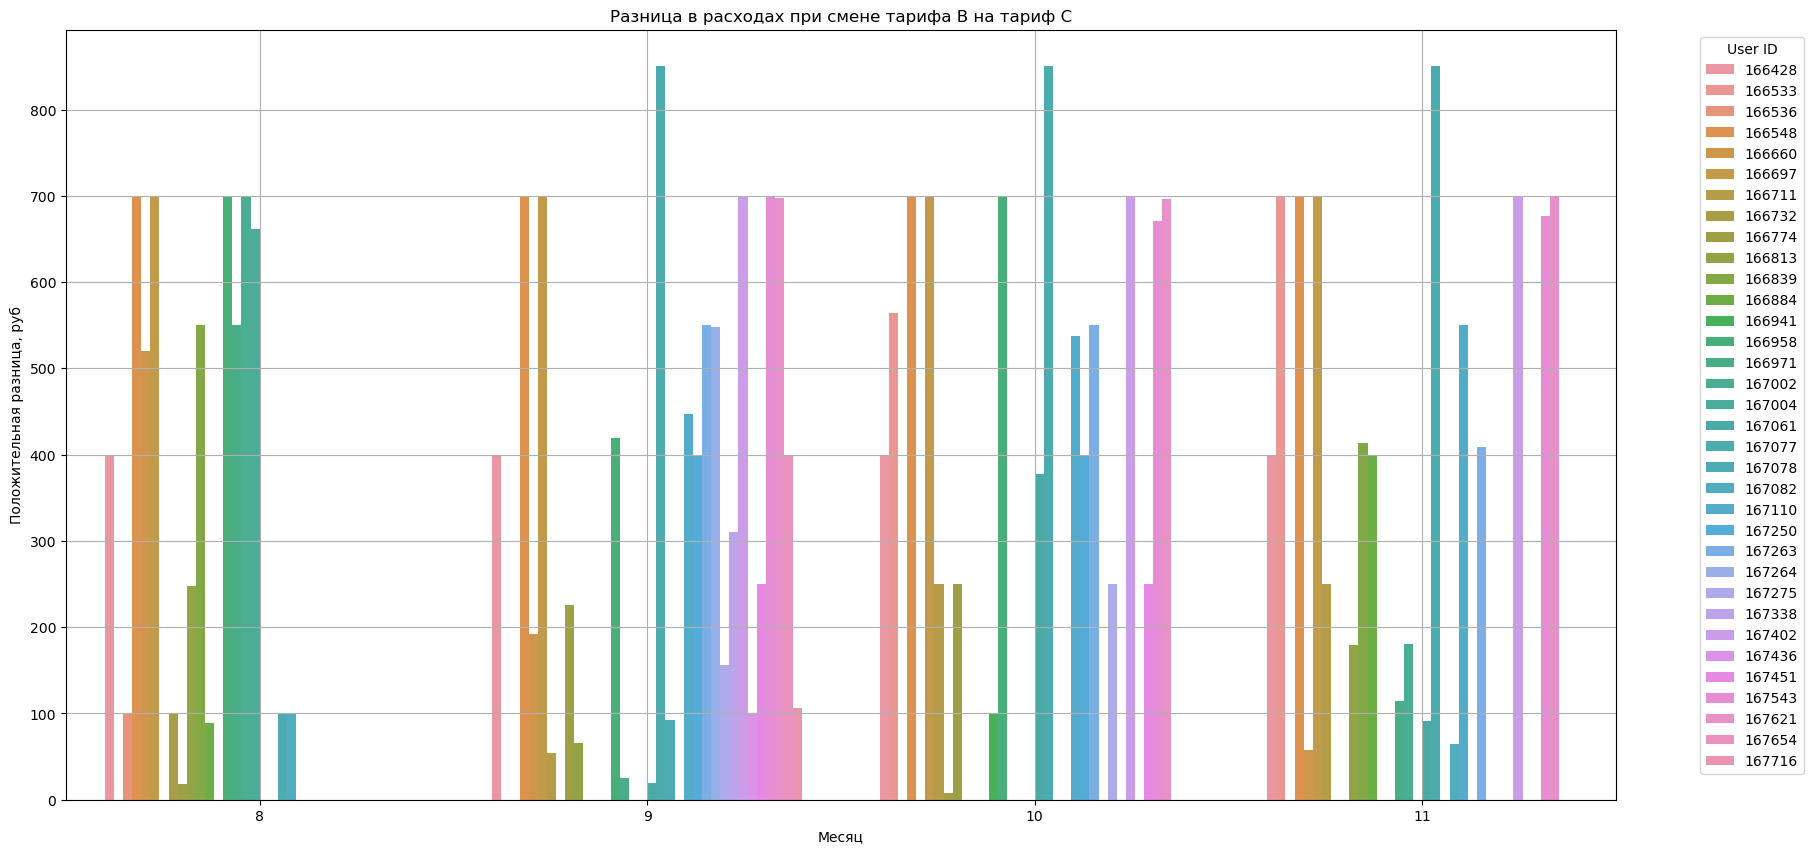

In [88]:
# Перерасчет стоимости пользователей при смене тарифа B на тариф C
compare_tariff_costs(tariff_b_data, 'B', 'C')

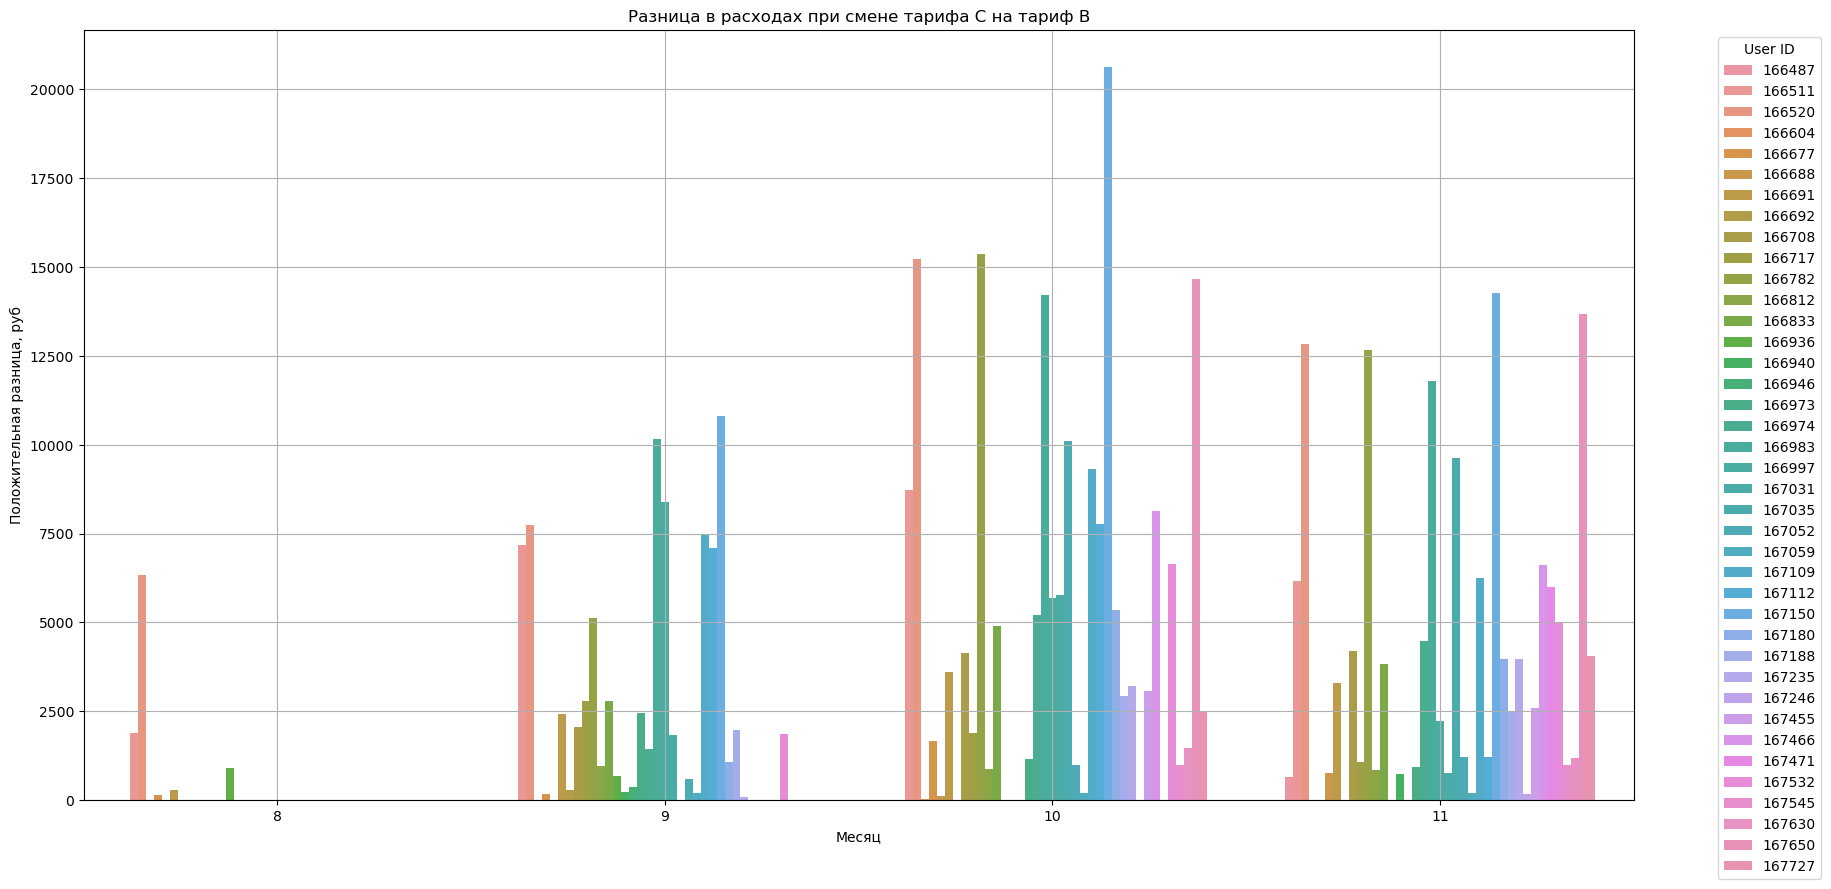

In [89]:
# Перерасчет стоимости пользователей при смене тарифа С на тариф B
compare_tariff_costs(tariff_c_data, 'C', 'B')

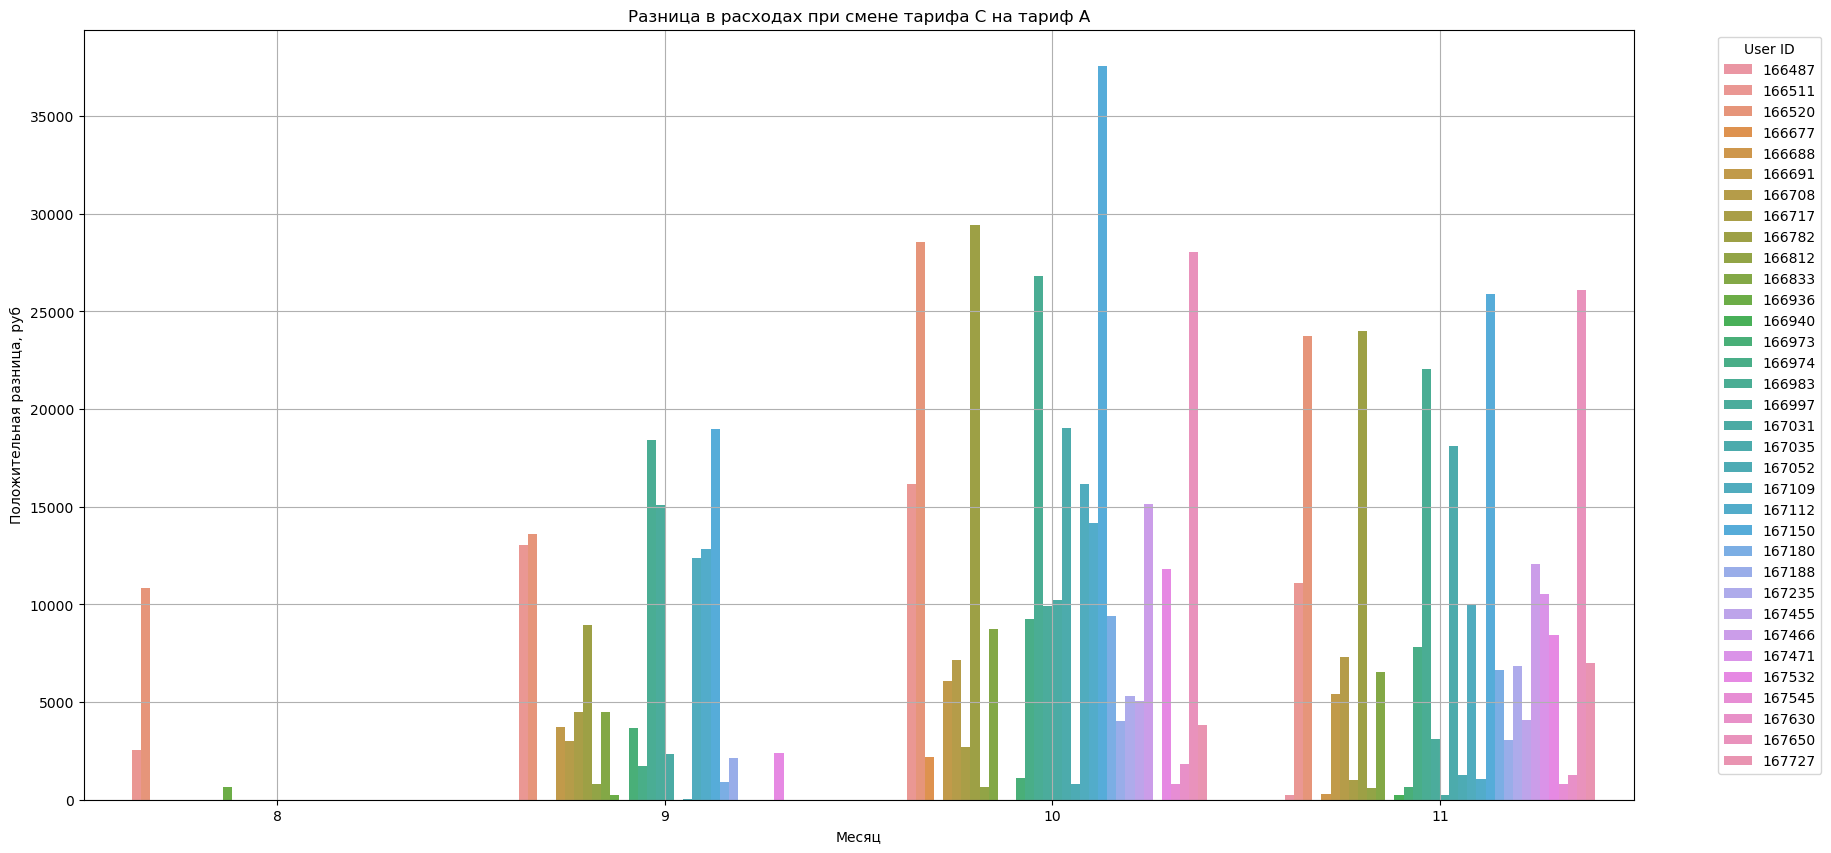

In [90]:
# Перерасчет стоимости пользователей при смене тарифа С на тариф A
compare_tariff_costs(tariff_c_data, 'C', 'A')

При предложении смены тарифов клиентам, можно использовать сегментацию клиентов, основываясь на выгоде, которую они могут получить. 

   1. Высокая выгода: Клиенты, у которых выгода от смены тарифа составляет тысячи или десятки тысяч рублей, могут быть отнесены к категории "приоритетных клиентов". Для них следует предложить более привлекательные тарифы с акцентом на значительную экономию.

   2. Низкая выгода: Клиенты, у которых выгода составляет от 250 до 500 рублей, могут быть менее чувствительны к изменениям. Для них можно предложить стандартные предложения с акцентом на дополнительные преимущества. Например, если клиент тратит больше на определенные услуги, предложить дополнительный пакет, который включает эти услуги или предложить специальные скидки.

In [91]:
# Функция перерасчета затрат по двум новым тарифным планам
def recalculate_costs(dataset, new_tariff_plan_A='A', new_tariff_plan_B='B'):
    # Параметры для каждого нового тарифного плана
    tariffs = {
        'A': {'included_minutes': 2000, 'overage_cost_per_minute': 0.1, 'external_call_cost_per_minute': 0.3, 'tariff_costs': 4000, 'operator_costs': 50},
        'B': {'included_minutes': 500, 'overage_cost_per_minute': 0.15, 'external_call_cost_per_minute': 0.5, 'tariff_costs': 2000, 'operator_costs': 150},
        'C': {'included_minutes': 0, 'overage_cost_per_minute': 0.3, 'external_call_cost_per_minute': 0.7, 'tariff_costs': 1000, 'operator_costs': 300}
    }

    # Функция для расчета затрат по тарифу
    def calculate_costs(row, tariff):
        # Загрузка параметров выбранного тарифа
        included_minutes = tariff['included_minutes']
        overage_cost_per_minute = tariff['overage_cost_per_minute']
        external_call_cost_per_minute = tariff['external_call_cost_per_minute']
        tariff_costs = tariff['tariff_costs']
        operator_costs = tariff['operator_costs']
        
        # Расчет исходных затрат
        if row['internal_call_duration'] <= included_minutes:
            internal_costs = 0
        else:
            internal_costs = (row['internal_call_duration'] - included_minutes) * overage_cost_per_minute
        external_costs = row['external_call_duration'] * external_call_cost_per_minute
        operator_surcharge = row['unique_operators'] * operator_costs
        total_costs = tariff_costs + operator_surcharge + external_costs + internal_costs
        return total_costs
    
    # Применение расчета для исходного тарифа и двух новых тарифов
    dataset[['original_cost', f'{new_tariff_plan_A}_cost', f'{new_tariff_plan_B}_cost']] = dataset.apply(
        lambda row: pd.Series([
            calculate_costs(row, {'included_minutes': row['included_minutes'],
                                  'overage_cost_per_minute': row['overage_cost_per_minute'],
                                  'external_call_cost_per_minute': row['external_call_cost_per_minute'],
                                  'tariff_costs': row['tariff_costs'],
                                  'operator_costs': row['operator_costs']}),
            calculate_costs(row, tariffs[new_tariff_plan_A]),
            calculate_costs(row, tariffs[new_tariff_plan_B])
        ]),
        axis=1
    )
    return dataset

In [92]:
# Перерасчет для тарифа А
result_a = recalculate_costs(tariff_a_data, new_tariff_plan_A='B', new_tariff_plan_B='C')
result_a = (result_a.groupby('user_id')
            .agg({'tariff_plan': 'first',
                  'original_cost': 'sum',
                  'B_cost' : 'sum',
                  'C_cost': 'sum'})
            .reset_index())
result_a

,user_id,tariff_plan,original_cost,B_cost,C_cost
0,166407,A,25073.1,25929.85,34643.0
1,166481,A,12300.0,6900.00,4800.0
2,166541,A,17180.7,15634.50,17909.4
3,166582,A,26463.9,26506.50,31349.7
4,166609,A,18924.1,14473.50,15222.9
5,166713,A,16678.9,9931.50,7831.8
6,166725,A,32261.0,35635.00,43449.2
7,166843,A,23030.2,21317.00,24813.4
8,166879,A,17000.0,11000.00,10000.0
9,166896,A,16800.0,10400.00,8800.0


In [93]:
# Перерасчет для тарифа B
result_b = recalculate_costs(tariff_b_data, new_tariff_plan_A='A', new_tariff_plan_B='C')
result_b = (result_b.groupby('user_id')
            .agg({'tariff_plan': 'first',
                  'original_cost': 'sum',
                  'A_cost' : 'sum',
                  'C_cost': 'sum'})
            .reset_index())
result_b

,user_id,tariff_plan,original_cost,A_cost,C_cost
0,166377,B,105477.50,73526.5,142699.6
1,166405,B,121409.20,82260.5,166943.3
2,166406,B,57839.75,45204.9,75583.0
3,166428,B,10400.00,16800.0,8800.0
4,166485,B,79240.45,57565.6,110228.6
5,166495,B,37203.00,33041.8,45964.2
6,166503,B,33987.25,30333.3,43491.2
7,166533,B,28653.00,28071.8,33634.2
8,166536,B,51254.15,40969.0,66889.3
9,166548,B,9200.00,16400.0,6400.0


In [94]:
# Перерасчет для тарифа C
result_c = recalculate_costs(tariff_c_data, new_tariff_plan_A='A', new_tariff_plan_B='B')
result_c = (result_c.groupby('user_id')
            .agg({'tariff_plan': 'first',
                  'original_cost': 'sum',
                  'A_cost' : 'sum',
                  'B_cost': 'sum'})
            .reset_index())
result_c

,user_id,tariff_plan,original_cost,A_cost,B_cost
0,166391,C,7602.1,16600.0,9800.0
1,166392,C,8800.0,16800.0,10400.0
2,166399,C,4800.0,12300.0,6900.0
3,166482,C,7600.0,16600.0,9800.0
4,166487,C,11175.4,18446.6,12611.0
...,...,...,...,...,...
71,167664,C,4800.0,12300.0,6900.0
72,167721,C,3900.0,12150.0,6450.0
73,167727,C,32553.6,24194.4,26724.0
74,167744,C,4800.0,12300.0,6900.0


## Проверка статистических гипотез

Проверяю размер выборки

In [95]:
tariff_a_data['user_id'].nunique()

17

In [96]:
tariff_b_data['user_id'].nunique()

58

In [97]:
tariff_c_data['user_id'].nunique()

76

In [98]:
tariff_c_data.head()

,month,user_id,tariff_plan,internal_call_duration,internal_calls_count,external_call_duration,external_calls_count,incoming_call_duration,incoming_calls_count,tariff_costs,...,external_call_cost_per_minute,operator_costs,unique_operators,total_costs,total_costs_original,total_costs_new_plan,difference,original_cost,A_cost,B_cost
1,8,166391,C,7.0,1.0,0.0,0.0,799.0,17.0,1000,...,0.7,300,3,1902.1,1902.1,4150.0,-2247.9,1902.1,4150.0,2450.0
6,8,166511,C,62.0,20.0,11354.0,187.0,1424.0,67.0,1000,...,0.7,300,4,10166.4,10166.4,7606.2,2560.2,10166.4,7606.2,8277.0
7,8,166520,C,0.0,2.0,23941.0,511.0,1428.0,74.0,1000,...,0.7,300,17,22858.7,22858.7,12032.3,10826.4,22858.7,12032.3,16520.5
10,8,166604,C,12.0,1.0,30.0,1.0,228.0,14.0,1000,...,0.7,300,4,2224.6,2224.6,4209.0,-1984.4,2224.6,4209.0,2615.0
11,8,166619,C,3.0,1.0,874.0,5.0,2.0,1.0,1000,...,0.7,300,2,2212.7,2212.7,4362.2,-2149.5,2212.7,4362.2,2737.0


Размер выборки может повлиять на статистическую мощность теста. Ввиду этого для проверки стат гипотез буду использовать выборку для тарифов В и С

### Гипотеза 1: Различие в средней выручке клиентов между тарифами B и C.

**Нулевая гипотеза (H0):** Средняя ежемесячная выручка от пользователей на тарифе В равна средней ежемесячной выручке от пользователей на тарифе С.

**Альтернативная гипотеза (H1):** Средняя ежемесячная выручка от пользователей на тарифе В выше средней ежемесячной выручки от пользователей на тарифе С.

In [99]:
# Подсчет ежемесячной выручки для пользователей тарифа В
monthly_revenue_b = tariff_b_data.groupby('month')['total_costs_original'].sum()

# Подсчет ежемесячной выручки для пользователей тарифа С
monthly_revenue_с = tariff_c_data.groupby('month')['total_costs_original'].sum()

In [100]:
# Функия проверки нормальности распределения по Шапиро-Уилка
def check_normality(data, alpha=0.05):
   
    # Выполнение теста Шапиро-Уилка
    results = st.shapiro(data)
    p_value = results[1]  # p-value из результатов теста

    # Форматируем вывод
    output = f'p-значение: {round(p_value, 3)} '
    
    if p_value < alpha:
        output += 'Отвергаем нулевую гипотезу: распределение не нормально.'
    else:
        output += 'Не отвергаем нулевую гипотезу: распределение нормально.'
    
    return output

In [101]:
# Тест Шапиро-Уилка на нормальность распределения monthly_calls_b
check_normality(monthly_revenue_b)

'p-значение: 0.375 Не отвергаем нулевую гипотезу: распределение нормально.'

In [102]:
check_normality(monthly_revenue_с)

'p-значение: 0.719 Не отвергаем нулевую гипотезу: распределение нормально.'

In [105]:
alpha = 0.05

In [106]:
# Тест Шапиро-Уилка на нормальность распределения monthly_revenue_c
results = st.shapiro(monthly_revenue_с)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', round(p_value, 3))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не отвергаем нулевую гипотезу: распределение нормально')

p-значение:  0.719
Не отвергаем нулевую гипотезу: распределение нормально


Обе выборки по параметру ежемесячной выручки для двух тарифов распределены нормально, что обосновывает выбор t-теста для проверки гипотезы о средней ежемесячной выручке.

In [107]:
# Проводим t-тест Стьюдента для двух независимых выборок
results = st.ttest_ind(monthly_revenue_b, monthly_revenue_с, alternative='greater')

print('p-значение:', round(results.pvalue, 3))

# Проверяем гипотезу
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средняя ежемесячная выручка от пользователей на тарифе В выше средней ежемесячной выручки от пользователей на тарифе С.')
else:
    print('Не отвергаем нулевую гипотезу. Средняя ежемесячная выручка от пользователей на тарифе В равна средней ежемесячной выручке от пользователей на тарифе С.')

p-значение: 0.6
Не отвергаем нулевую гипотезу. Средняя ежемесячная выручка от пользователей на тарифе В равна средней ежемесячной выручке от пользователей на тарифе С.


### Гипотеза 2: Различие в среднем числа исходящих внешних звонков клиентов на тарифах B  и С.

**Нулевая гипотеза (H0):** Средний уровень ежемесячных внешних звонков клиентов одинаков для тарифов B и С.

**Альтернативная гипотеза (H1):** Средний уровень ежемесячных внешних звонков клиентов на тарифе B выше среднего уровня ежемесячных внешних звонков клиентов на тарифе С.

In [108]:
# Подсчет ежемесячного количества звонков для пользователей тарифа В
monthly_calls_b = tariff_b_data.groupby('month')['external_call_duration'].sum()

# Подсчет ежемесячного количества звонков для пользователей тарифа С
monthly_calls_с = tariff_c_data.groupby('month')['external_call_duration'].sum()

In [109]:
alpha = 0.05  # критический уровень статистической значимости

# Тест Шапиро-Уилка на нормальность распределения monthly_calls_b
results = st.shapiro(monthly_calls_b)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', round(p_value, 3))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не отвергаем нулевую гипотезу: распределение нормально')

p-значение:  0.491
Не отвергаем нулевую гипотезу: распределение нормально


In [110]:
# Тест Шапиро-Уилка на нормальность распределения monthly_calls_с
results = st.shapiro(monthly_calls_с)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', round(p_value, 2))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не отвергаем нулевую гипотезу: распределение нормально')

p-значение:  0.79
Не отвергаем нулевую гипотезу: распределение нормально


Обе выборки по параметру ежемесячных звонков для двух тарифов распределены нормально, что обосновывает выбор t-теста для проверки гипотезы о средней ежемесячной выручке.

In [111]:
# Проводим t-тест Стьюдента для двух независимых выборок
results = st.ttest_ind(monthly_calls_b, monthly_calls_с, alternative='greater')

print('p-значение:', round(results.pvalue, 3))

# Проверяем гипотезу
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средний уровень ежемесячных внешних звонков клиентов на тарифе B выше среднего уровня ежемесячных внешних звонков клиентов на тарифе С.')
else:
    print('Не отвергаем нулевую гипотезу. Средний уровень ежемесячных внешних звонков клиентов одинаков для тарифов B и С.')

p-значение: 0.351
Не отвергаем нулевую гипотезу. Средний уровень ежемесячных внешних звонков клиентов одинаков для тарифов B и С.


## Общий вывод

Анализ данных клиентов телекомпании "Ну позвони" 📞

В ходе анализа данных клиентов телеком компании "Ну позвони" были изучены два датасета, включающих информацию о зарегистрированных клиентах за период с августа по ноябрь 2019 года и данные о совершенных звонках. Анализ показал, что среди 307 уникальных пользователей, на которых распространяются данные, 151 клиент пользовался услугами компании более трех месяцев.

Основные выводы:
- Большинство пользователей выбирают тарифы B и C.
- В среднем, ежедневно на протяжении всего исследуемого периода наблюдается прирост пользователей на 4-5 человек.
- Первые три месяца демонстрируют устойчивый прирост количества клиентов.
- Существует сезонность в использовании звонков: увеличение количества звонков в рабочие дни и снижение в выходные.
- Клиенты совершают больше звонков, чем принимают, причем не более 5% звонков в месяц осуществляется между сотрудниками.
- Длительность звонков среди пользователей варьируется, при этом топ-10 пользователей по длительности звонков изменяются от месяца к месяцу. Это может указывать на изменения в поведении клиентов и требует дополнительного анализа для выявления причин.
- Некоторые пользователи регулярно входят в топ-10 по длительности звонков, что делает их ключевыми клиентами для компании. Идентификация таких пользователей позволяет нацеливать маркетинговые усилия на их удержание и привлечение аналогичных клиентов.
- Графический анализ демонстрирует, какие операторы имеют наибольшую общую длительность звонков, что указывает на их активность и, возможно, большую нагрузку, что требует рассмотрения возможности перераспределения звонков.

Анализ тарифных планов
Анализ текущих тарифных планов показал, что тарифы B и C пользуются наибольшей популярностью. Некоторые пользователи выделяются по величине ежемесячных расходов.

Согласно структуре тарифов, расходы клиентов можно разделить на переменные и постоянные. Оптимальность тарифов для пользователей может быть поставлена под сомнение в следующих случаях:
1. **Высокая абонентская плата и низкий объем звонков:** Пользователи с высокой ежемесячной платой, но низким количеством звонков не используют все включенные минуты.
2. **Частое превышение лимита включенных минут:** Пользователи, регулярно превышающие лимиты, переплачивают за дополнительное время.
3. **Высокий объем исходящих внешних звонков:** Пользователи с длительными внешними вызовами могут извлечь выгоду из тарифов с большей абонентской платой, но меньшей платой за исходящие вызовы.

Для всех пользователей были произведены расчеты оптимальности текущих и альтернативных тарифов, и выявлены клиенты, для которых текущий тариф не является оптимальным. При предложении смены тарифов клиентам целесообразно использовать сегментацию, основанную на потенциальной выгоде от перехода:
- **Приоритетные клиенты:** Выгода от смены тарифа составляет тысячи или десятки тысяч рублей, им следует предложить более привлекательные тарифы с акцентом на значительную экономию.
- **Меньшая выгода:** Клиенты с выгодой от 250 до 500 рублей могут быть менее чувствительны к изменениям. Для них можно предложить стандартные предложения с акцентом на дополнительные преимущества, такие как пакеты с включением часто используемых услуг или специальные скидки.

Рекомендуется провести дальнейший сравнительный анализ использованных минут относительно лимитов по каждому тарифу с учетом распределения минут для внутренних и внешних звонков.

Статистический анализ
В рамках статистического анализа были проверены две гипотезы:
1. Различие в средней выручке клиентов между тарифами B и C.
2. Различие в среднем числе исходящих внешних звонков клиентов на тарифах B и C.

Статистический анализ показал, что нулевая гипотеза не была отвергнута в обоих случаях, что указывает на отсутствие значимых различий между группами клиентов.
